<a href="https://colab.research.google.com/github/TheCaveOfAdullam/study3/blob/main/schoolSafety11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [3]:
# 음수 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 엑셀 파일 로드
file_path = '/content/drive/MyDrive/data/★2019~2023 학교안전사고 데이터_수정.xlsx'
data_2019 = pd.read_excel(file_path, sheet_name='2019')
data_2020 = pd.read_excel(file_path, sheet_name='2020')
data_2021 = pd.read_excel(file_path, sheet_name='2021')
data_2022 = pd.read_excel(file_path, sheet_name='2022')
data_2023 = pd.read_excel(file_path, sheet_name='2023')

In [7]:
# 각 연도의 데이터에 'Year' 컬럼 추가
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

In [8]:
# 모든 연도의 데이터를 하나의 데이터프레임으로 병합
all_data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

In [9]:
# Count the number of accidents per year
accident_counts_per_year = all_data['Year'].value_counts().sort_index()

# Display the result
print(accident_counts_per_year)

Year
2019    138784
2020     41940
2021     93147
2022    149339
2023    193177
Name: count, dtype: int64


In [10]:
# Combine all years into a single DataFrame
data_combined = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Count the number of accidents per year
yearly_counts = data_combined['Year'].value_counts().sort_index()

# Display the yearly counts
print(yearly_counts)

Year
2019    138784
2020     41940
2021     93147
2022    149339
2023    193177
Name: count, dtype: int64


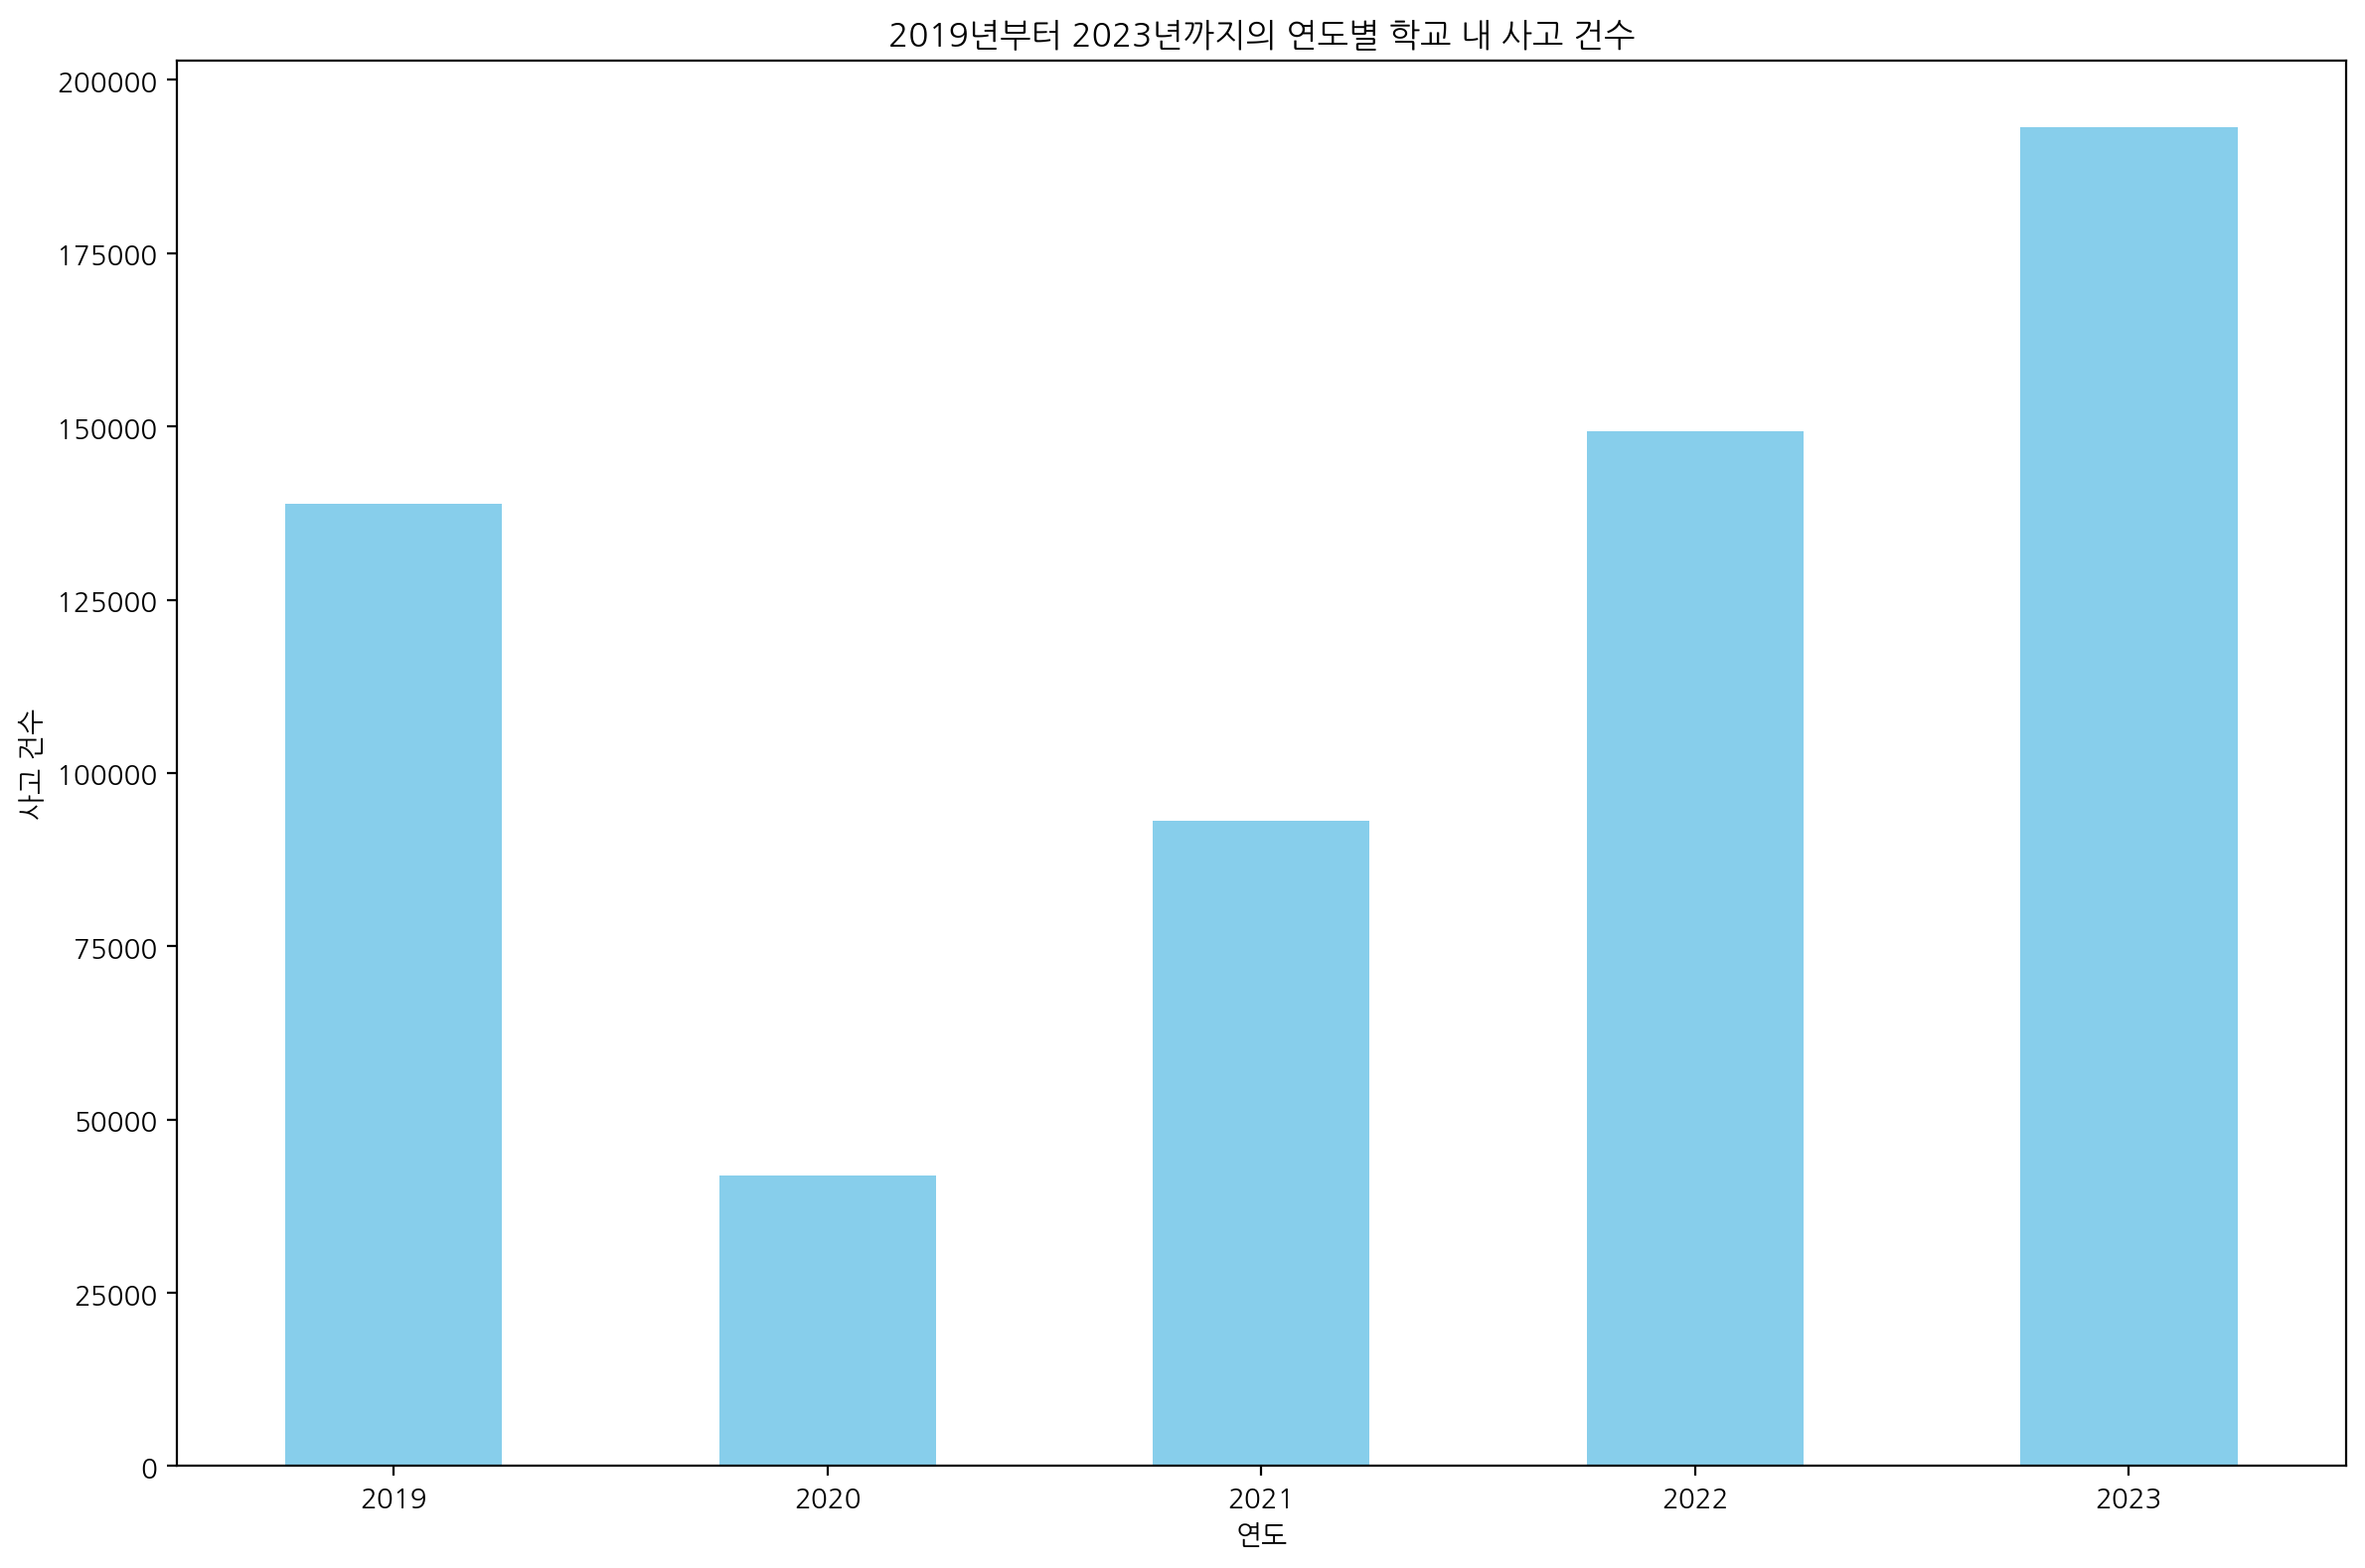

In [11]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('2019년부터 2023년까지의 연도별 학교 내 사고 건수')
plt.xlabel('연도')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Group by 사고장소 and Year to get the count of accidents
location_year_counts = data_combined.groupby(['사고장소', 'Year']).size().unstack(fill_value=0)

# Display the counts
print(location_year_counts)

Year   2019   2020   2021   2022   2023
사고장소                                   
교실    24434   8401  15401  23072  30877
교외        0      0      0      0  10084
교외활동   5734   1558   3011   5854      0
부속시설  37271  13833  33548  47409  70988
운동장   50653  12541  29043  53419  55415
통로    20692   5607  12144  19585  25813


In [65]:
# Combine all years into a single DataFrame
data_combined = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Group '사고시간' into new categories
def group_accident_time(time):
    if time in ['체육수업', '체육활동']:
        return '체육활동'
    elif time in ['휴식시간 및 청소시간', '쉬는 시간']:
        return '휴식/쉬는 시간'
    elif time in ['점심시간', '식사시간', '석식시간']:
        return '식사시간'
    else:
        return '기타'

data_combined['사고시간_그룹'] = data_combined['사고시간'].apply(group_accident_time)

# Display the unique values in '사고시간_그룹'
print(data_combined['사고시간_그룹'].unique())

['기타' '휴식/쉬는 시간' '식사시간' '체육활동']


사고시간_그룹
기타          232886
체육활동        221473
식사시간        107463
휴식/쉬는 시간     54565
Name: count, dtype: int64


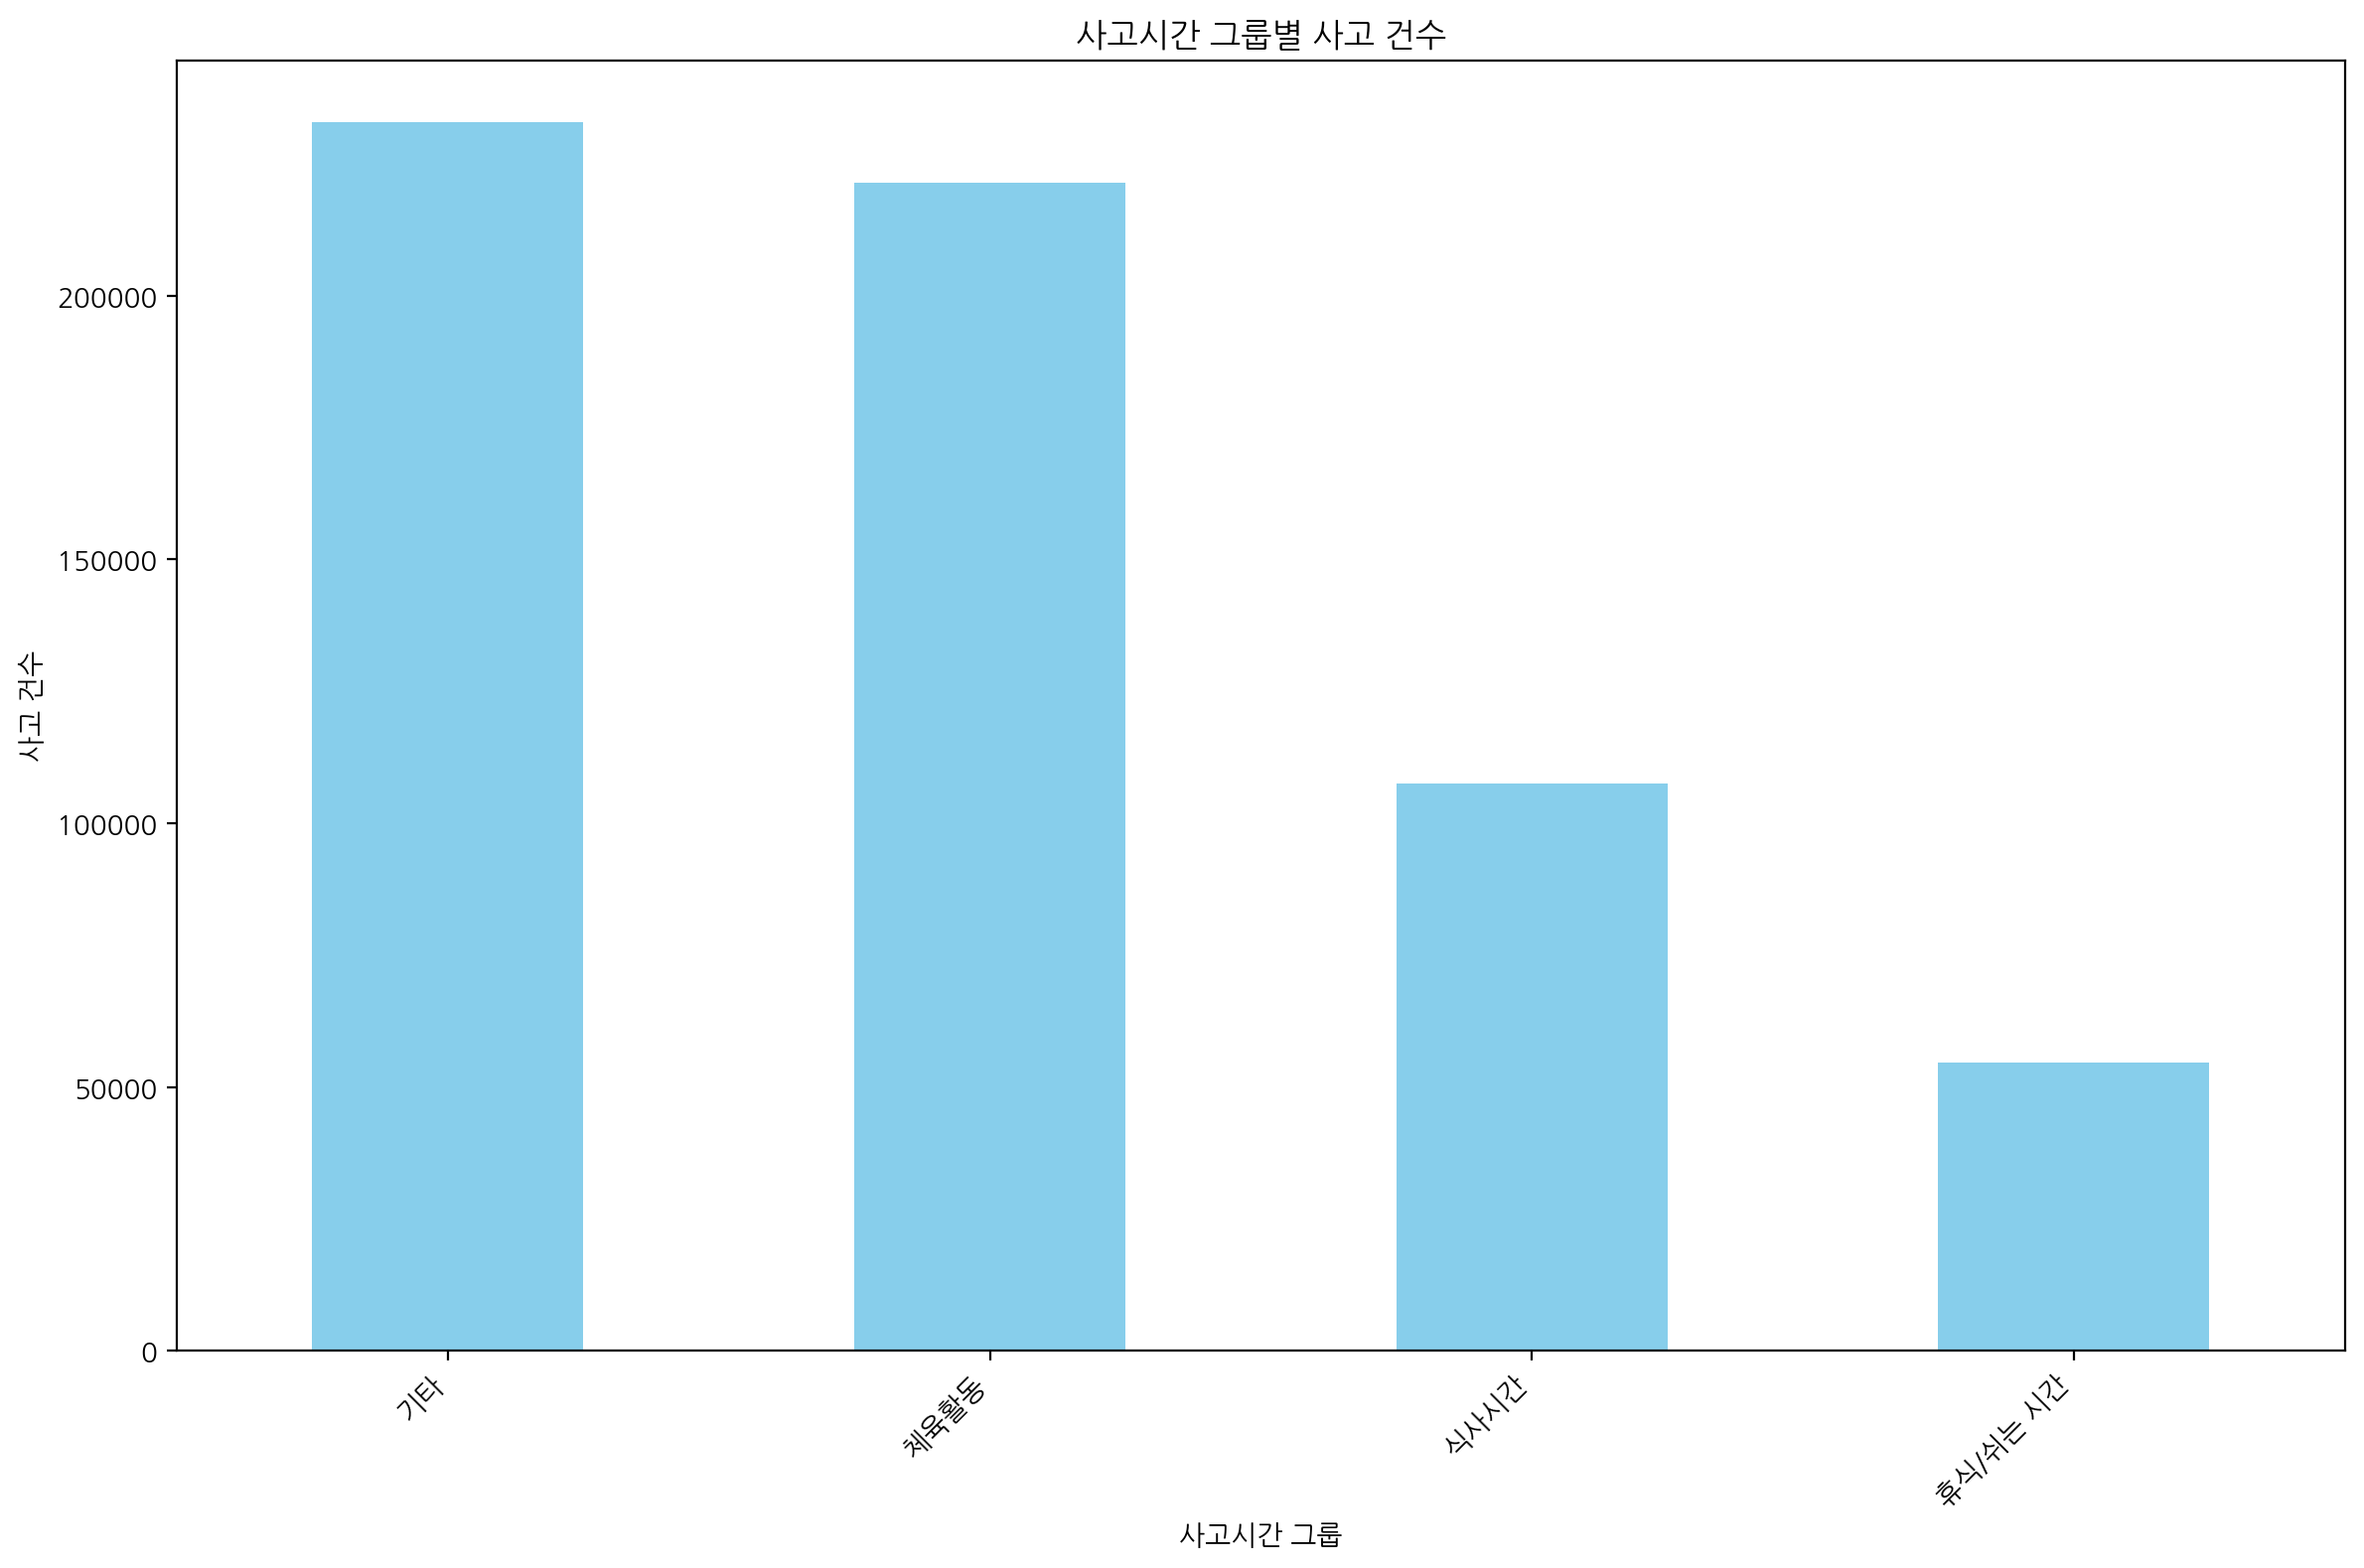

    사고시간_그룹         사고시간  Year     사고형태  사고장소 사고당시활동
0        기타         수업시간  2019  물리적힘 노출    교실   실험실습
1  휴식/쉬는 시간  휴식시간 및 청소시간  2019  낙상-미끄러짐    통로  보행/주행
2      식사시간         점심시간  2019  물리적힘 노출    교실  보행/주행
3      체육활동         체육수업  2019  물리적힘 노출   운동장   구기운동
4        기타         학교행사  2019  낙상-미끄러짐  교외활동  보행/주행


In [66]:
# Count the number of accidents by '사고시간_그룹'
grouped_time_counts = data_combined['사고시간_그룹'].value_counts()

# Display the grouped time counts
print(grouped_time_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
grouped_time_counts.plot(kind='bar', color='skyblue')
plt.title('사고시간 그룹별 사고 건수')
plt.xlabel('사고시간 그룹')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# Display the first few rows of the grouped data
print(data_combined[['사고시간_그룹', '사고시간', 'Year', '사고형태', '사고장소', '사고당시활동']].head())

사고시간
체육수업           152052
수업시간            84352
점심시간            77207
체육활동            69421
휴식시간 및 청소시간     54565
학교행사            34495
쉬는시간            32330
등하교             31026
식사시간            28265
특별활동            27986
기타              20756
석식시간             1991
기숙사생활            1941
Name: count, dtype: int64


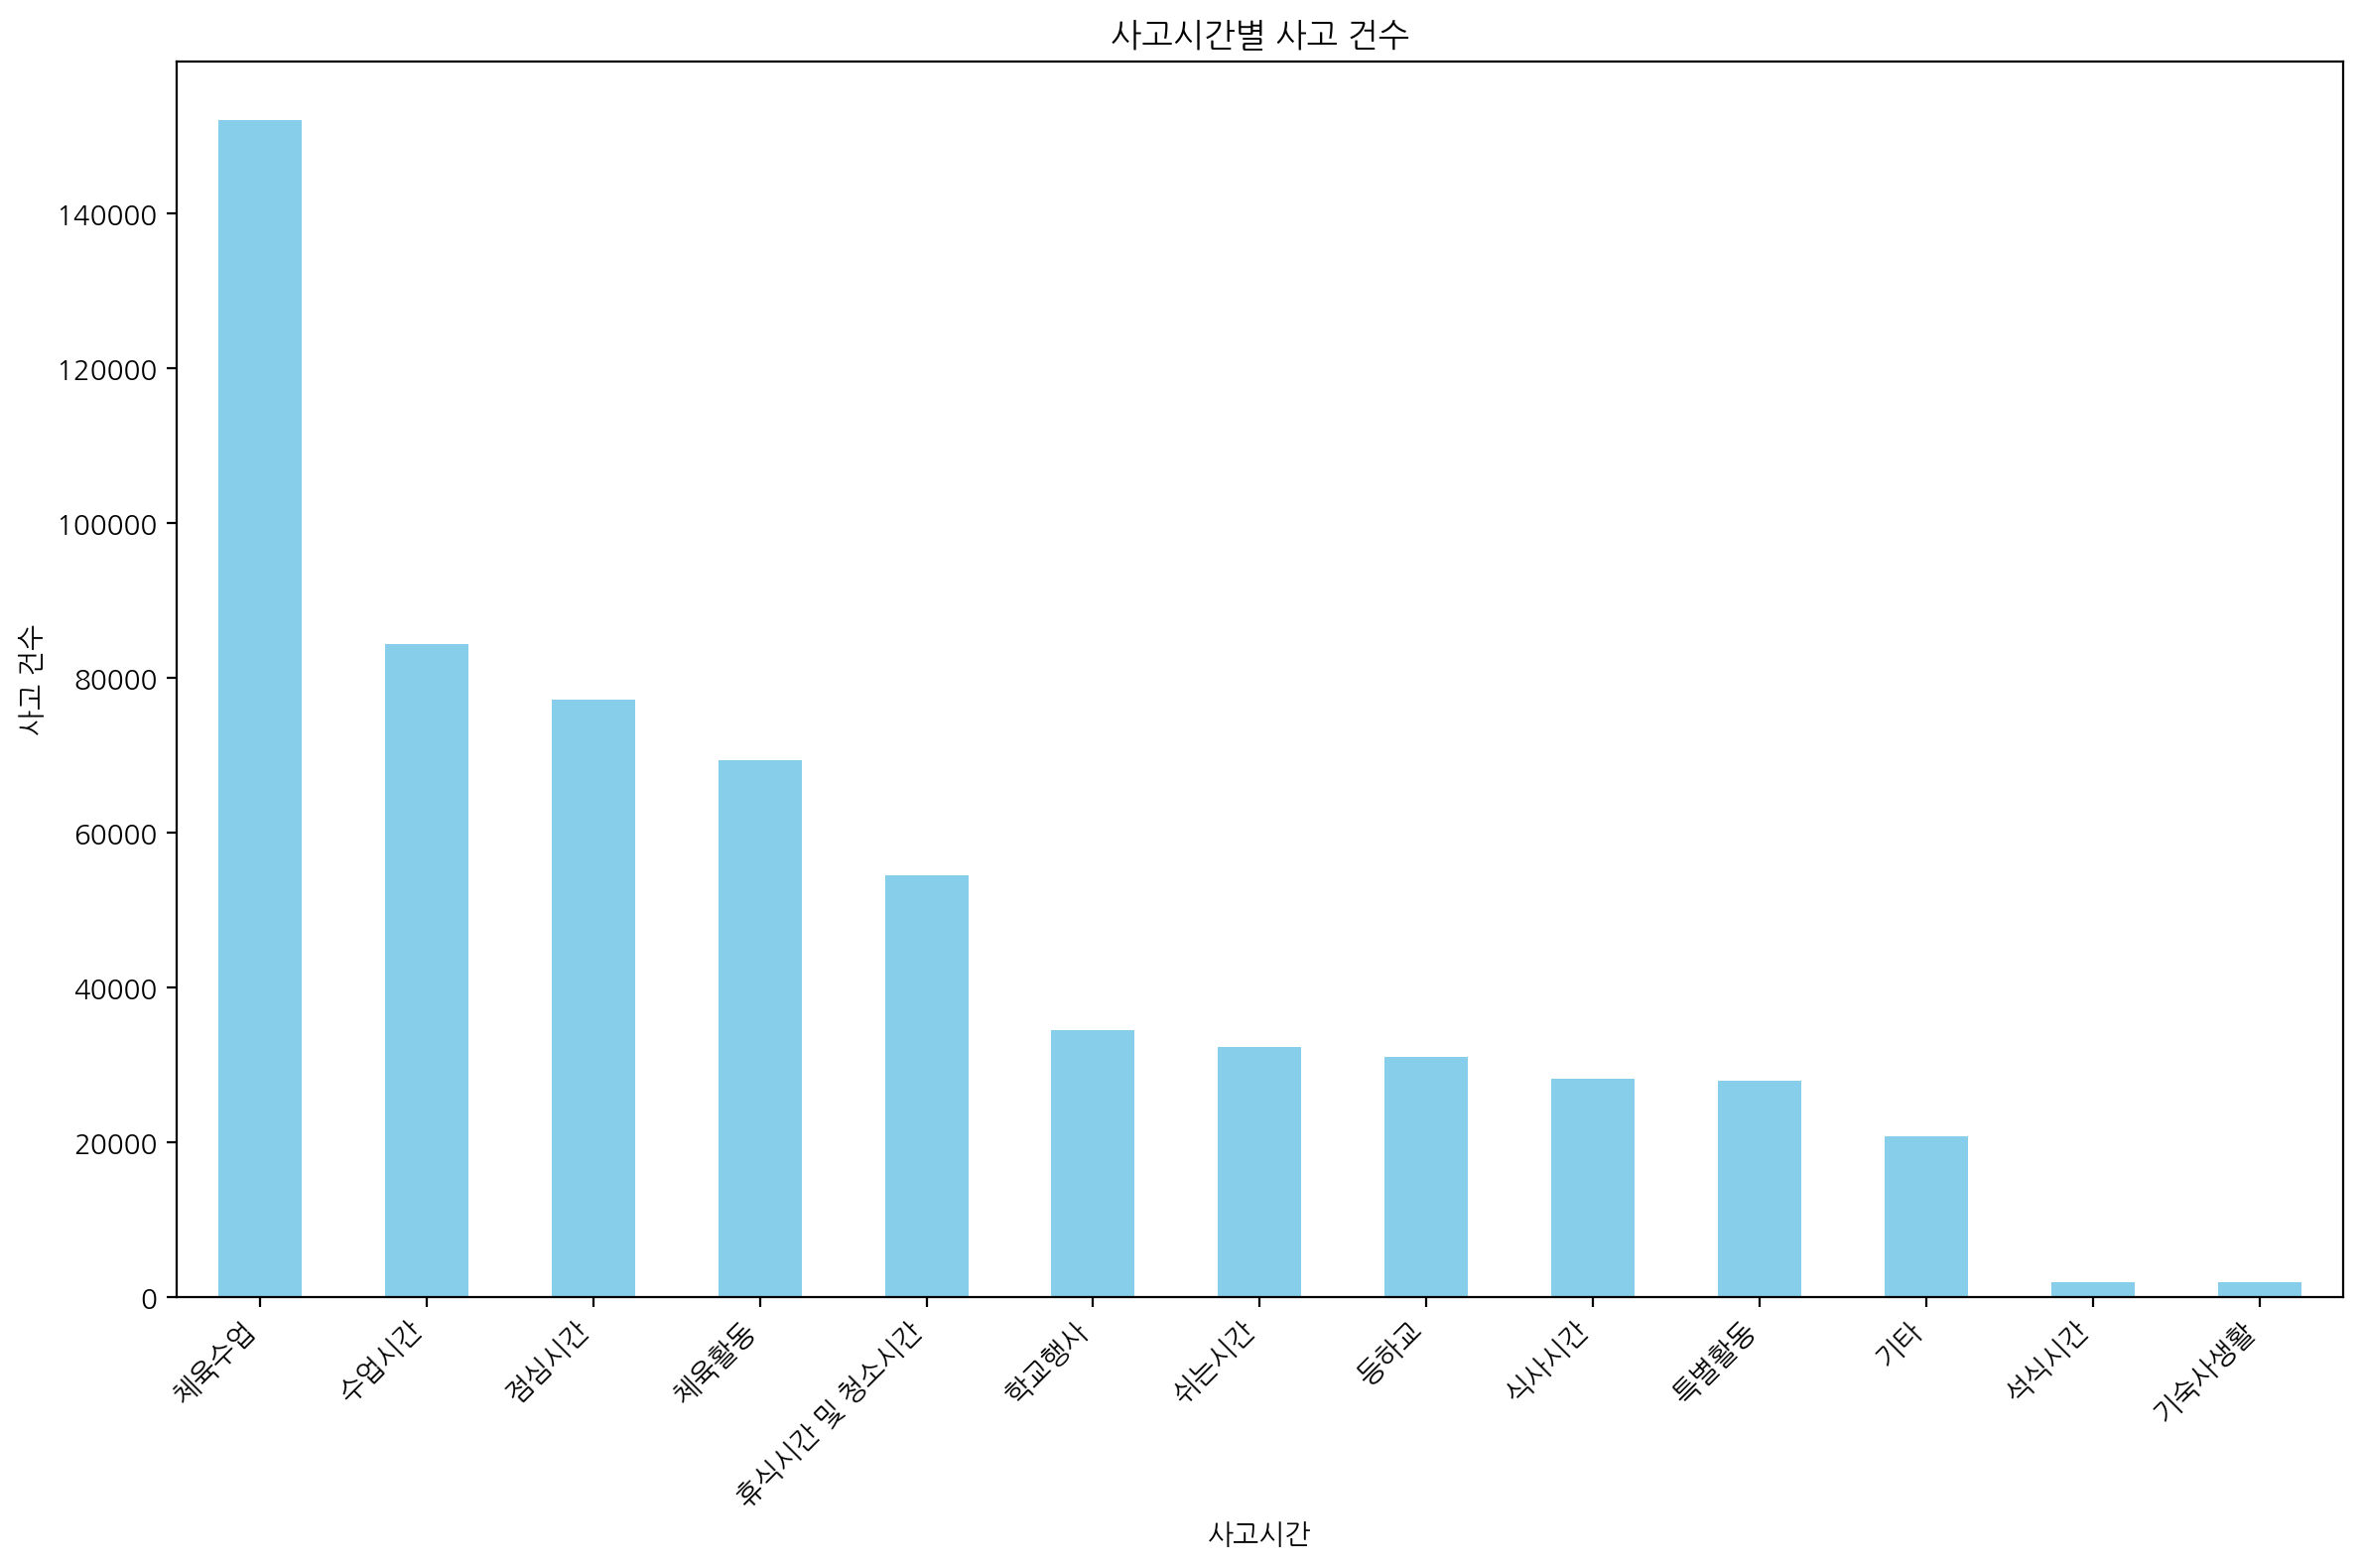

In [73]:
# Count the number of accidents by '사고시간'
time_counts = data_combined['사고시간'].value_counts()

# Display the time counts
print(time_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
time_counts.plot(kind='bar', color='skyblue')
plt.title('사고시간별 사고 건수')
plt.xlabel('사고시간')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [68]:
# Combine all years into a single DataFrame
data_combined = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Group '사고시간' into new categories
def group_accident_time(time):
    if time in ['체육수업', '체육활동']:
        return '체육활동'
    elif time in ['휴식시간 및 청소시간', '쉬는시간']:
        return '휴식/쉬는 시간'
    elif time in ['점심시간', '식사시간', '석식시간']:
        return '식사시간'
    elif time in ['등하교']:
        return '등하교 시간'
    elif time in ['수업시간']:
        return '수업시간'
    elif time in ['학교행사']:
        return '학교행사'
    elif time in ['특별활동']:
        return '특별활동'
    elif time in ['기숙사생활']:
        return '기숙사생활'
    else:
        return '기타'

data_combined['사고시간_그룹'] = data_combined['사고시간'].apply(group_accident_time)

# Display the unique values in '사고시간_그룹'
print(data_combined['사고시간_그룹'].unique())

['수업시간' '휴식/쉬는 시간' '식사시간' '체육활동' '학교행사' '등하교 시간' '특별활동' '기숙사생활' '기타']


사고시간_그룹
체육활동        221473
식사시간        107463
휴식/쉬는 시간     86895
수업시간         84352
학교행사         34495
등하교 시간       31026
특별활동         27986
기타           20756
기숙사생활         1941
Name: count, dtype: int64


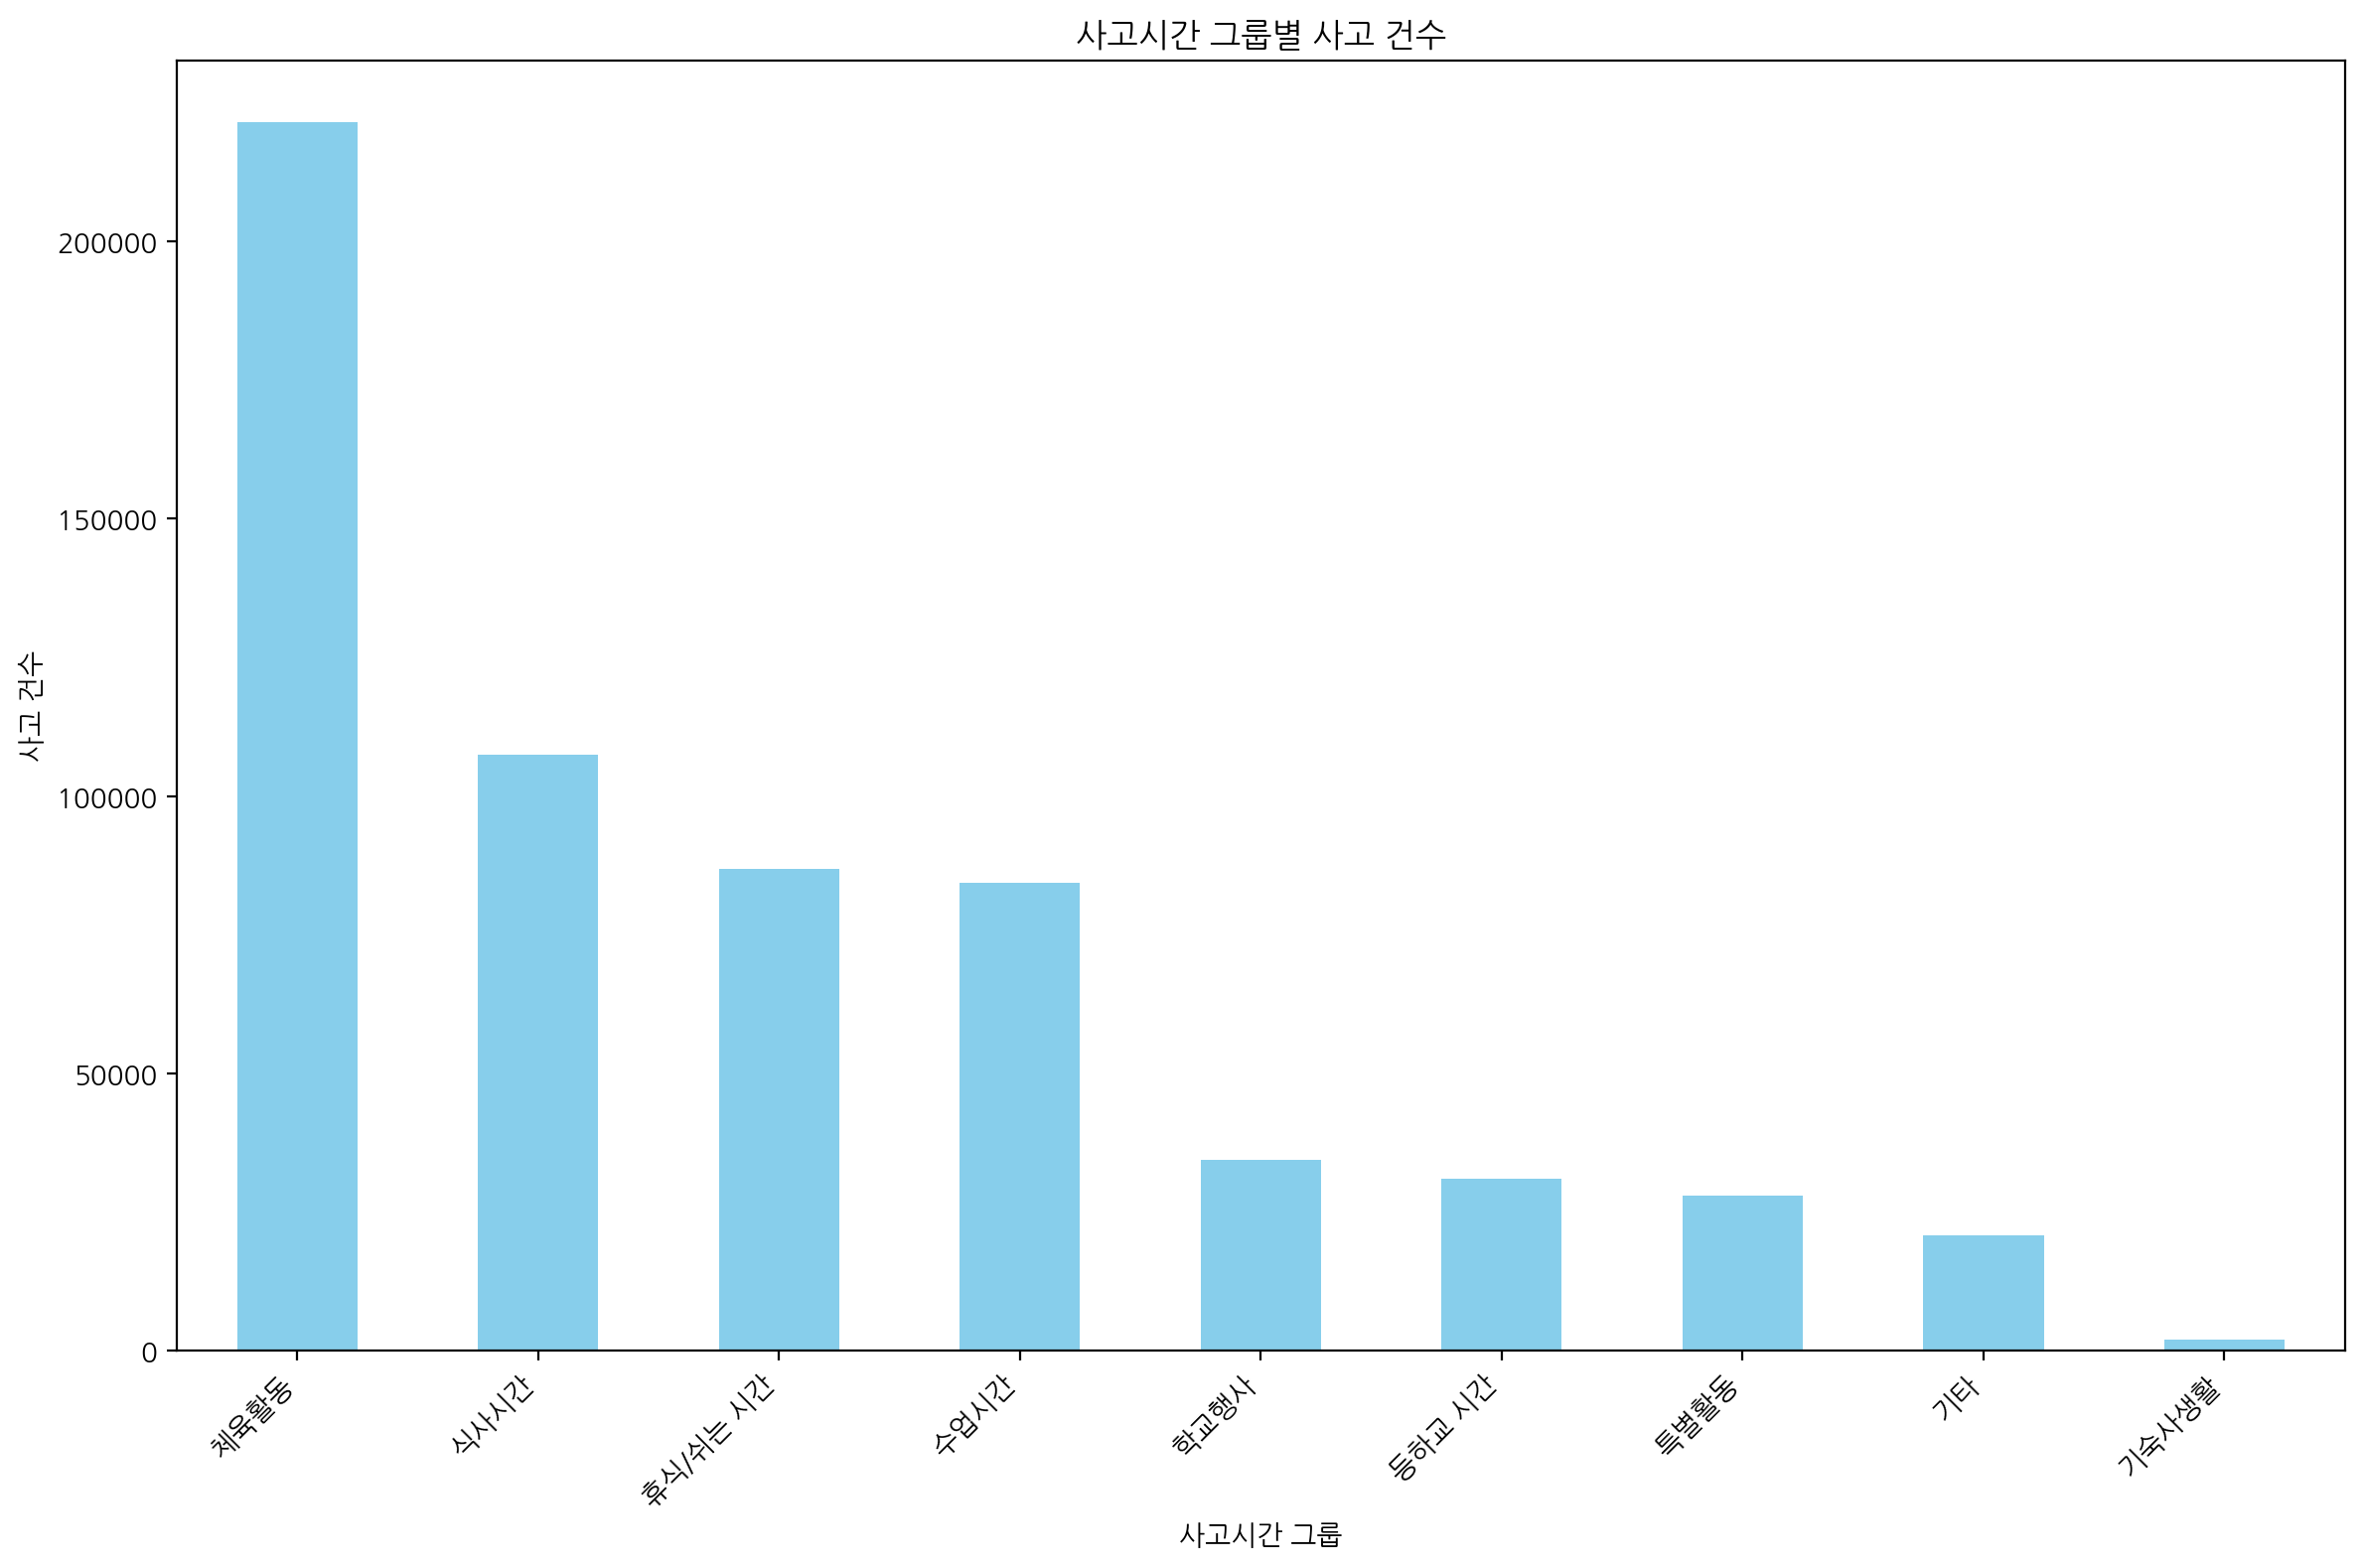

    사고시간_그룹         사고시간  Year     사고형태  사고장소 사고당시활동
0      수업시간         수업시간  2019  물리적힘 노출    교실   실험실습
1  휴식/쉬는 시간  휴식시간 및 청소시간  2019  낙상-미끄러짐    통로  보행/주행
2      식사시간         점심시간  2019  물리적힘 노출    교실  보행/주행
3      체육활동         체육수업  2019  물리적힘 노출   운동장   구기운동
4      학교행사         학교행사  2019  낙상-미끄러짐  교외활동  보행/주행


In [69]:
# Count the number of accidents by '사고시간_그룹'
grouped_time_counts = data_combined['사고시간_그룹'].value_counts()

# Display the grouped time counts
print(grouped_time_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
grouped_time_counts.plot(kind='bar', color='skyblue')
plt.title('사고시간 그룹별 사고 건수')
plt.xlabel('사고시간 그룹')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# Display the first few rows of the grouped data
print(data_combined[['사고시간_그룹', '사고시간', 'Year', '사고형태', '사고장소', '사고당시활동']].head())

사고시간_그룹
체육활동        221473
식사시간        107463
휴식/쉬는 시간     86895
수업시간         84352
학교행사         34495
등하교 시간       31026
특별활동         27986
기타           20756
기숙사생활         1941
Name: count, dtype: int64


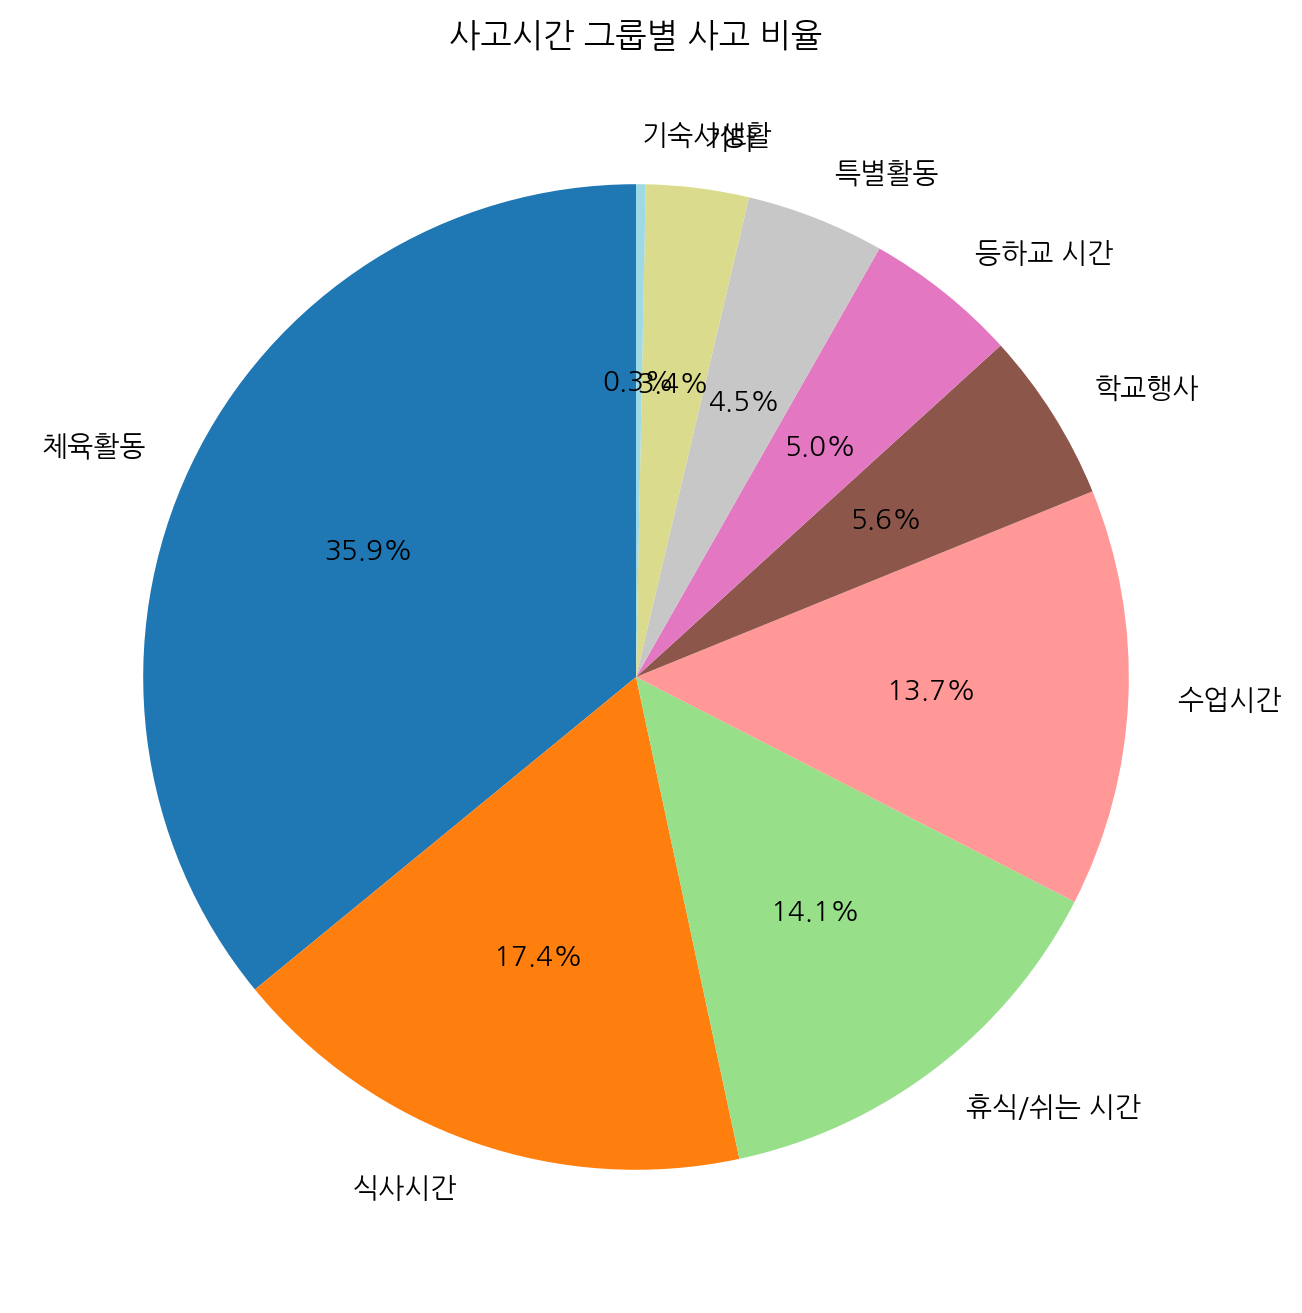

In [70]:
# Count the number of accidents by '사고시간_그룹'
grouped_time_counts = data_combined['사고시간_그룹'].value_counts()

# Display the grouped time counts
print(grouped_time_counts)

# Plot the pie chart
plt.figure(figsize=(12, 8))
grouped_time_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('사고시간 그룹별 사고 비율')
plt.ylabel('')

# Display the plot
plt.show()

사고시간_그룹
체육활동        35.930836
식사시간        17.434339
휴식/쉬는 시간    14.097474
수업시간        13.684909
학교행사         5.596322
등하교 시간       5.033526
특별활동         4.540329
기타           3.367365
기숙사생활        0.314900
Name: count, dtype: float64


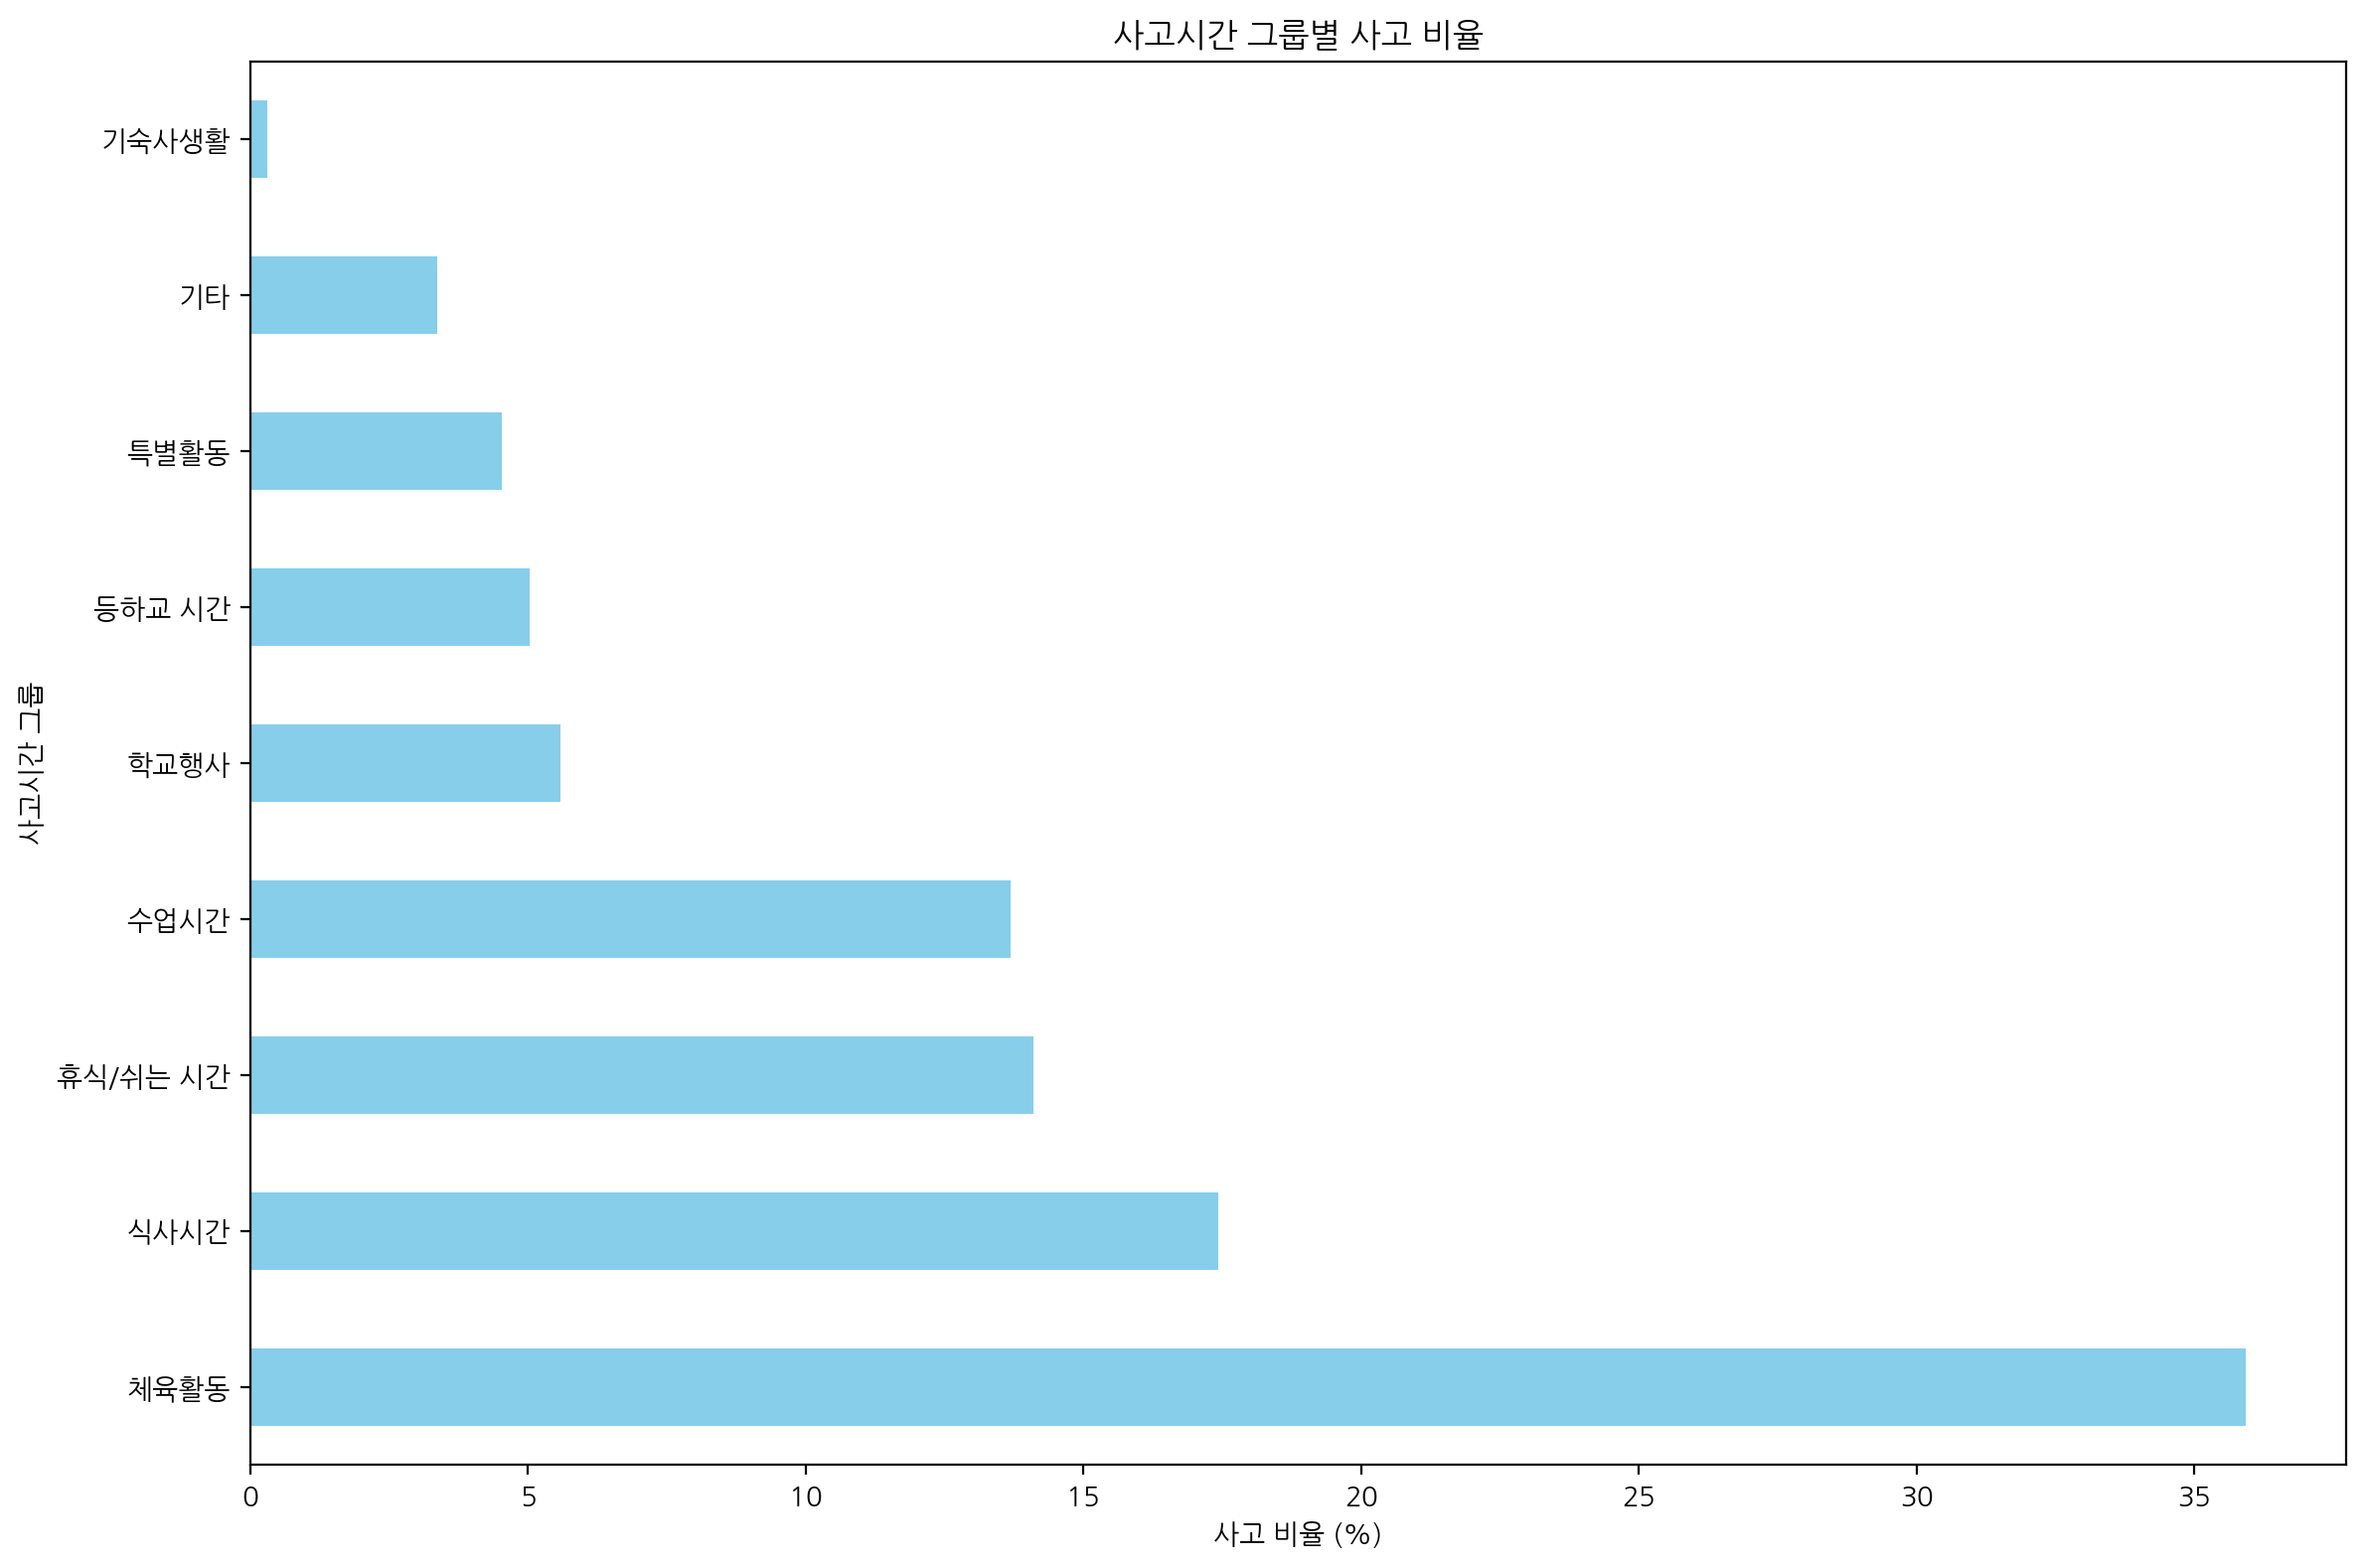

In [72]:
# Count the number of accidents by '사고시간_그룹'
grouped_time_counts = data_combined['사고시간_그룹'].value_counts()

# Calculate the proportion of each group
grouped_time_proportions = grouped_time_counts / grouped_time_counts.sum() * 100

# Display the grouped time proportions
print(grouped_time_proportions)

# Plot the horizontal bar graph
plt.figure(figsize=(12, 8))
grouped_time_proportions.plot(kind='barh', color='skyblue')
plt.title('사고시간 그룹별 사고 비율')
plt.xlabel('사고 비율 (%)')
plt.ylabel('사고시간 그룹')
plt.tight_layout()

# Display the plot
plt.show()

In [63]:
# Combine all years into a single DataFrame
data_combined = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Group '사고시간' into new categories
def group_accident_time(time):
    if time in ['체육수업', '체육활동']:
        return '체육활동'
    elif time in ['휴식시간 및 청소시간', '쉬는 시간']:
        return '휴식/쉬는 시간'
    elif time in ['점심시간', '식사시간', '석식시간']:
        return '식사시간'
    else:
        return '기타'

data_combined['사고시간_그룹'] = data_combined['사고시간'].apply(group_accident_time)

# Display the unique values in '사고시간_그룹'
print(data_combined['사고시간_그룹'].unique())

['기타' '휴식/쉬는 시간' '식사시간' '체육활동']


사고시간_그룹
기타          232886
체육활동        221473
식사시간        107463
휴식/쉬는 시간     54565
Name: count, dtype: int64


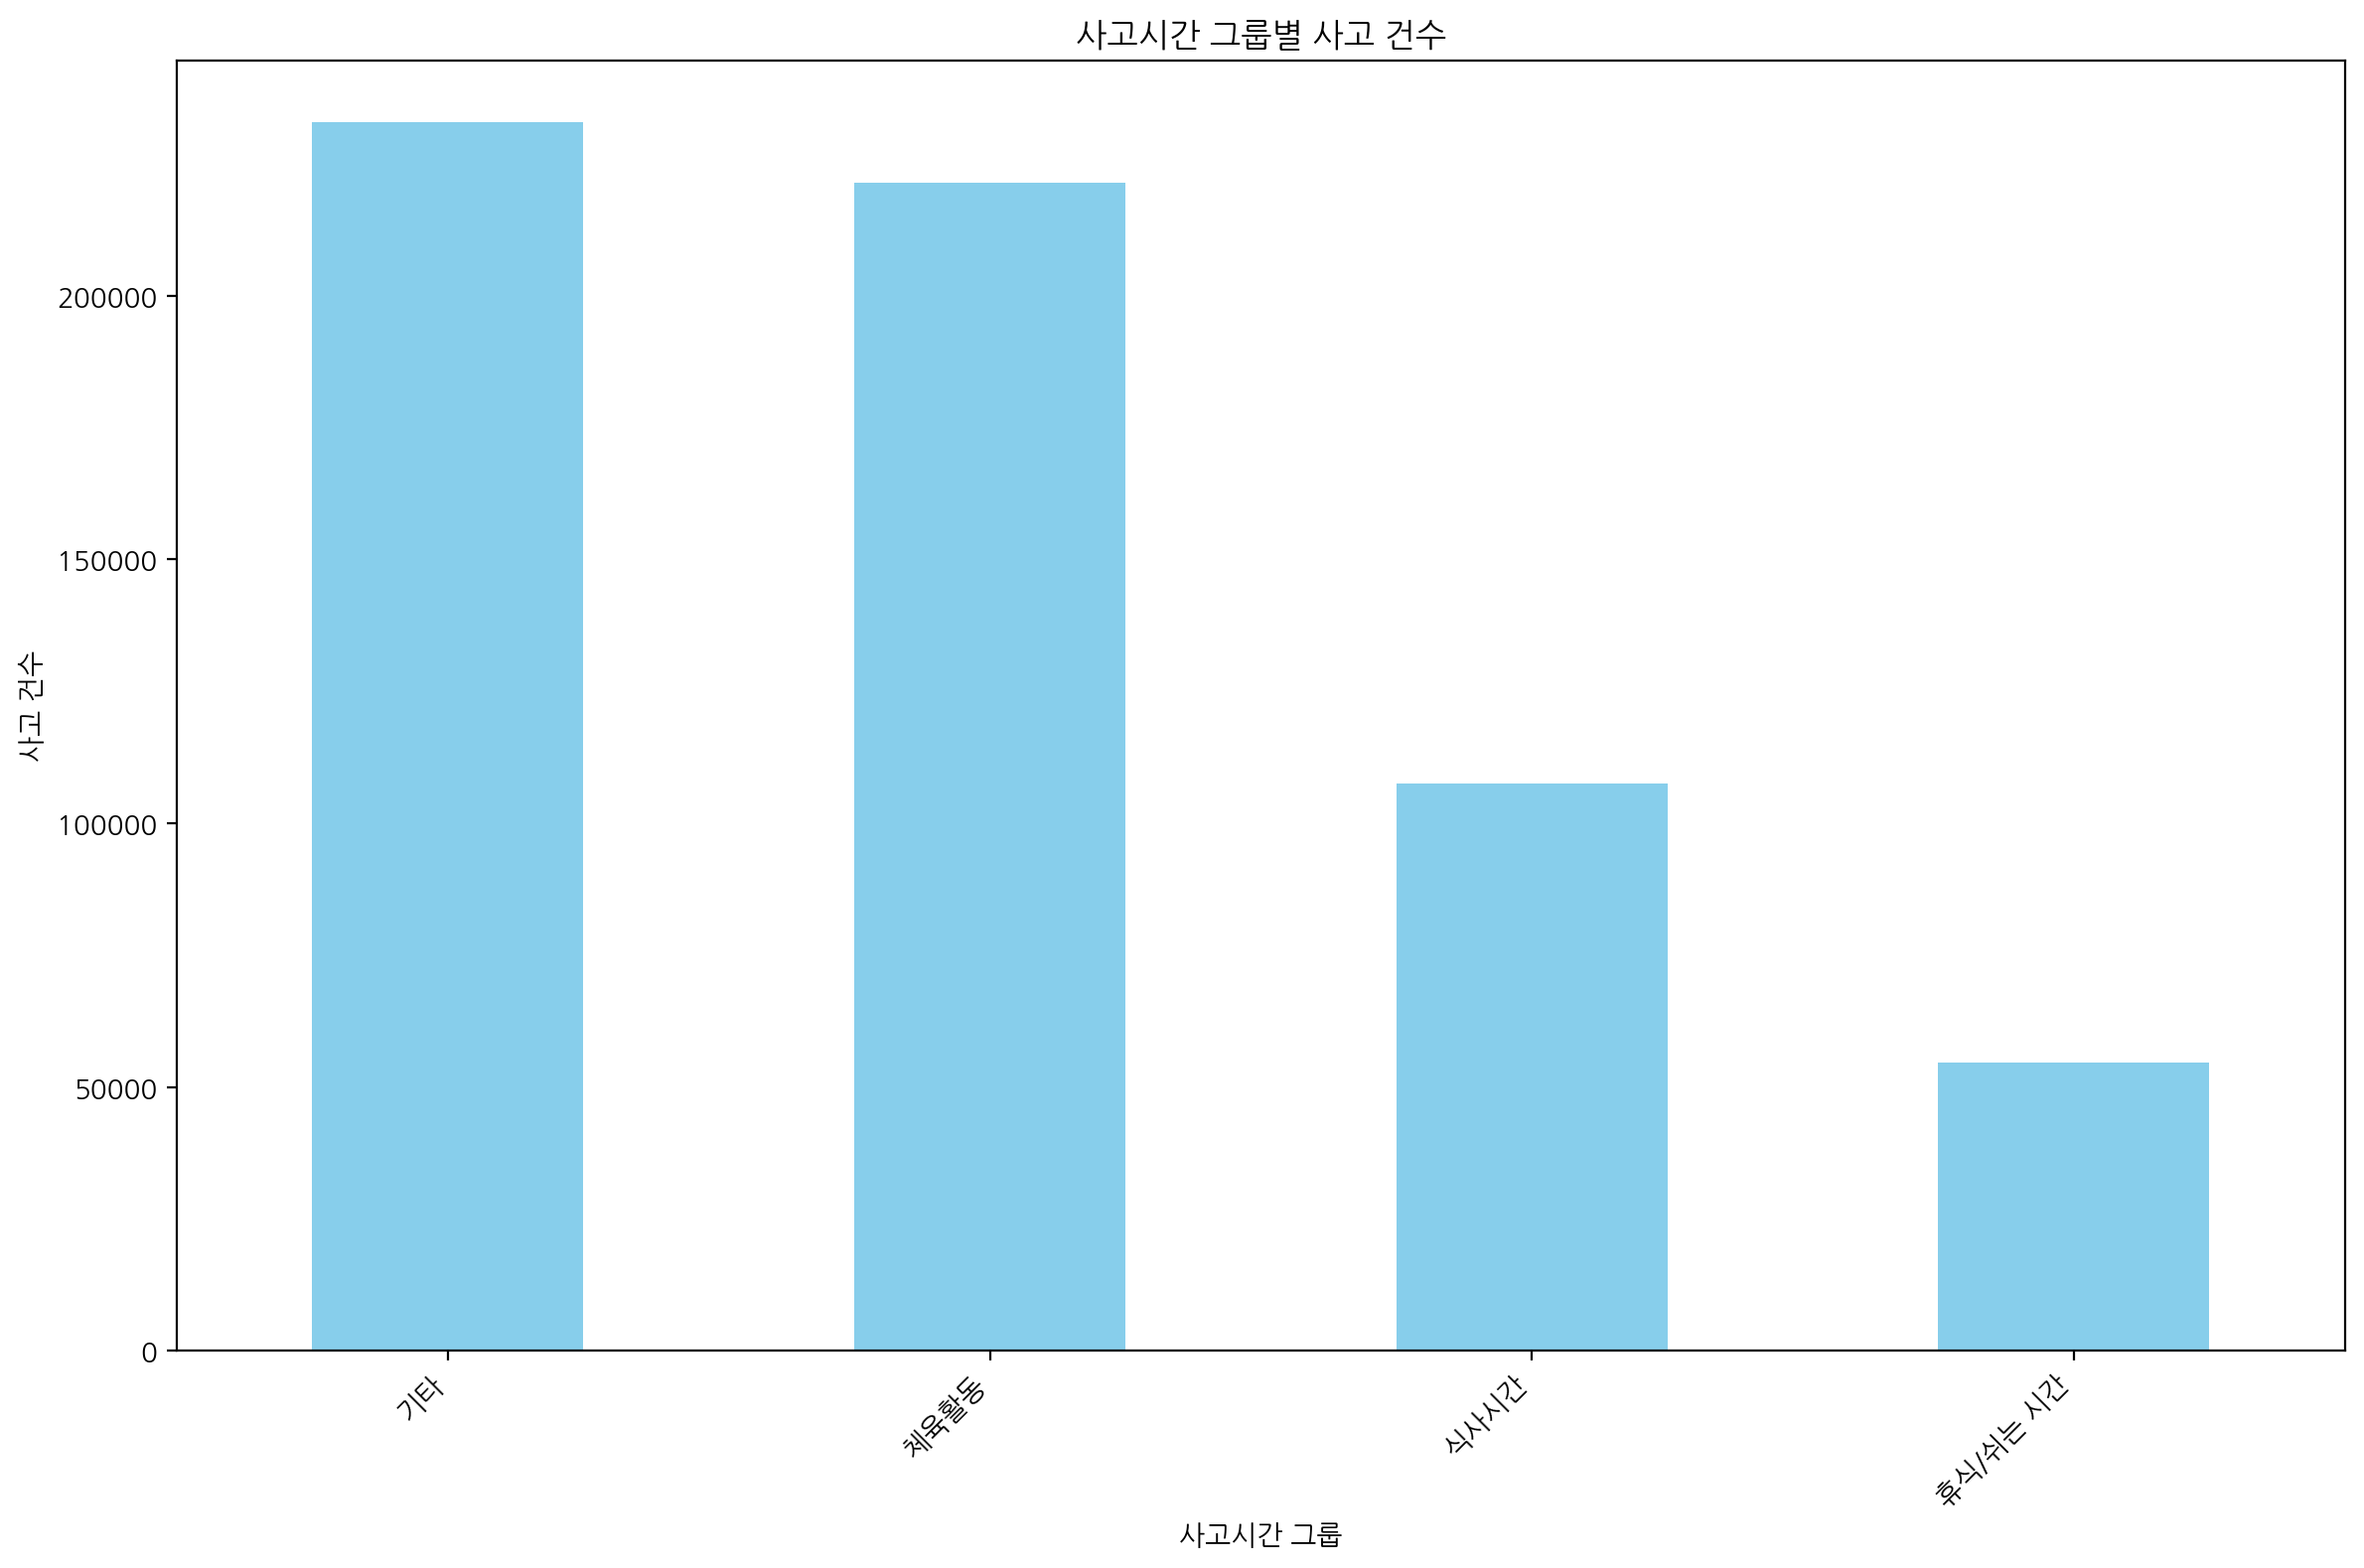

In [64]:
# Count the number of accidents by '사고시간_그룹'
grouped_time_counts = data_combined['사고시간_그룹'].value_counts()

# Display the grouped time counts
print(grouped_time_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
grouped_time_counts.plot(kind='bar', color='skyblue')
plt.title('사고시간 그룹별 사고 건수')
plt.xlabel('사고시간 그룹')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

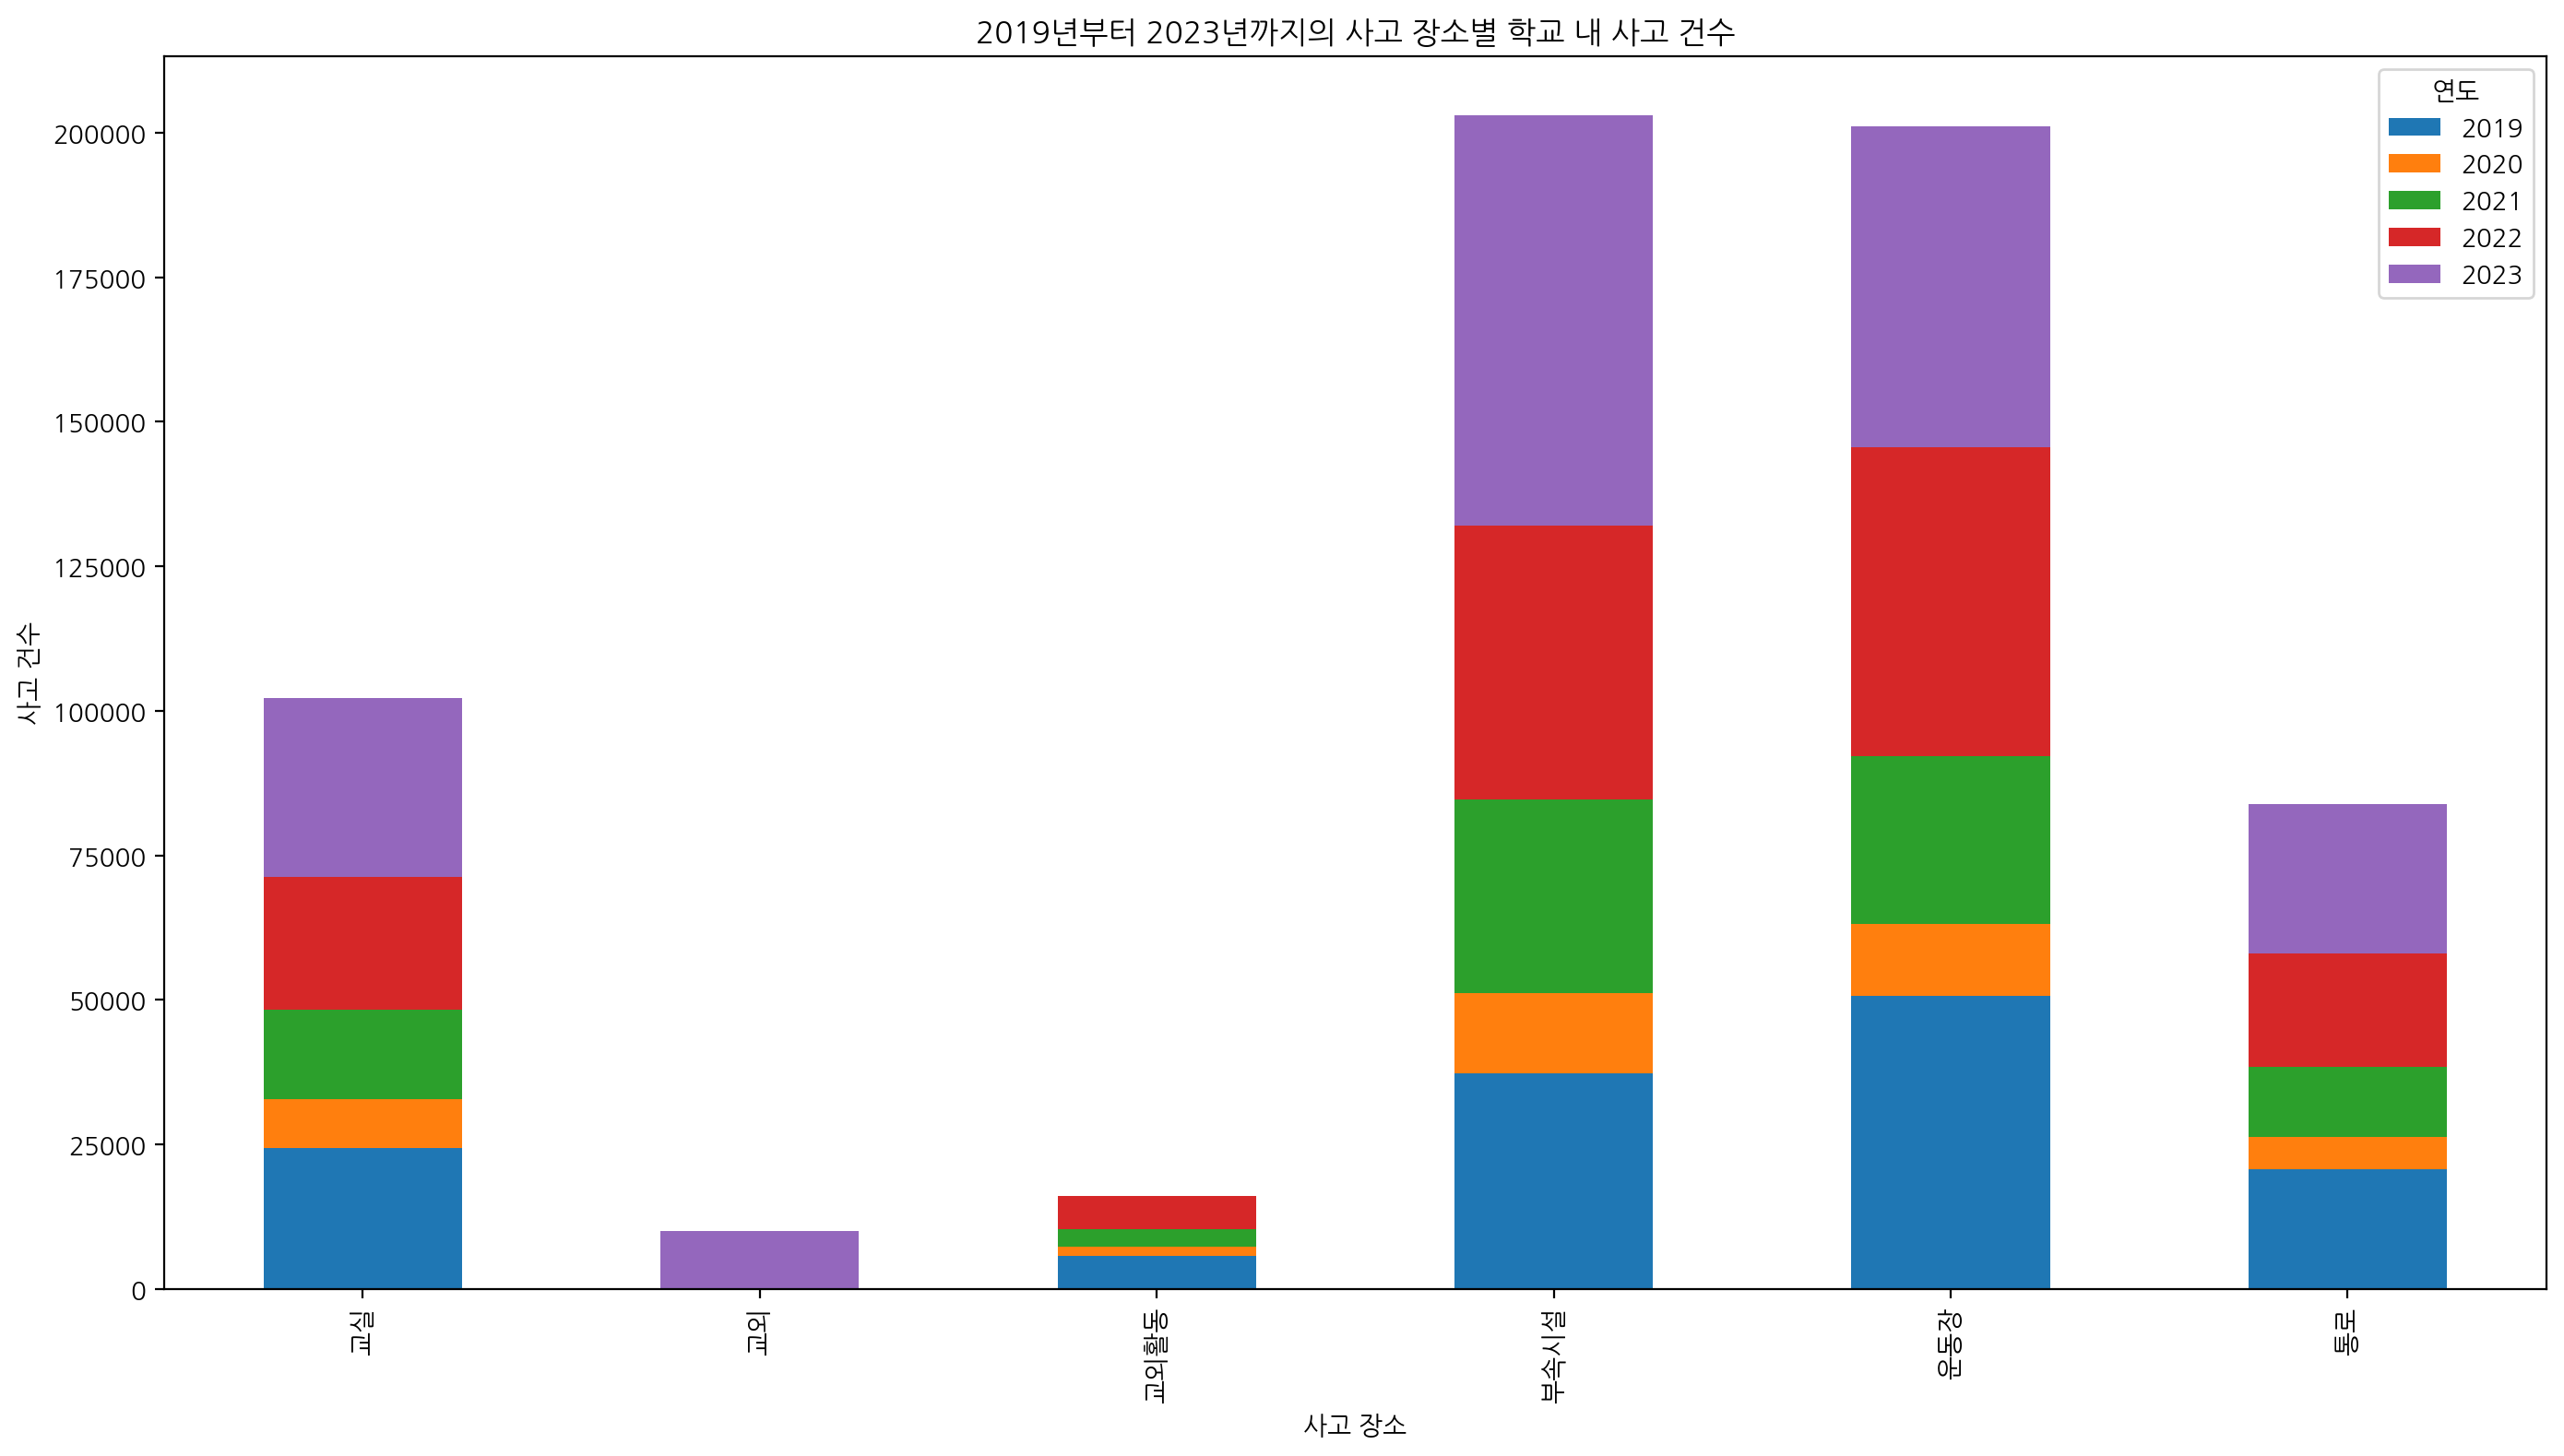

In [13]:
# Plot the bar graph for each 사고장소
location_year_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('2019년부터 2023년까지의 사고 장소별 학교 내 사고 건수')
plt.xlabel('사고 장소')
plt.ylabel('사고 건수')
plt.legend(title='연도')
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
# Group by Year and 사고장소 to get the count of accidents
location_year_counts = data_combined.groupby(['Year', '사고장소']).size().unstack(fill_value=0)

# Calculate the percentage for each year
location_year_percent = location_year_counts.div(location_year_counts.sum(axis=1), axis=0) * 100

# Display the counts
print(location_year_percent)

사고장소         교실        교외      교외활동       부속시설        운동장         통로
Year                                                                
2019  17.605776  0.000000  4.131600  26.855401  36.497723  14.909500
2020  20.030997  0.000000  3.714831  32.982833  29.902241  13.369099
2021  16.534081  0.000000  3.232525  36.016189  31.179748  13.037457
2022  15.449414  0.000000  3.919941  31.745894  35.770294  13.114458
2023  15.983787  5.220083  0.000000  36.747646  28.686127  13.362357


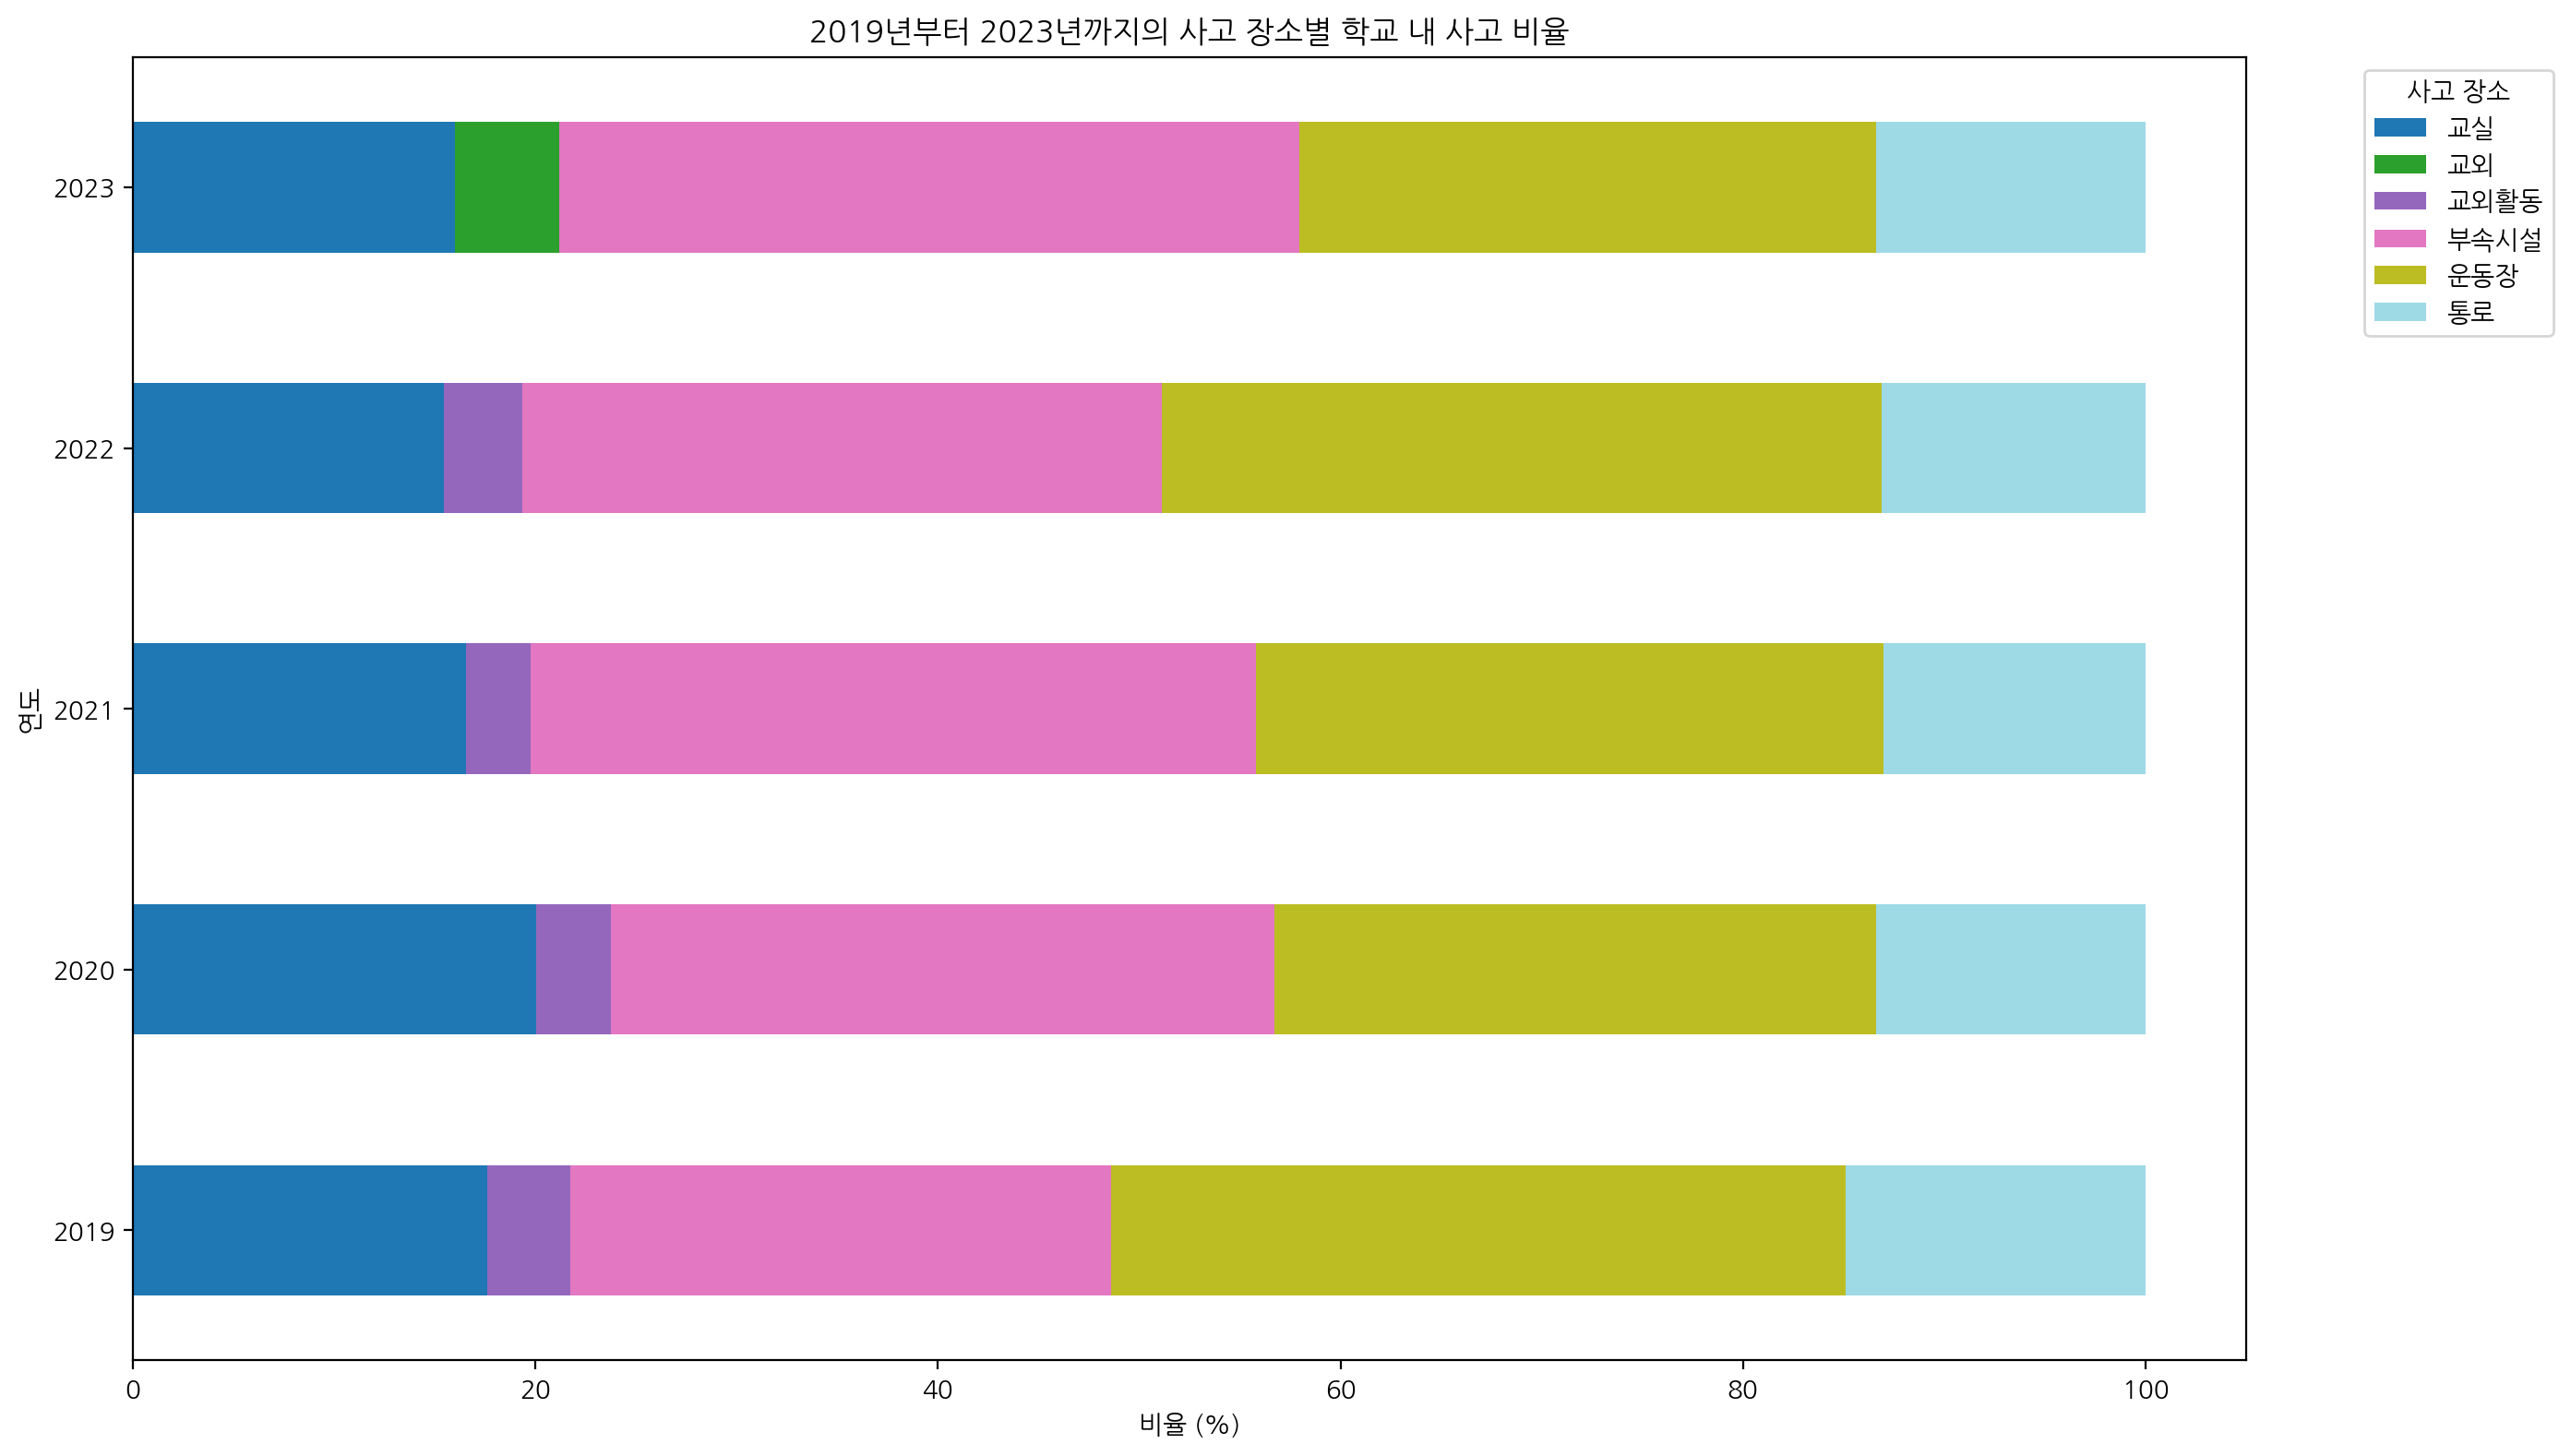

In [15]:
# Plot the stacked bar graph for each year
location_year_percent.plot(kind='barh', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('2019년부터 2023년까지의 사고 장소별 학교 내 사고 비율')
plt.xlabel('비율 (%)')
plt.ylabel('연도')
plt.legend(title='사고 장소', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Group by Year and 사고시간 to get the count of accidents
time_year_counts = data_combined.groupby(['Year', '사고시간']).size().unstack(fill_value=0)

# Display the counts
print(time_year_counts)

사고시간  기숙사생활     기타   등하교  석식시간   수업시간   쉬는시간   식사시간   점심시간   체육수업   체육활동  \
Year                                                                       
2019    608      0  6706   823  21746      0      0  28936  43619      0   
2020    347   1427  2720   223   8246      0      0   6440  14274      0   
2021    464   4040  5385   417  14109      0      0  14390  37318      0   
2022    522   5073  7466   528  18828      0      0  27441  56841      0   
2023      0  10216  8749     0  21423  32330  28265      0      0  69421   

사고시간   특별활동   학교행사  휴식시간 및 청소시간  
Year                             
2019   6111   9615        20620  
2020   2125   1169         4969  
2021   4057   2766        10201  
2022   5470   8395        18775  
2023  10223  12550            0  


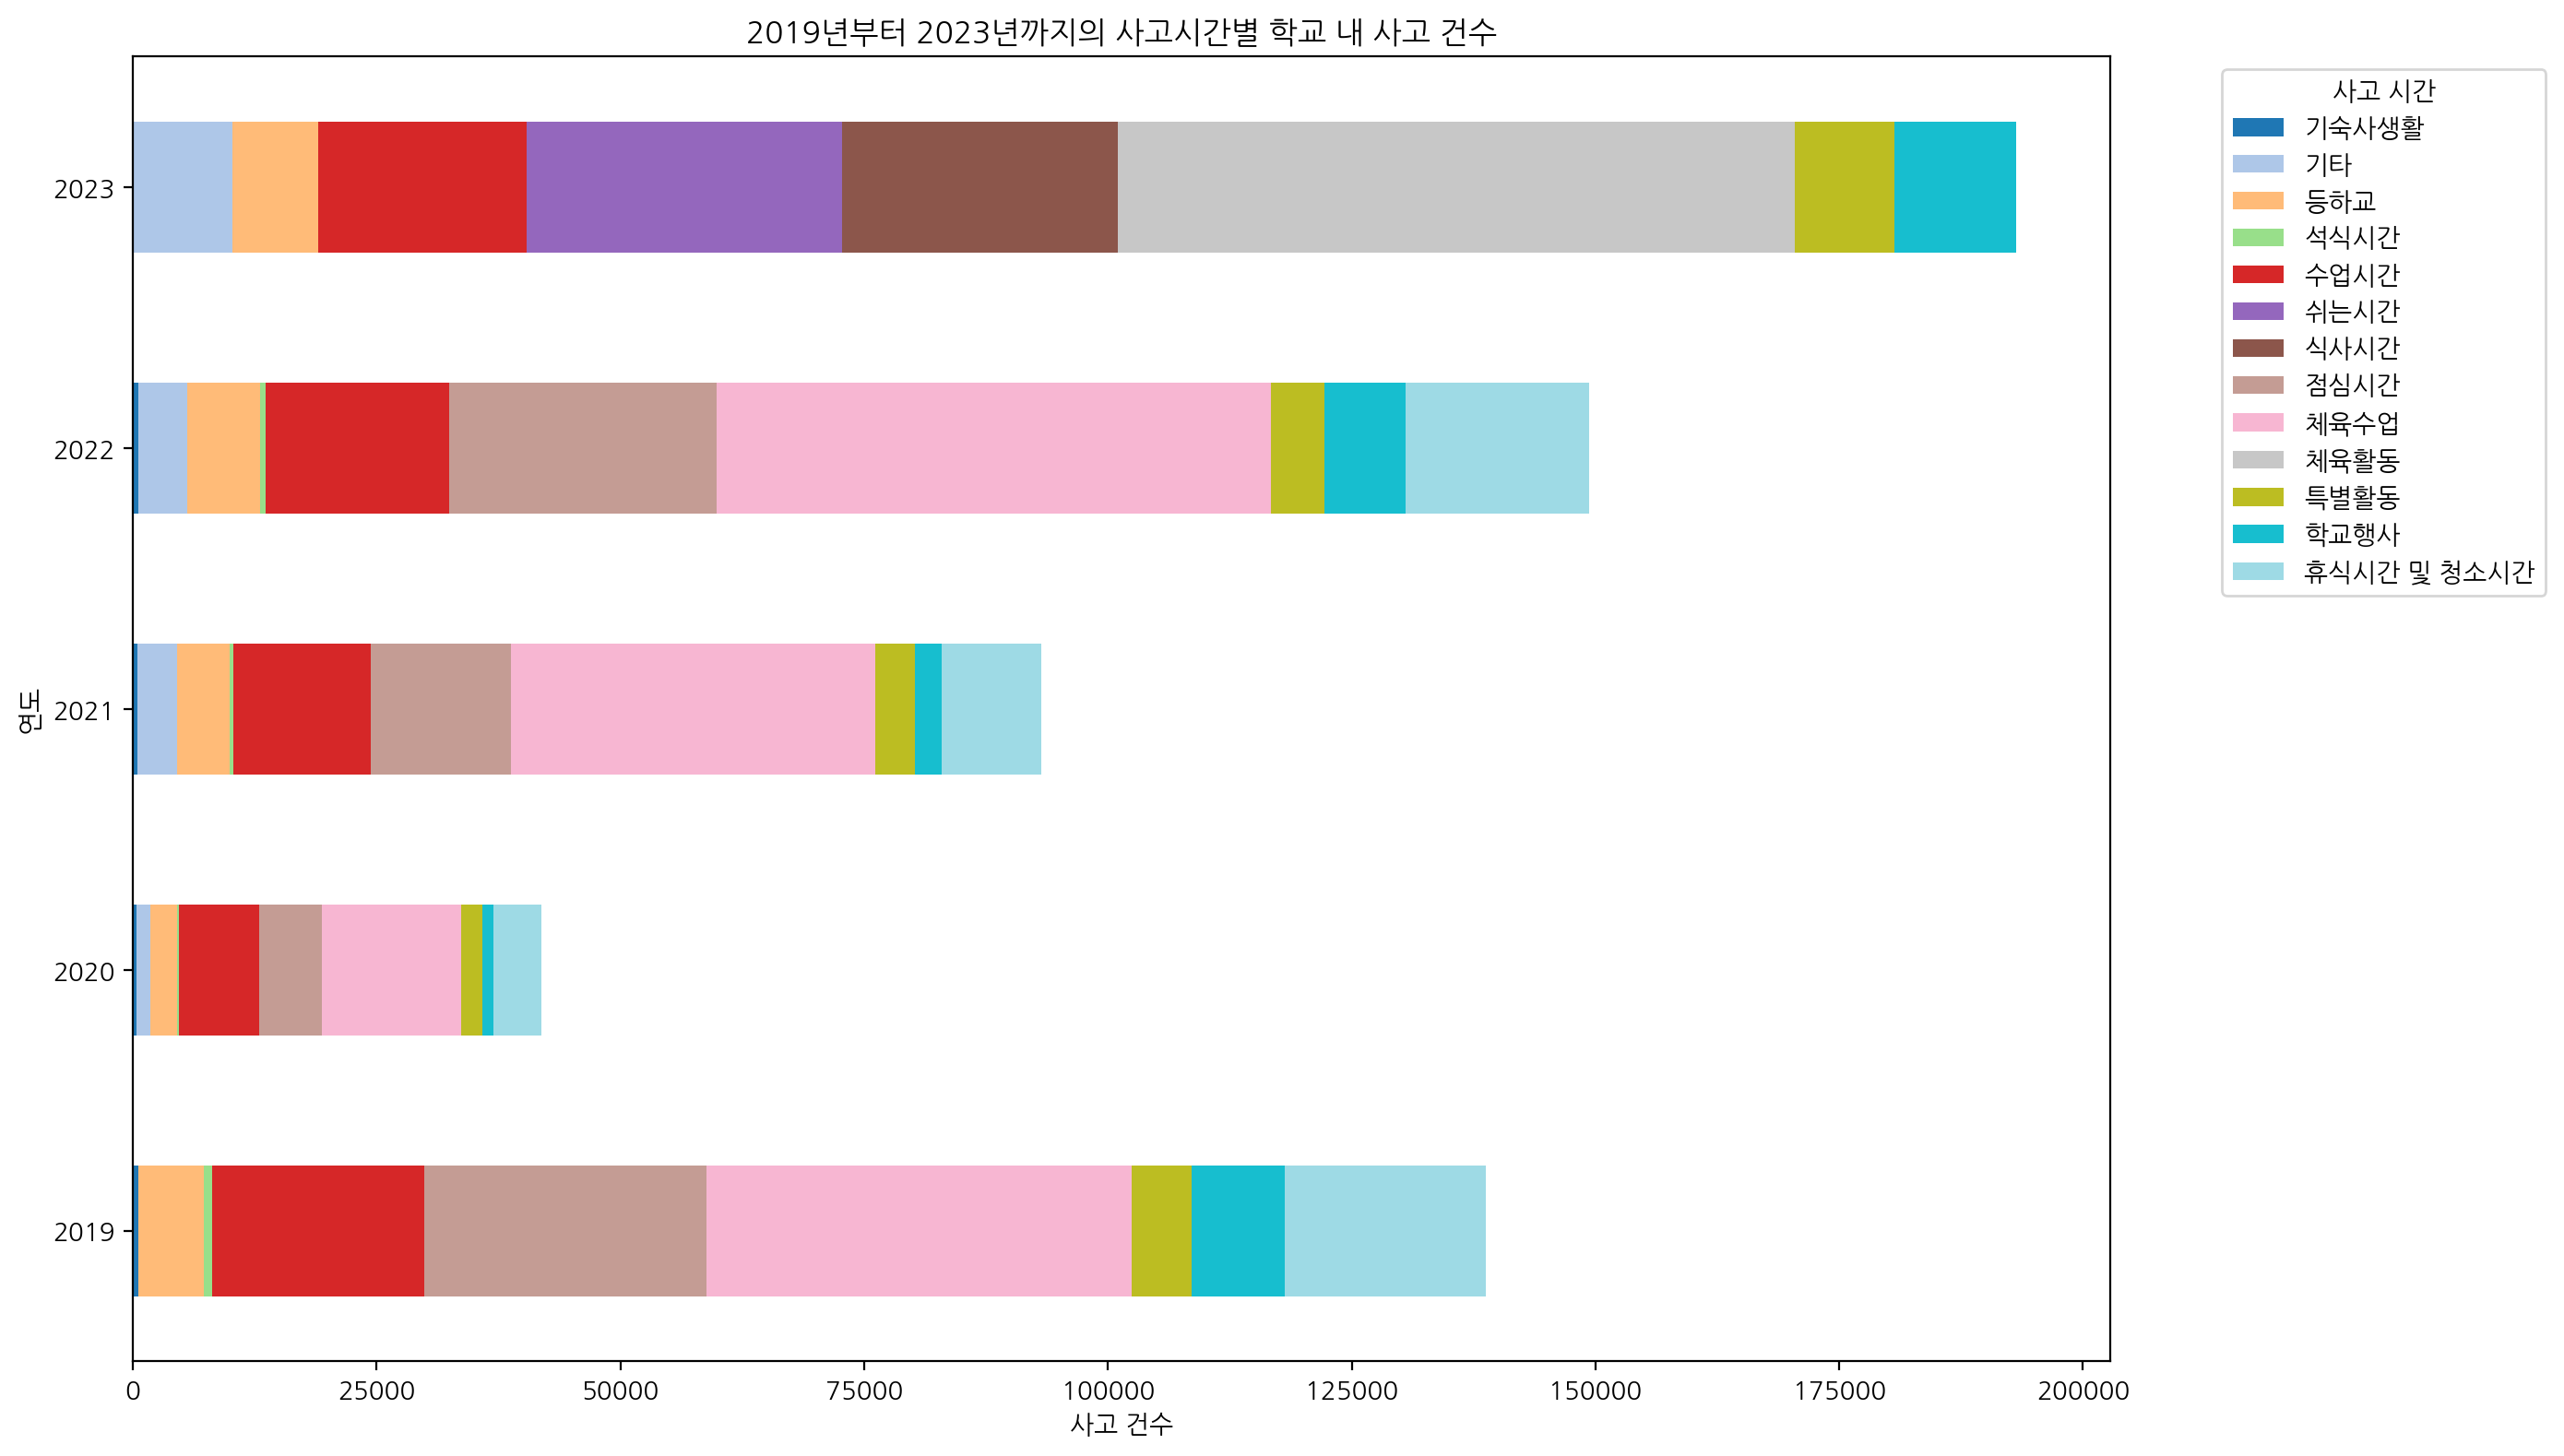

In [17]:
# Plot the stacked bar graph for each year
time_year_counts.plot(kind='barh', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('2019년부터 2023년까지의 사고시간별 학교 내 사고 건수')
plt.xlabel('사고 건수')
plt.ylabel('연도')
plt.legend(title='사고 시간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
# Filter the data based on '사고당시활동' being '체육활동' or '체육수업'
filtered_data = data_combined[
    data_combined['사고시간'].str.contains('체육활동|체육수업', na=False)
]

# Count the number of accidents per year
yearly_counts = filtered_data['Year'].value_counts().sort_index()

# Display the yearly counts
print(yearly_counts)

Year
2019    43619
2020    14274
2021    37318
2022    56841
2023    69421
Name: count, dtype: int64


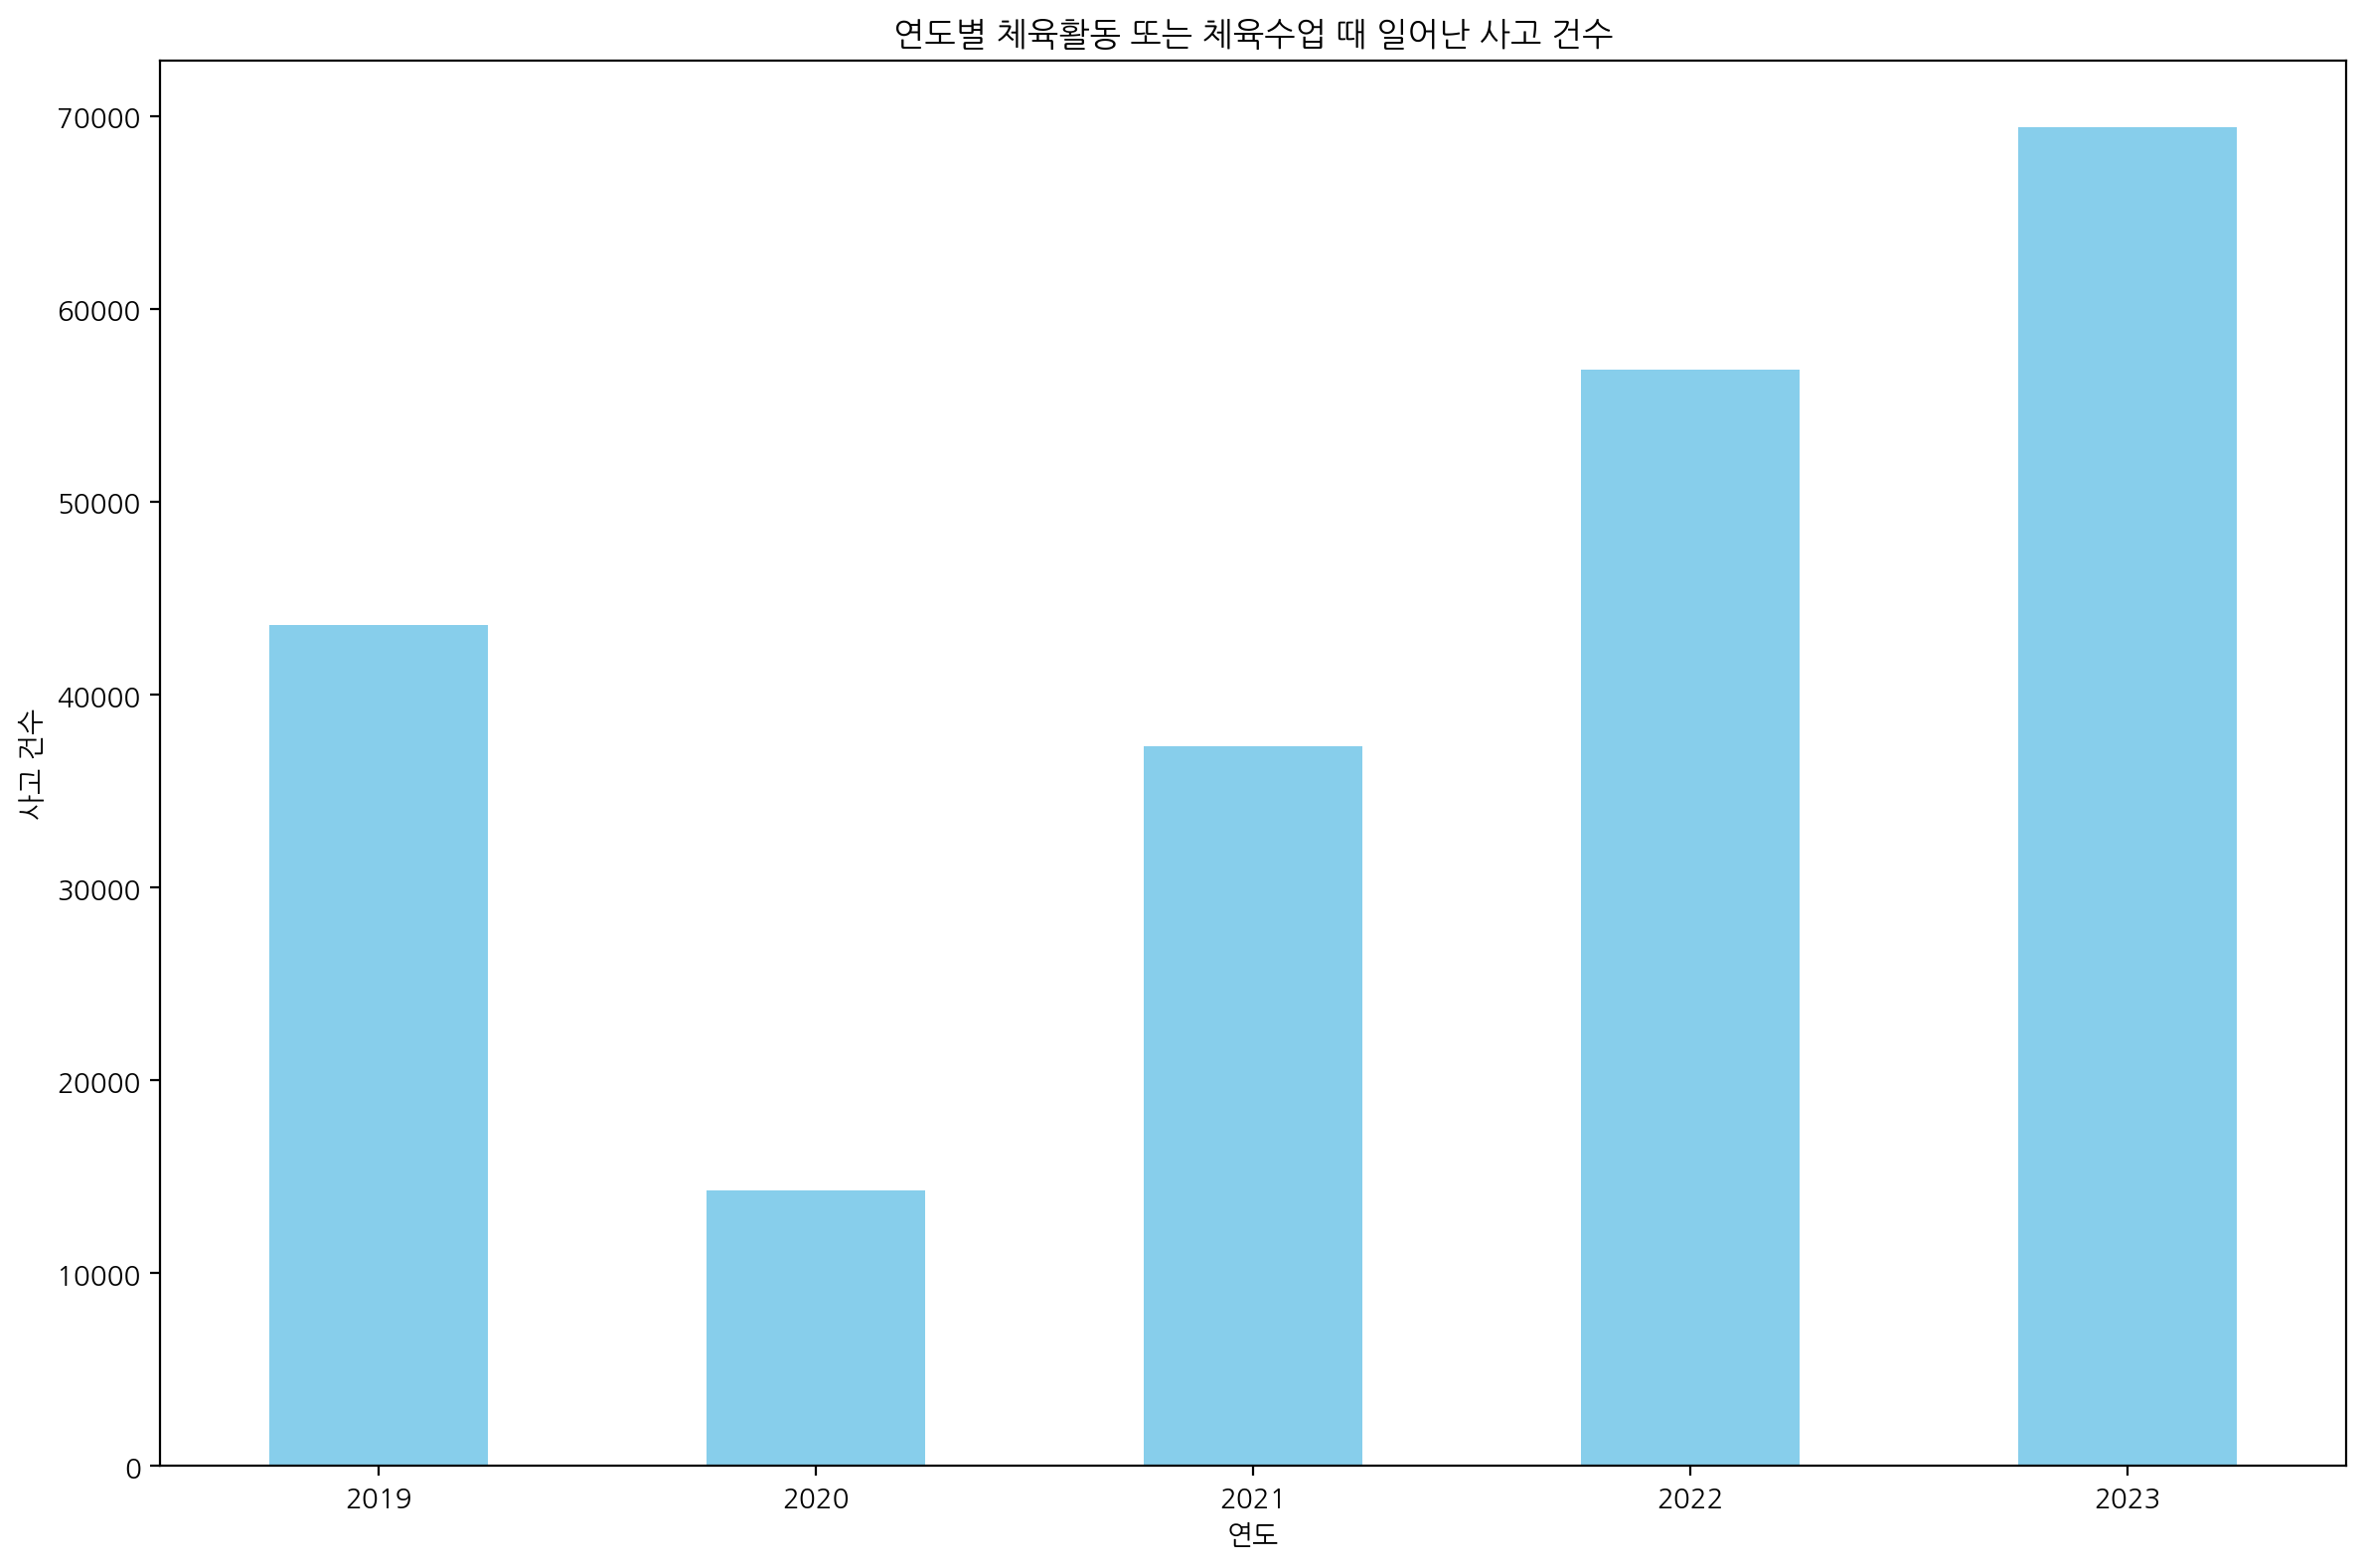

In [19]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('연도별 체육활동 또는 체육수업 때 일어난 사고 건수')
plt.xlabel('연도')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

사고당시활동
공부            2995
구기운동        157041
기타           19756
기타운동         33625
보행/주행         3970
식사/수면/휴식       293
실험실습            70
장난/놀이         3723
Name: count, dtype: int64


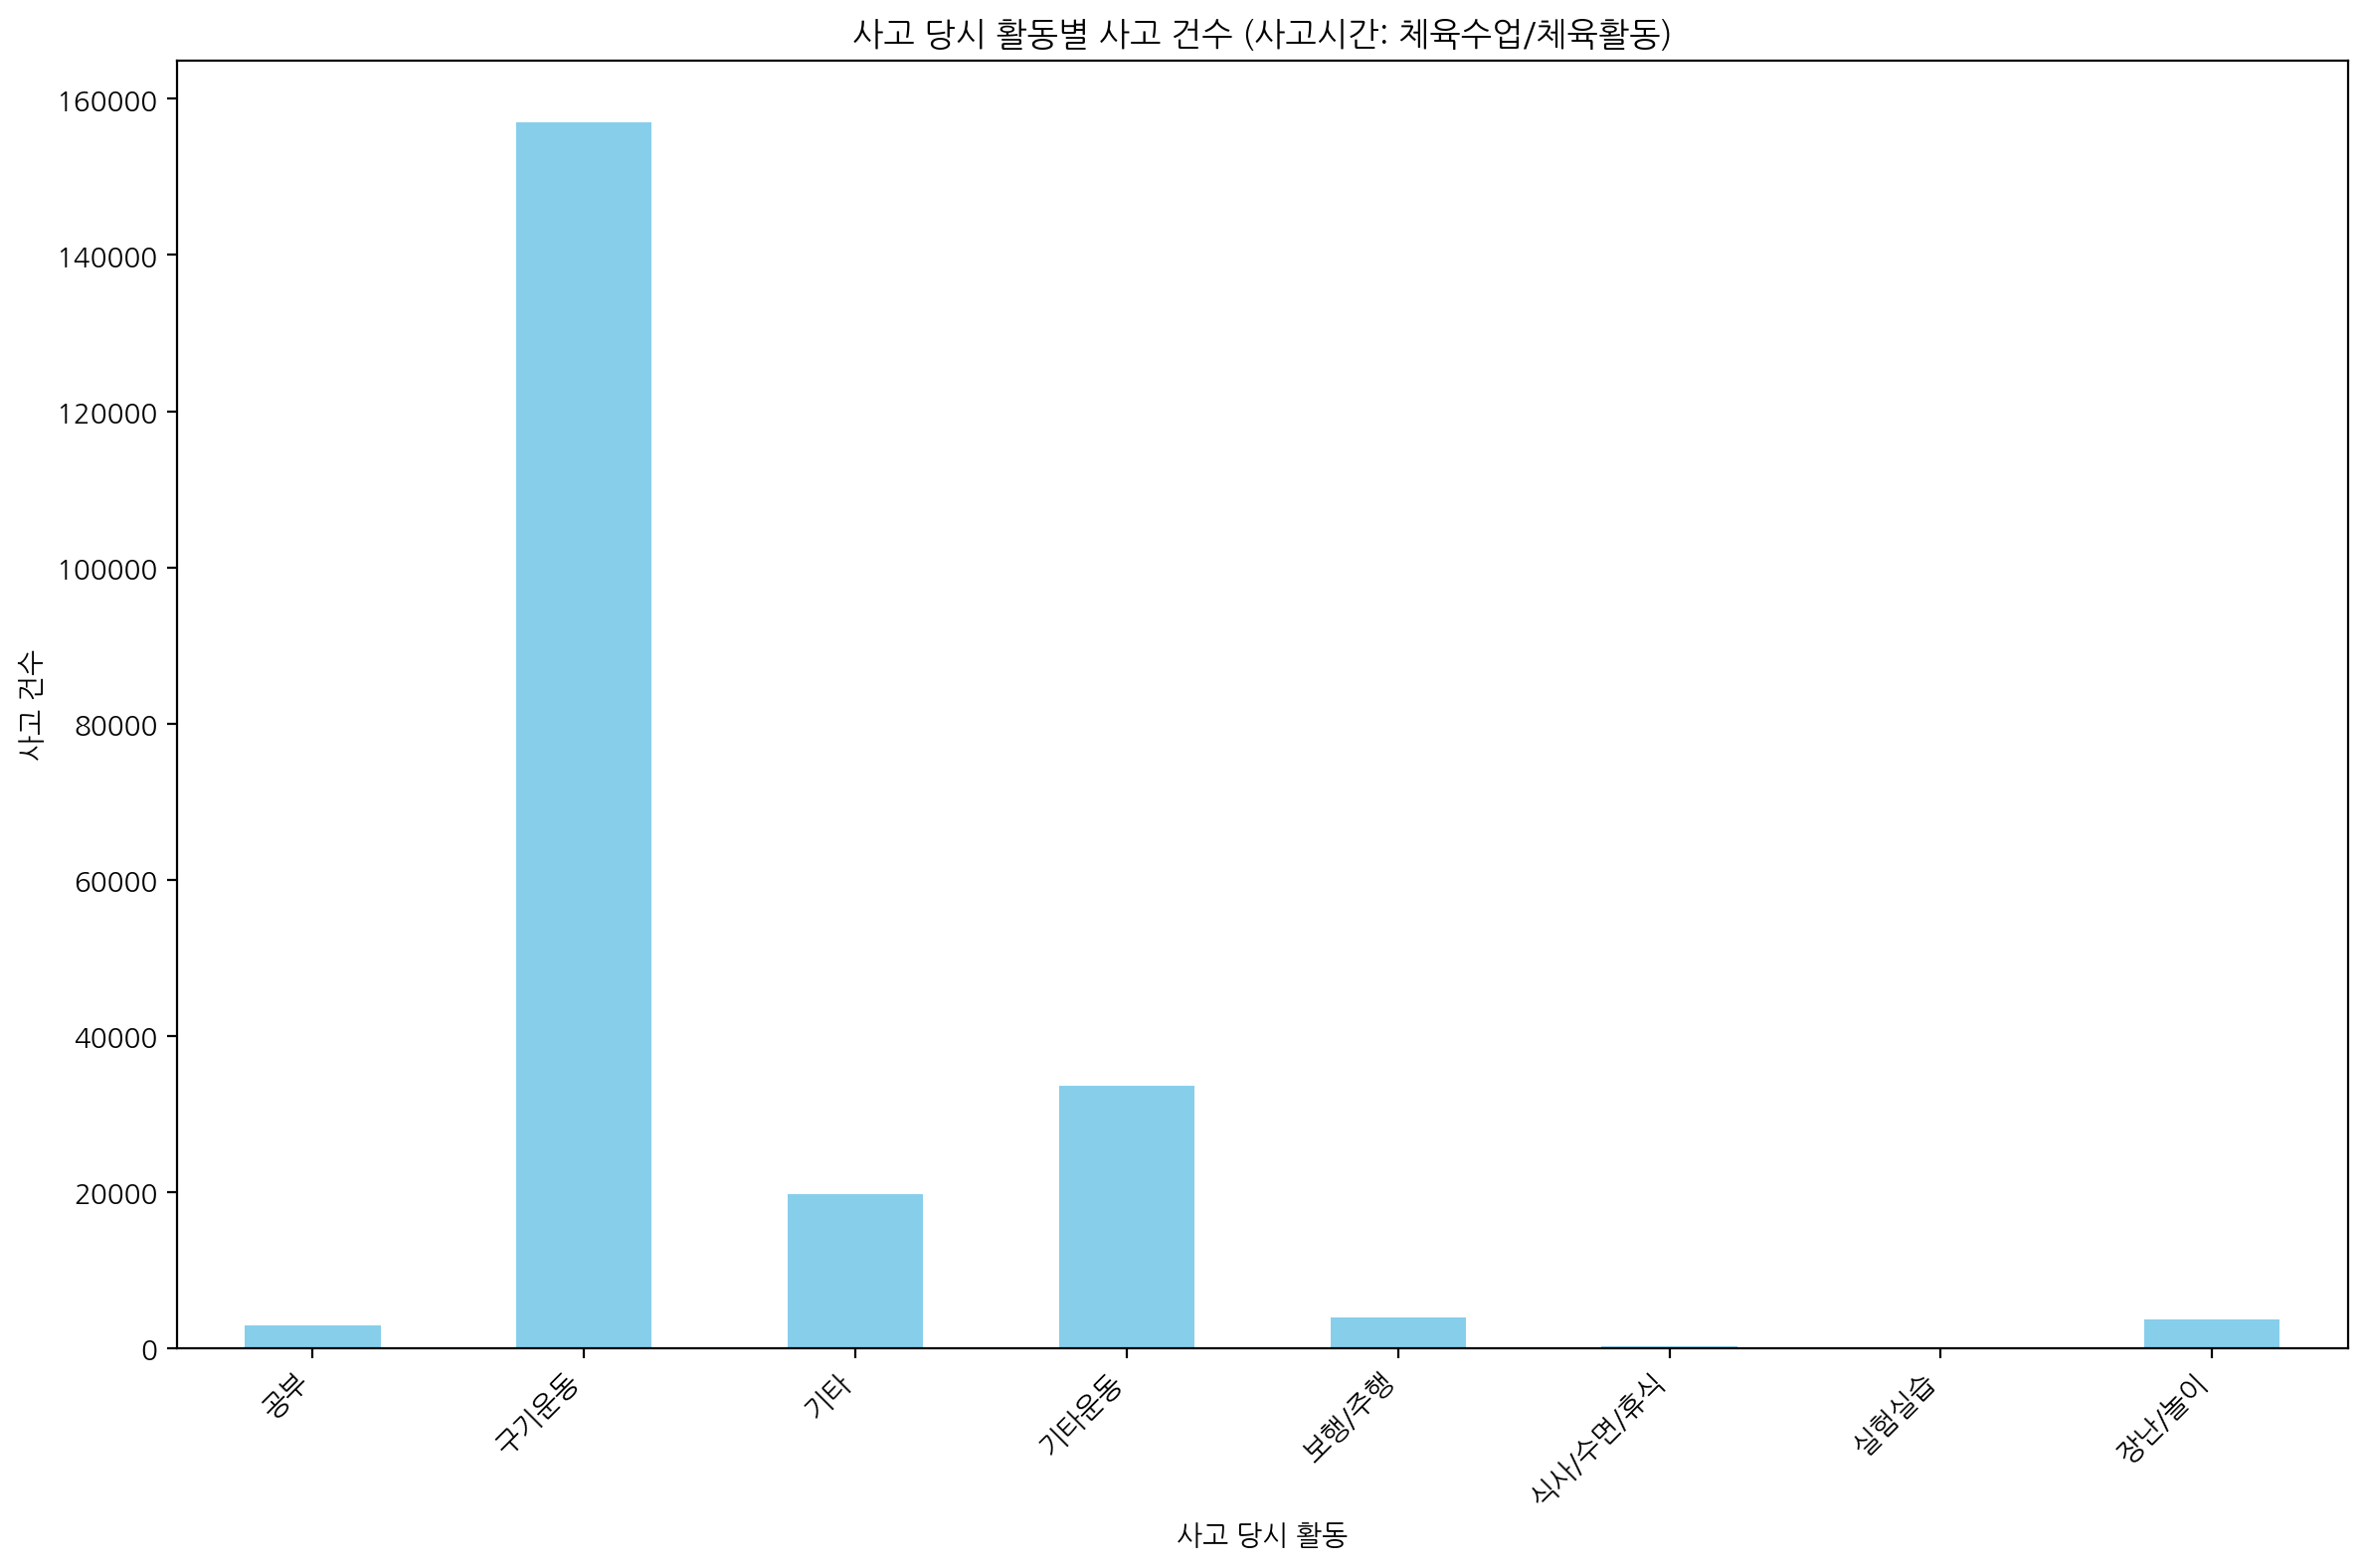

In [20]:
# Count the number of accidents by '사고당시활동'
activity_counts = filtered_data['사고당시활동'].value_counts().sort_index()

# Display the activity counts
print(activity_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('사고 당시 활동별 사고 건수 (사고시간: 체육수업/체육활동)')
plt.xlabel('사고 당시 활동')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고형태
기타               12477
낙상               12050
낙상-넘어짐           36865
낙상-떨어짐            4030
낙상-미끄러짐          20167
물리적힘 노출          97974
사람과의 충돌          16559
염좌·삐임 등 신체 충격    21351
Name: count, dtype: int64


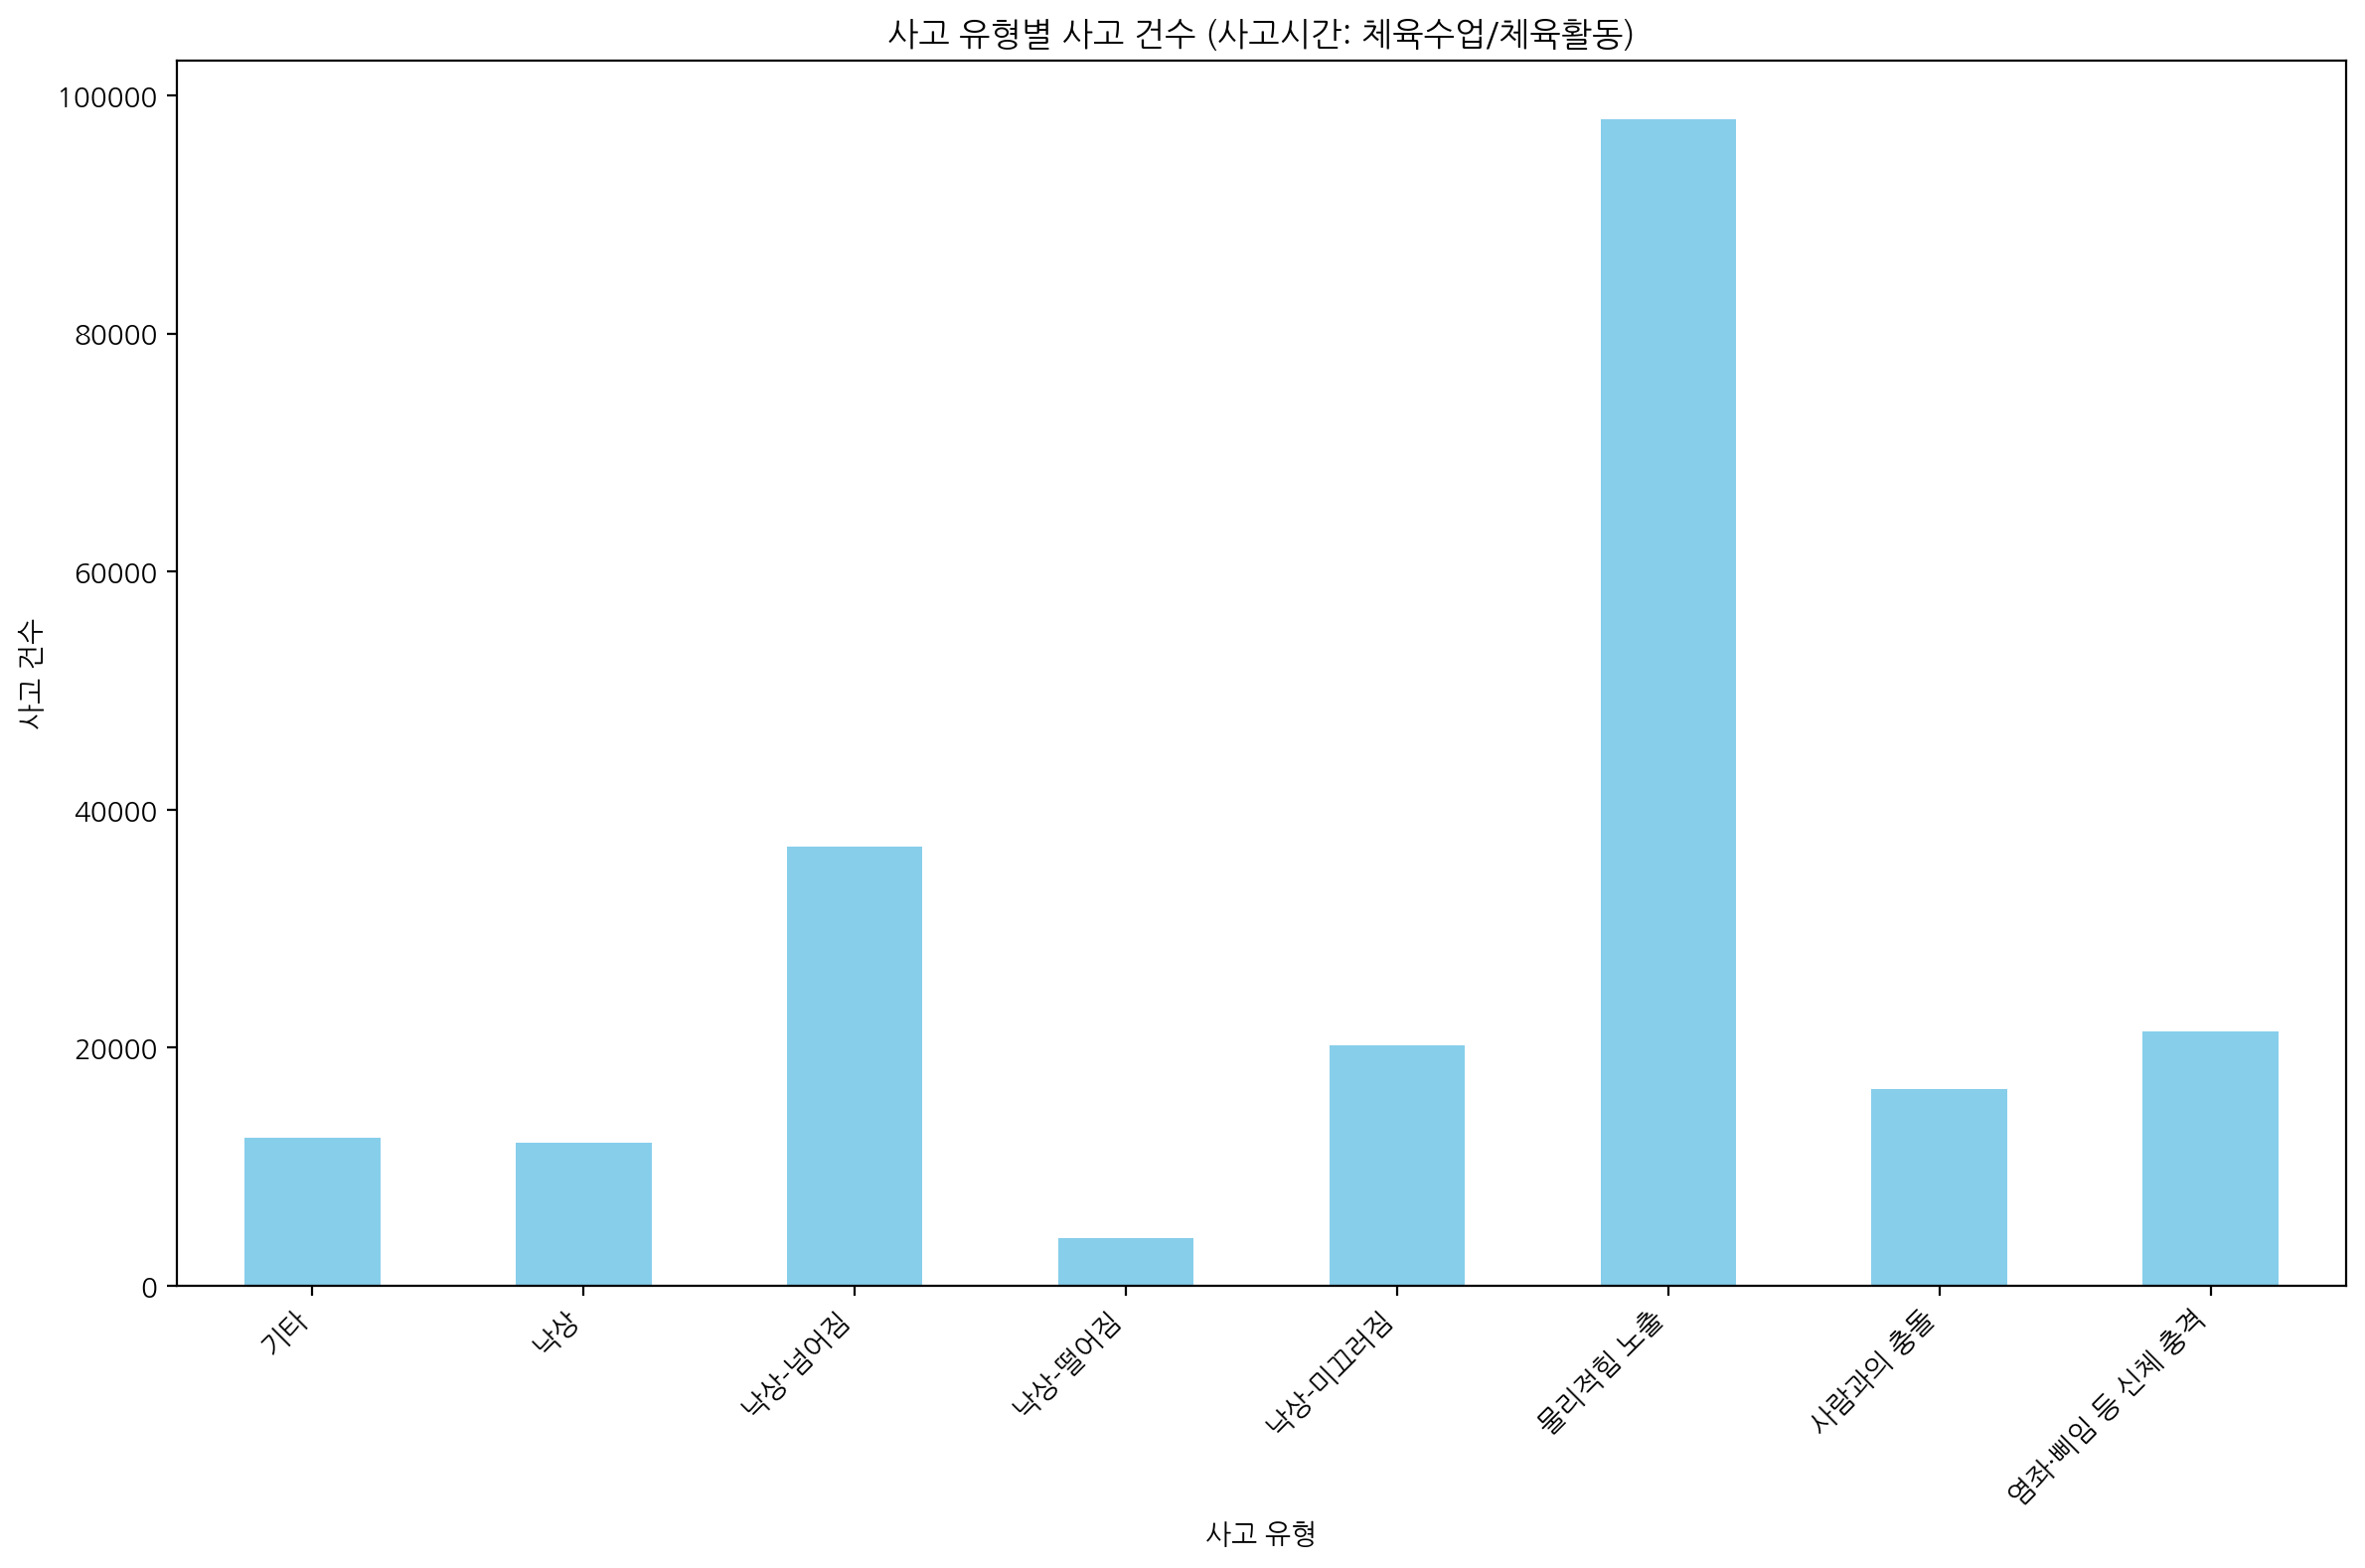

In [21]:
# Count the number of accidents by '사고형태'
accident_type_counts = filtered_data['사고형태'].value_counts().sort_index()

# Display the accident type counts
print(accident_type_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
accident_type_counts.plot(kind='bar', color='skyblue')
plt.title('사고 유형별 사고 건수 (사고시간: 체육수업/체육활동)')
plt.xlabel('사고 유형')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Display the filtered data
print(filtered_data.info())
print(filtered_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 221473 entries, 3 to 616386
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구분      221473 non-null  object
 1   학교급     221473 non-null  object
 2   지역      221473 non-null  object
 3   교육청     221473 non-null  object
 4   설립유형    221473 non-null  object
 5   사고자구분   221473 non-null  object
 6   사고자성별   221473 non-null  object
 7   사고자학년   221319 non-null  object
 8   사고발생일   221473 non-null  object
 9   사고발생요일  221473 non-null  object
 10  사고발생시각  221473 non-null  object
 11  사고시간    221473 non-null  object
 12  사고장소    221473 non-null  object
 13  사고부위    221473 non-null  object
 14  사고형태    221473 non-null  object
 15  사고당시활동  221473 non-null  object
 16  사고매개물   152052 non-null  object
 17  Year    221473 non-null  int64 
 18  매개물     69421 non-null   object
dtypes: int64(1), object(18)
memory usage: 33.8+ MB
None
          구분   학교급  지역         교육청 설립유형 사고자구분 사고자성별 사고자학년   

사고매개물
가구(책상/의자/책장/탁자/침대 등)               1193
건물(문/창문/바닥/벽 등)                   14739
기계 도구류(기계선반, 재봉틀기계 등)               105
기타                                17706
날카로운 물건(칼/가위/송곳 등)                  161
열(불/뜨거운 물 등)                         10
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)    89945
운송용구(차/자전거/선박/항공기 등)                115
자연(사람/동물/식물 등)                    28078
Name: count, dtype: int64


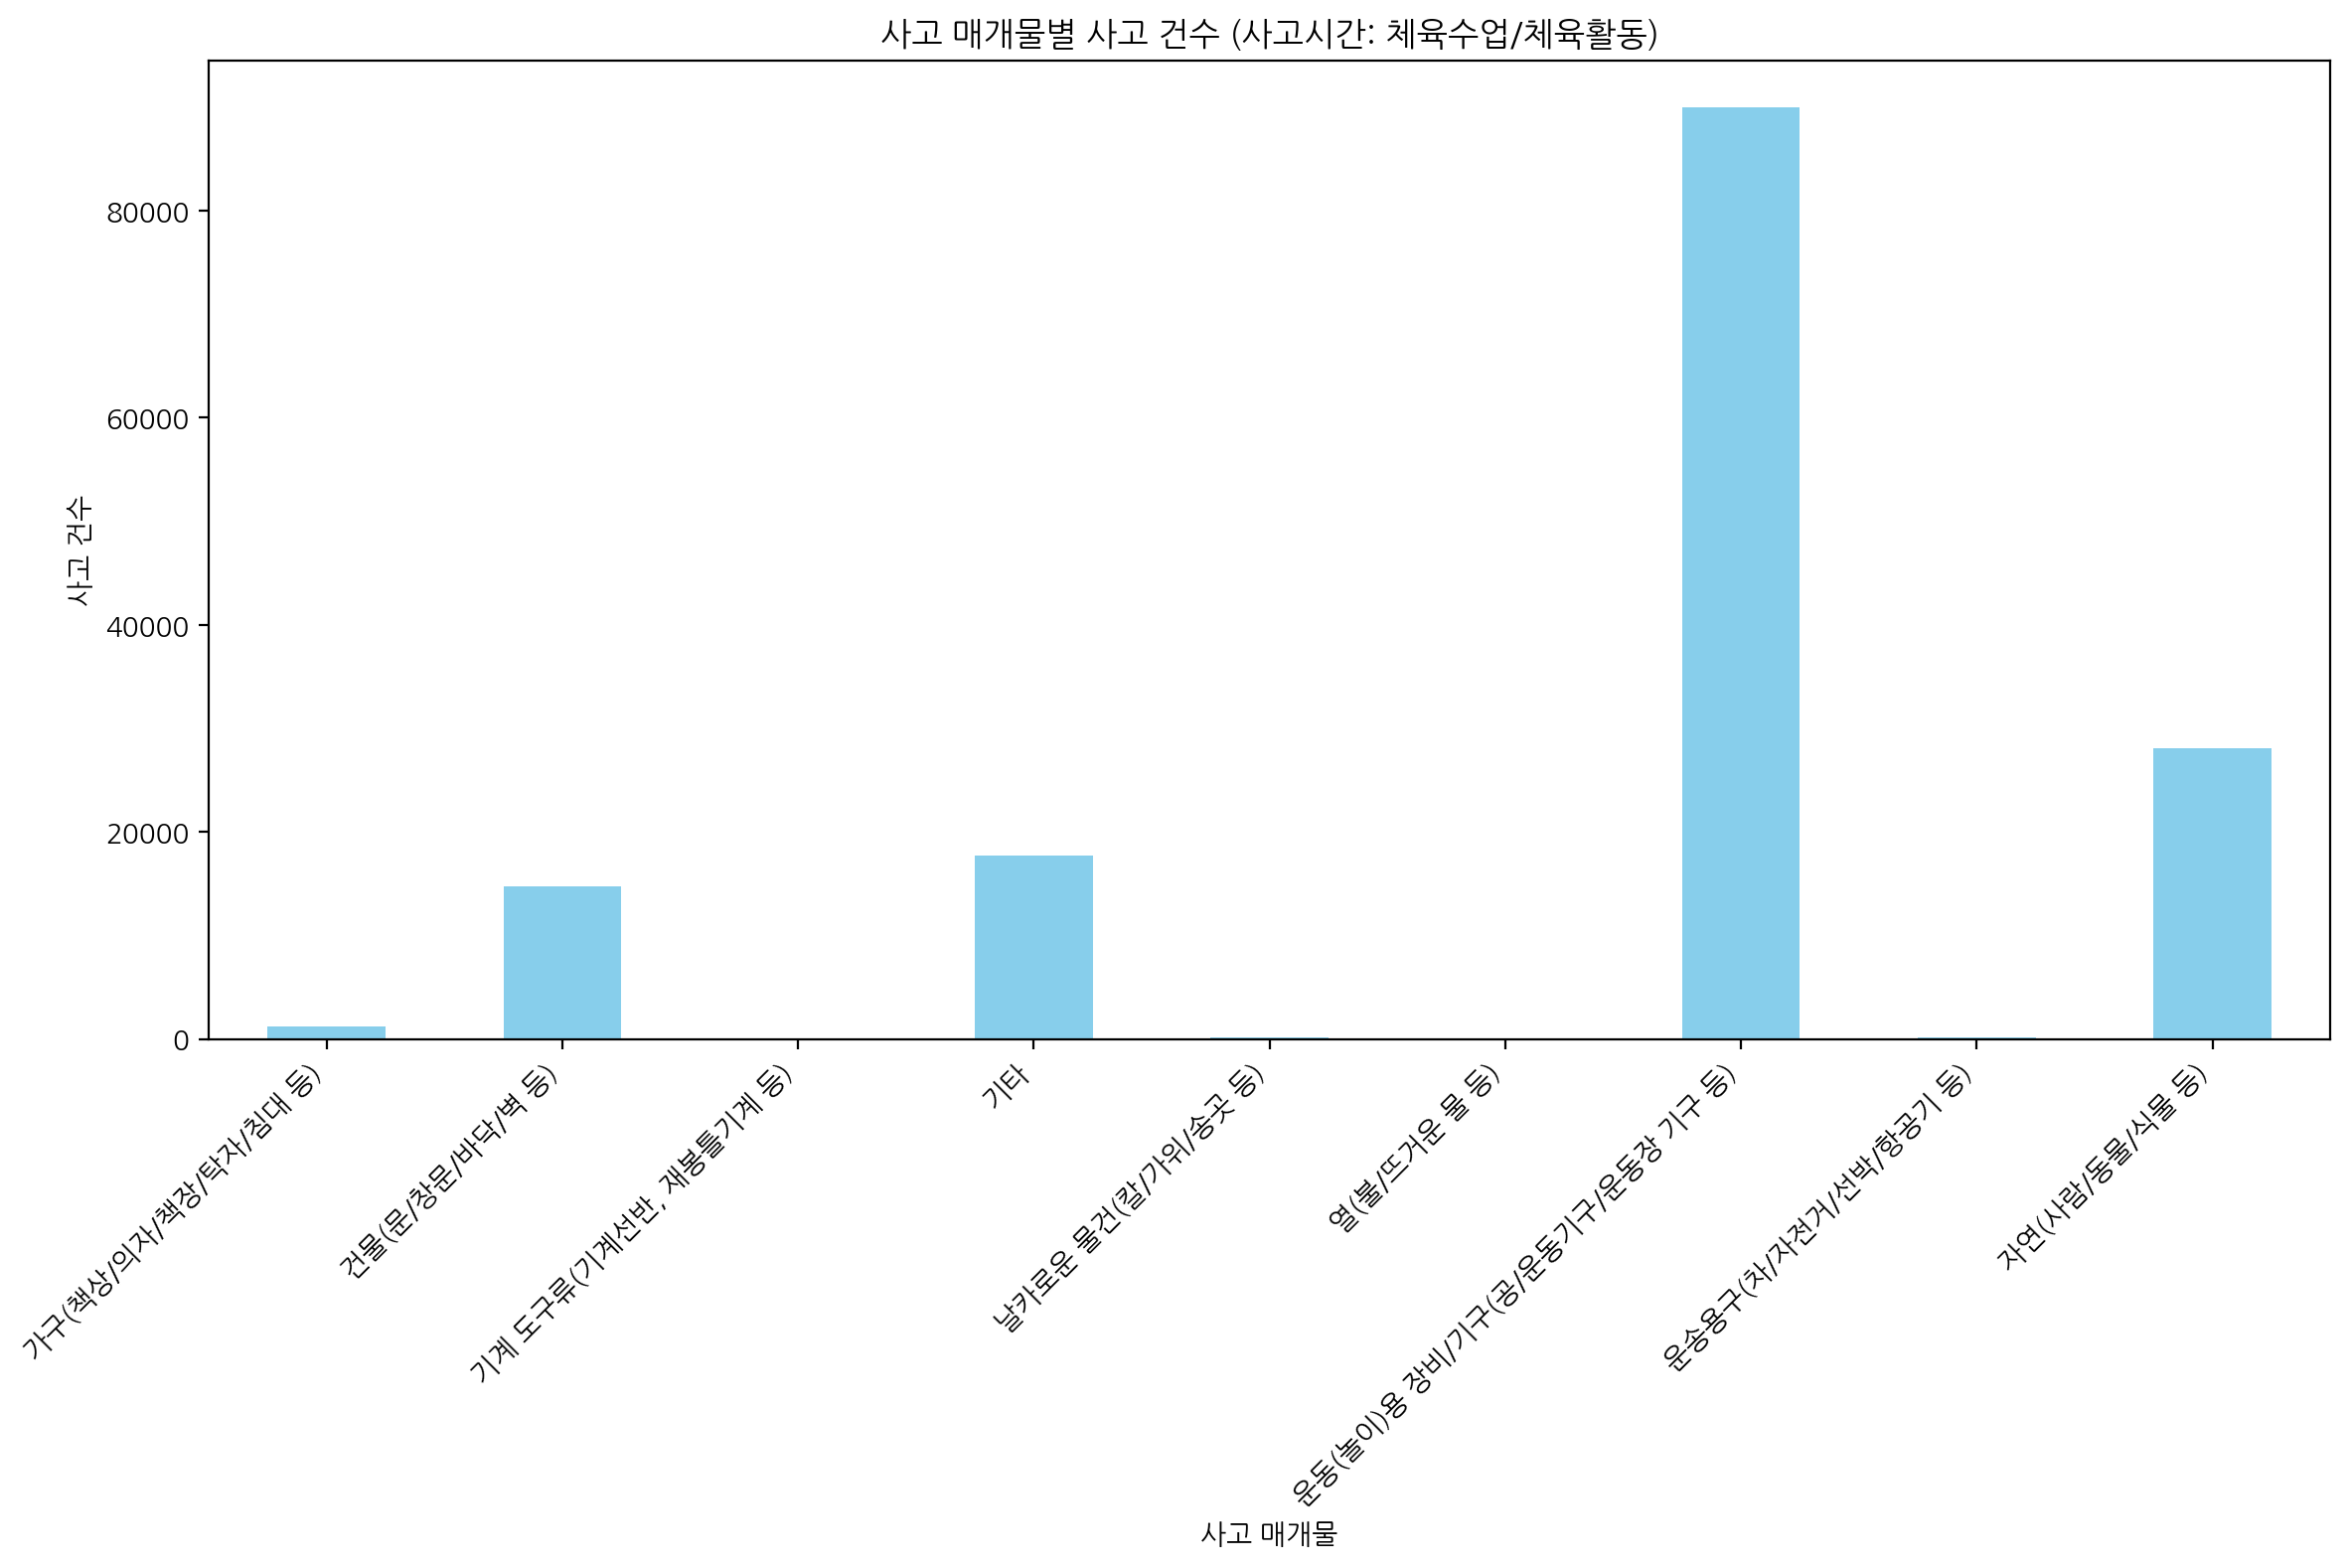

In [23]:
# Count the number of accidents by the identified 매개물 column
medium_counts = filtered_data[medium_column].value_counts().sort_index()

# Display the medium counts
print(medium_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
medium_counts.plot(kind='bar', color='skyblue')
plt.title(f'사고 매개물별 사고 건수 (사고시간: 체육수업/체육활동)')
plt.xlabel('사고 매개물')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
# Filter the data based on '사고발생시간' being '식사/수면/휴식' or '휴식시간 및 청소시간'
filtered_data = data_combined[
    data_combined['사고시간'].str.contains('쉬는시간|휴식시간 및 청소시간', na=False)
]

# Display the filtered data
print(filtered_data.info())
print(filtered_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 86895 entries, 1 to 616383
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      86895 non-null  object
 1   학교급     86895 non-null  object
 2   지역      86895 non-null  object
 3   교육청     86895 non-null  object
 4   설립유형    86895 non-null  object
 5   사고자구분   86895 non-null  object
 6   사고자성별   86895 non-null  object
 7   사고자학년   86789 non-null  object
 8   사고발생일   86895 non-null  object
 9   사고발생요일  86895 non-null  object
 10  사고발생시각  86895 non-null  object
 11  사고시간    86895 non-null  object
 12  사고장소    86895 non-null  object
 13  사고부위    86895 non-null  object
 14  사고형태    86895 non-null  object
 15  사고당시활동  86895 non-null  object
 16  사고매개물   54565 non-null  object
 17  Year    86895 non-null  int64 
 18  매개물     32330 non-null  object
dtypes: int64(1), object(18)
memory usage: 13.3+ MB
None
          구분   학교급  지역        교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
1  

사고장소
교실      28485
교외        135
교외활동       92
부속시설    11011
운동장     14685
통로      32487
Name: count, dtype: int64


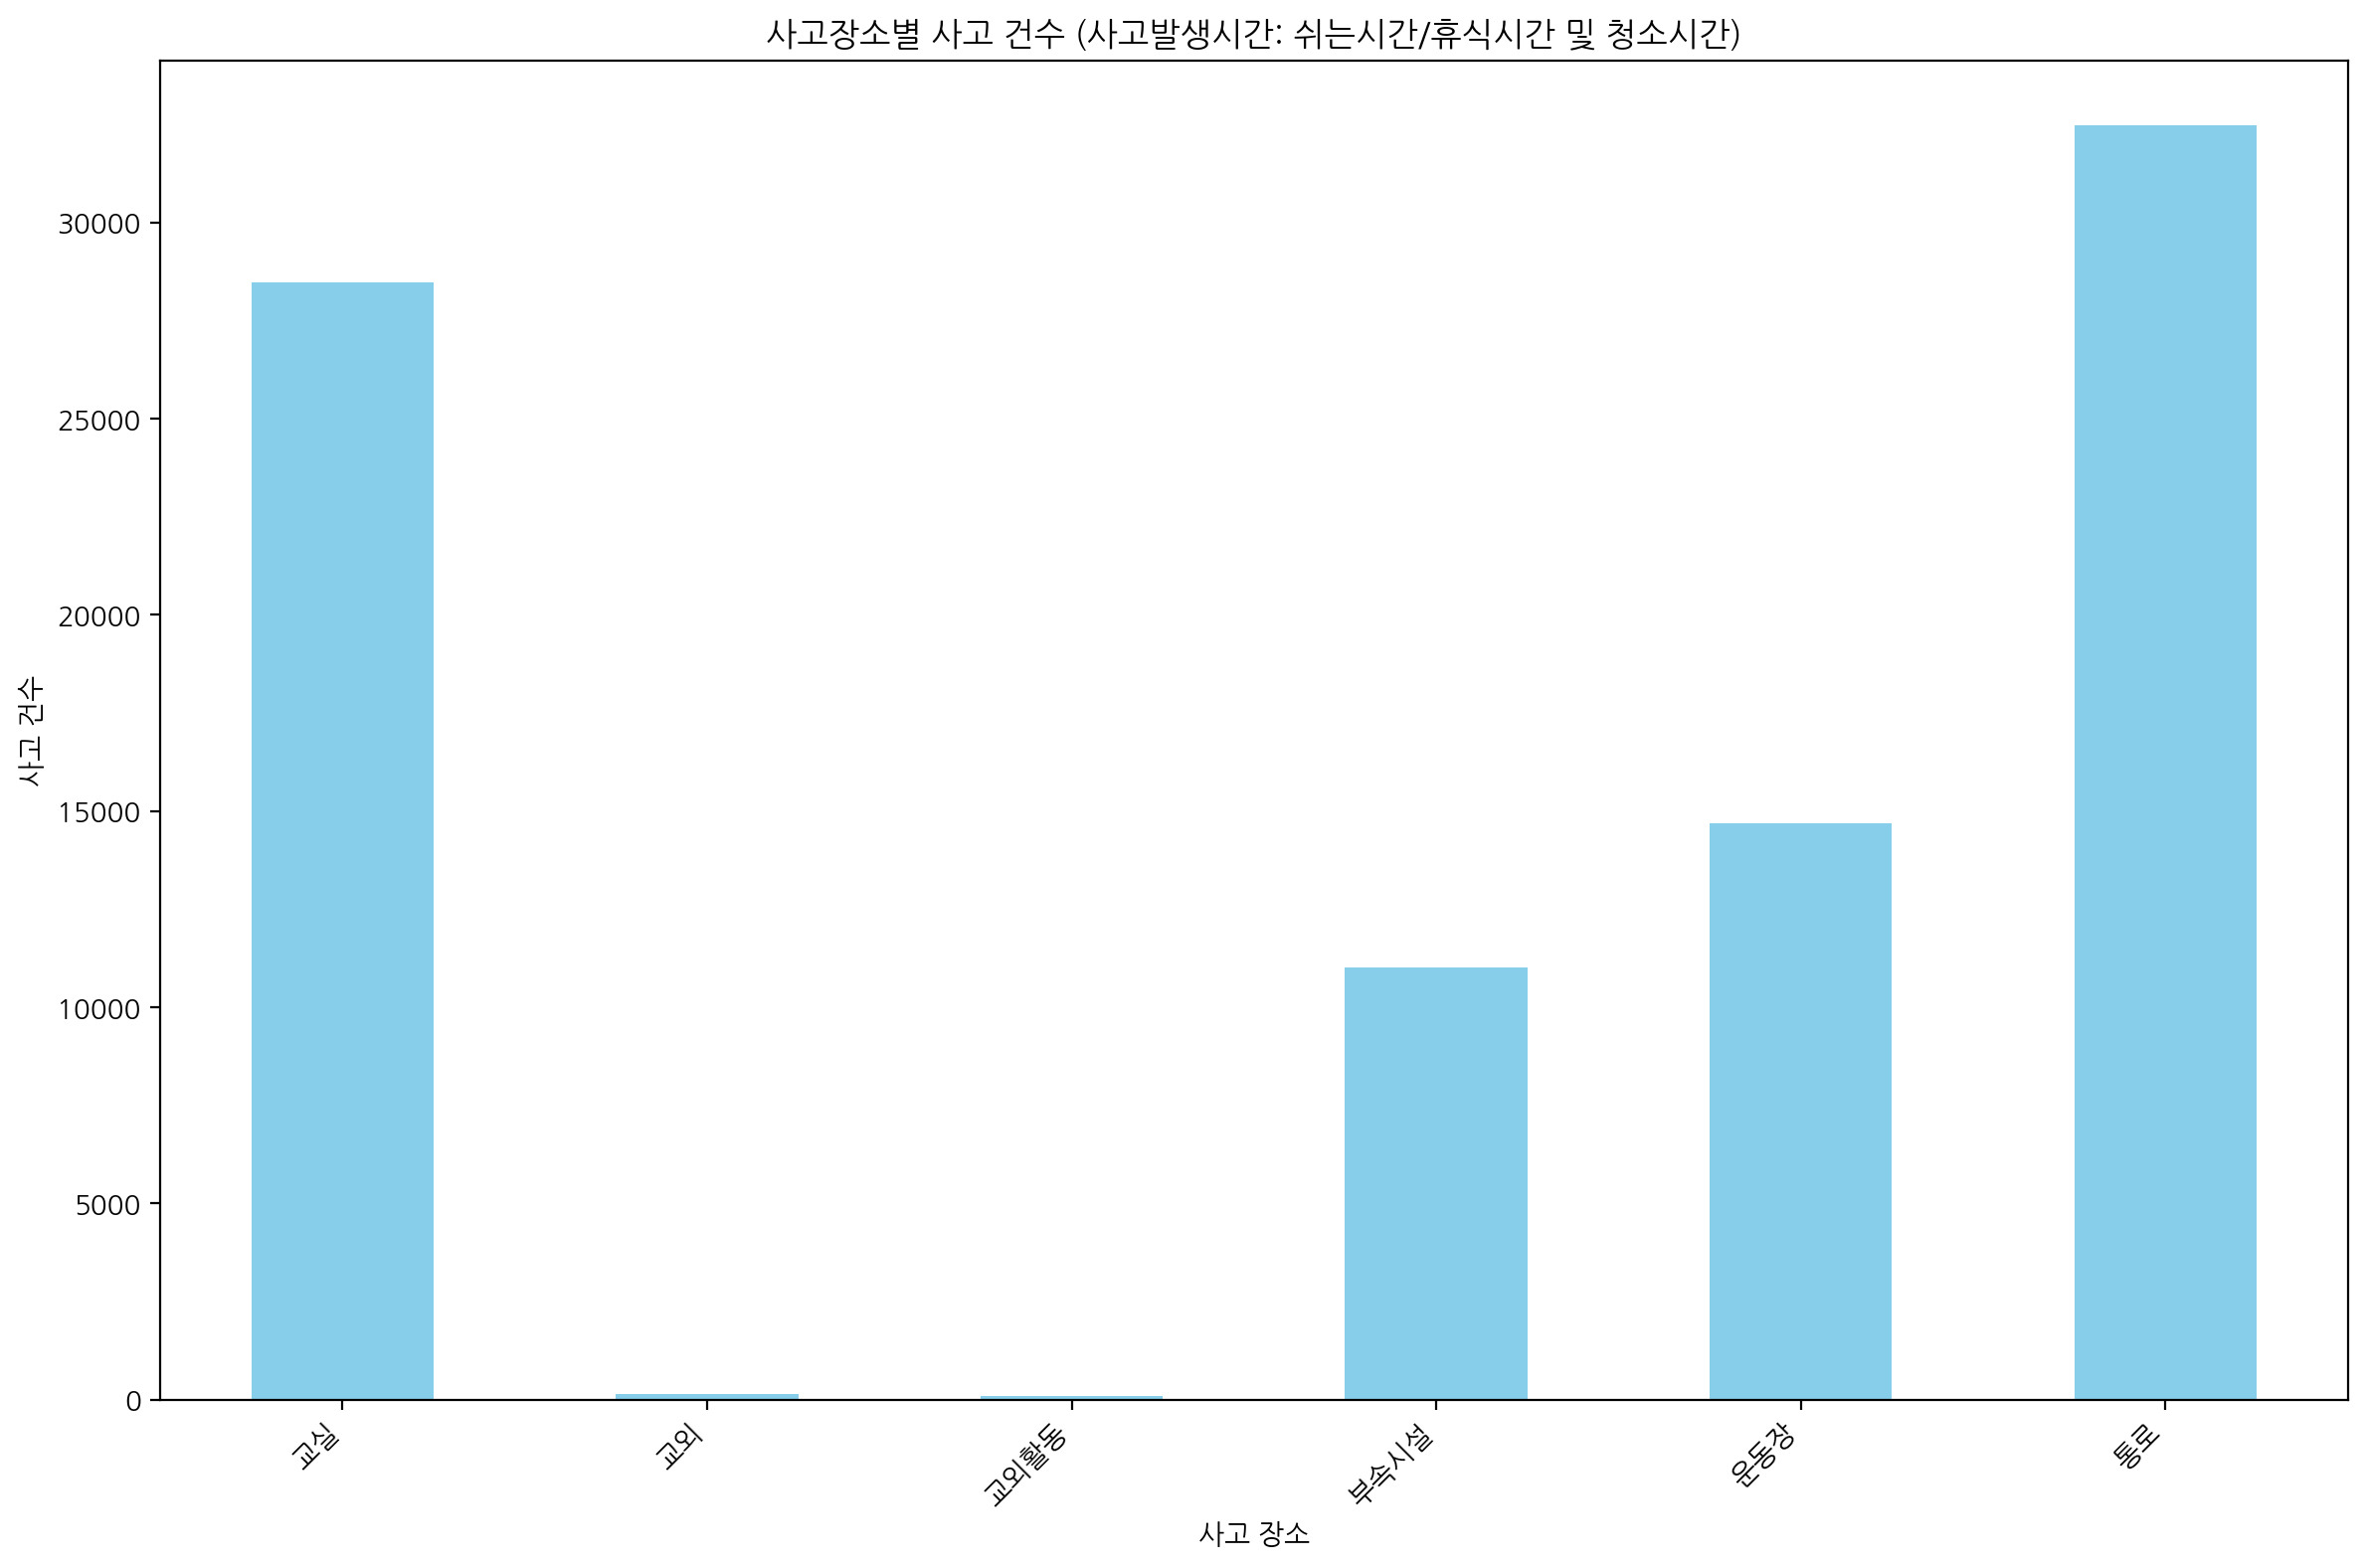

In [25]:
# Count the number of accidents by '사고장소'
location_counts = filtered_data['사고장소'].value_counts().sort_index()

# Display the location counts
print(location_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar', color='skyblue')
plt.title(f'사고장소별 사고 건수 (사고발생시간: 쉬는시간/휴식시간 및 청소시간)')
plt.xlabel('사고 장소')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
# Filter the data based on '사고발생시간' being '식사/수면/휴식' or '휴식시간 및 청소시간'
filtered_data = data_combined[
    data_combined['사고시간'].str.contains('쉬는시간|휴식시간 및 청소시간', na=False)
    & (data_combined['사고장소'] == '통로')
]

# Display the filtered data
print(filtered_data.info())
print(filtered_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 32487 entries, 1 to 616383
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      32487 non-null  object
 1   학교급     32487 non-null  object
 2   지역      32487 non-null  object
 3   교육청     32487 non-null  object
 4   설립유형    32487 non-null  object
 5   사고자구분   32487 non-null  object
 6   사고자성별   32487 non-null  object
 7   사고자학년   32452 non-null  object
 8   사고발생일   32487 non-null  object
 9   사고발생요일  32487 non-null  object
 10  사고발생시각  32487 non-null  object
 11  사고시간    32487 non-null  object
 12  사고장소    32487 non-null  object
 13  사고부위    32487 non-null  object
 14  사고형태    32487 non-null  object
 15  사고당시활동  32487 non-null  object
 16  사고매개물   20926 non-null  object
 17  Year    32487 non-null  int64 
 18  매개물     11561 non-null  object
dtypes: int64(1), object(18)
memory usage: 5.0+ MB
None
          구분   학교급  지역        교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
1   

사고당시활동
공부             61
구기운동           81
기타           1865
기타운동           68
보행/주행       19752
식사/수면/휴식     3084
실험실습           11
장난/놀이        7565
Name: count, dtype: int64


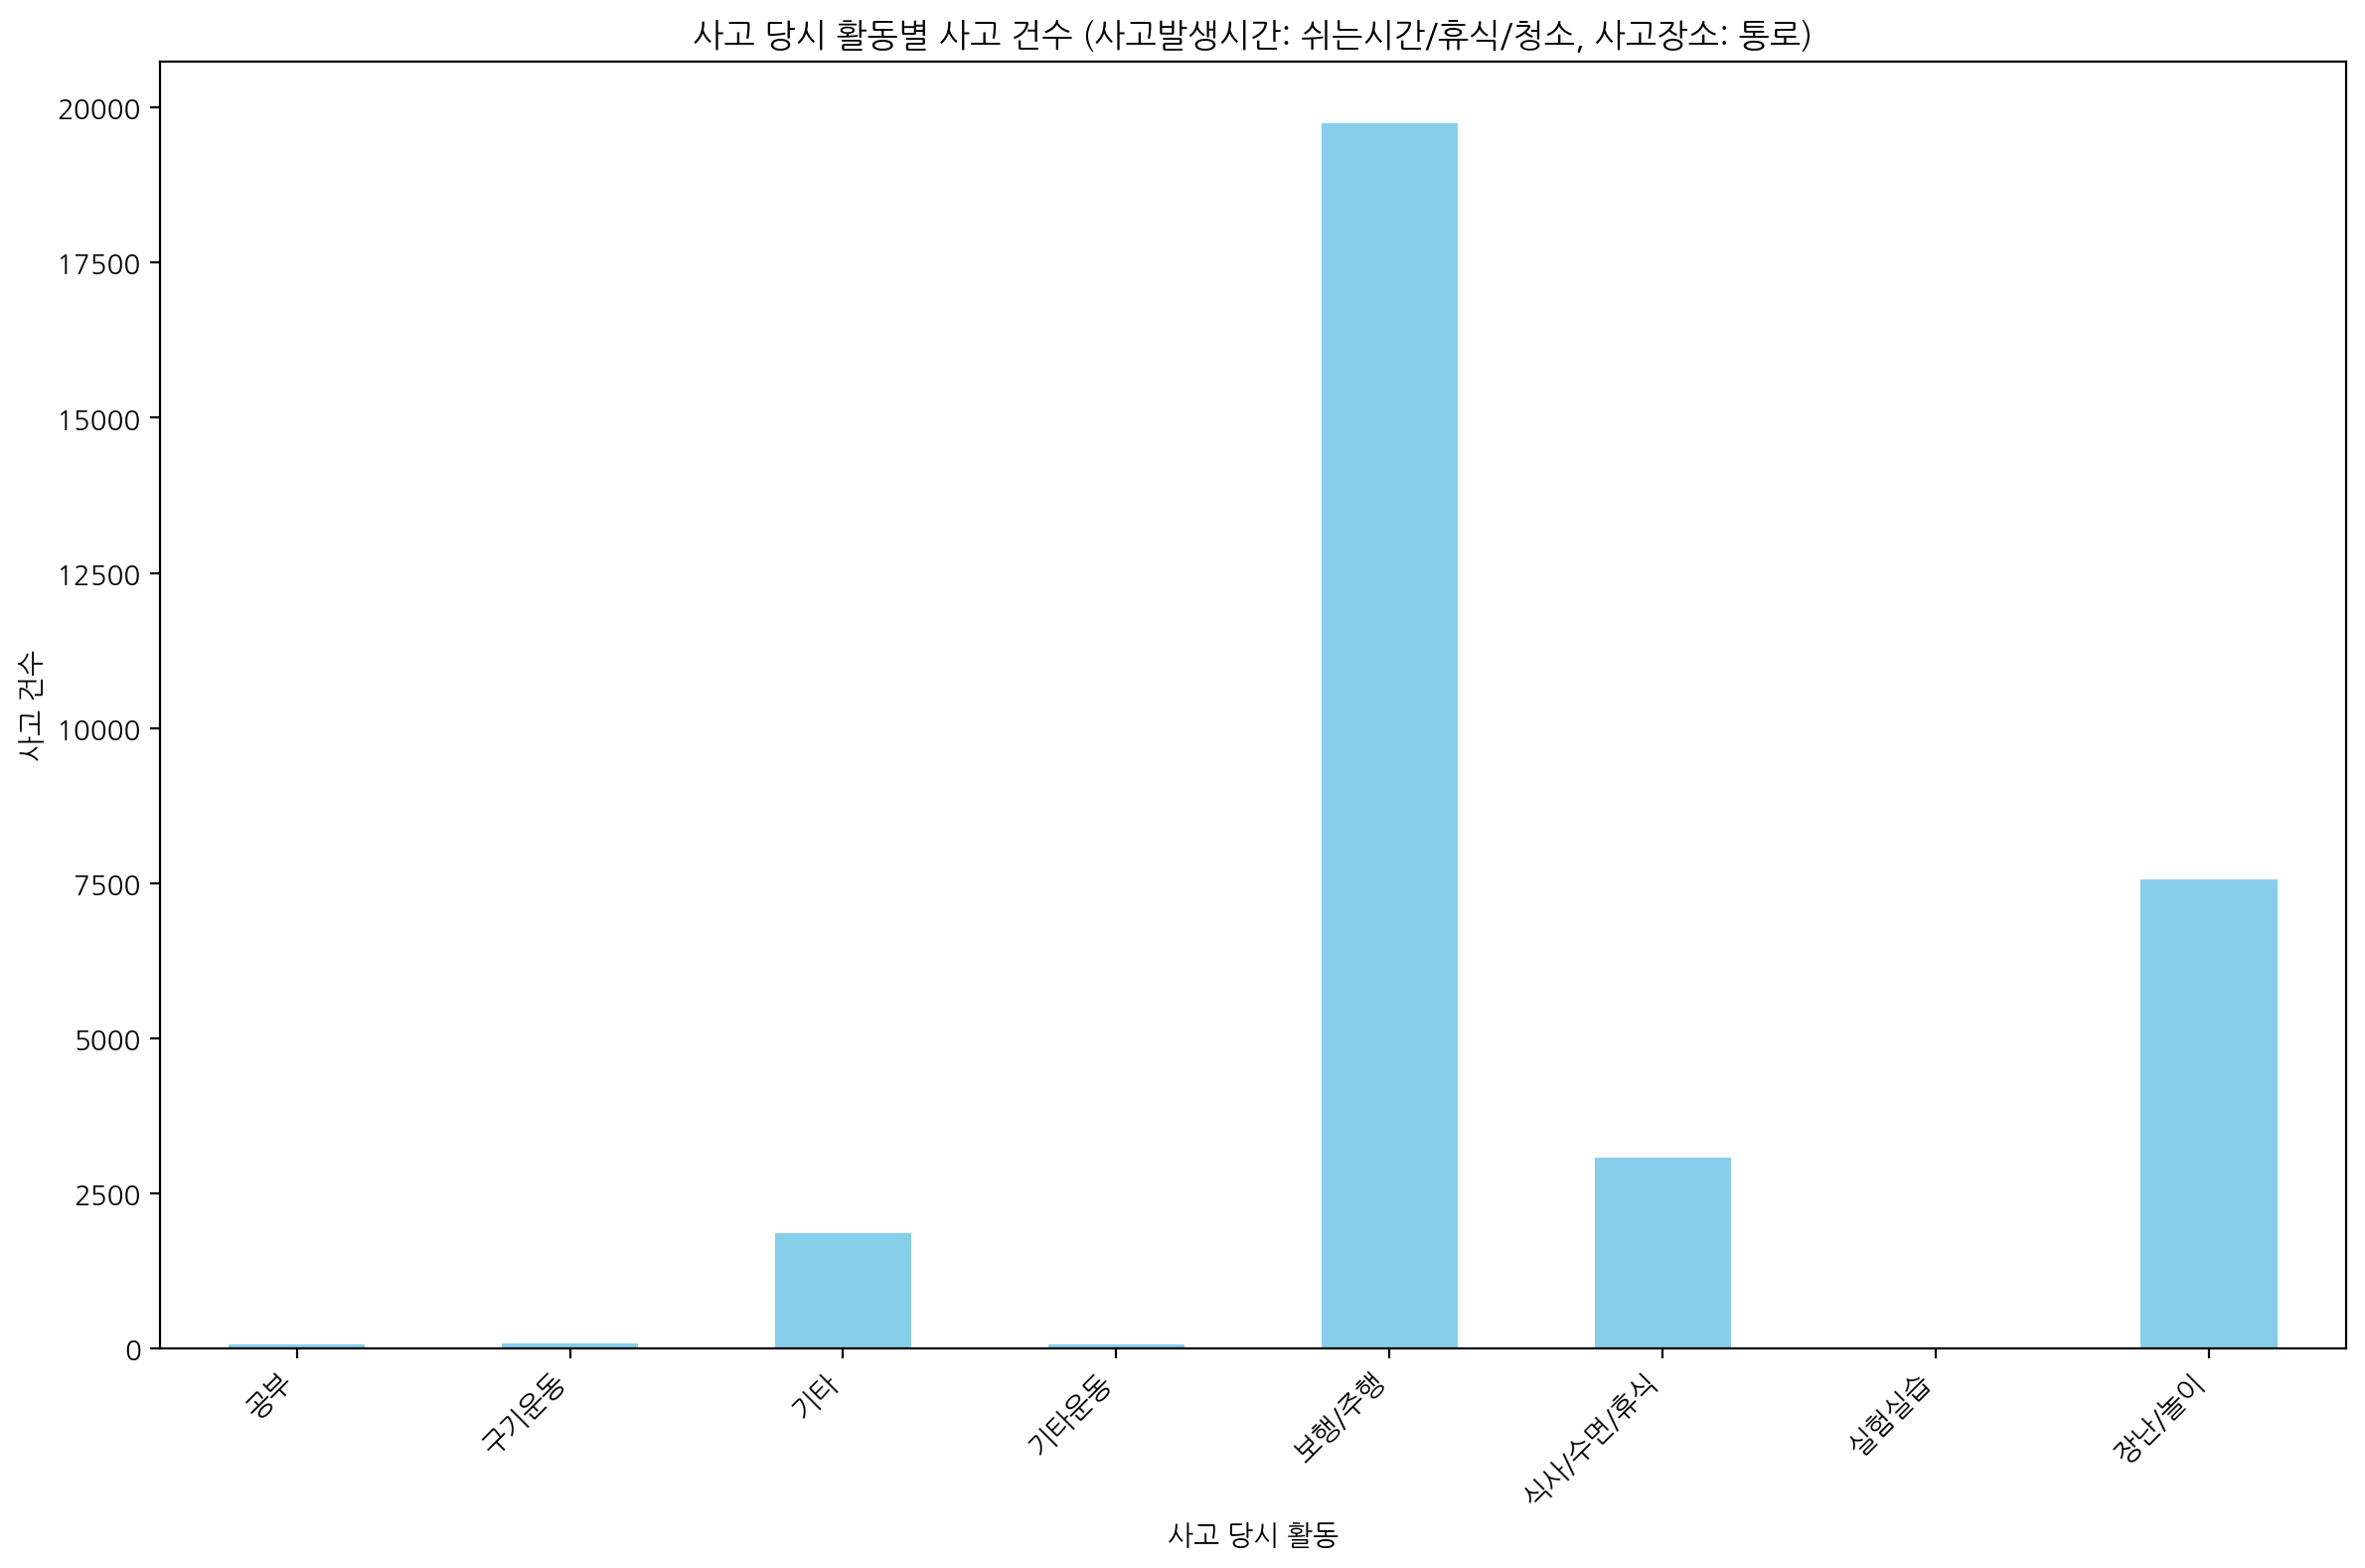

In [27]:
# Count the number of accidents by '사고당시활동'
activity_counts = filtered_data['사고당시활동'].value_counts().sort_index()

# Display the activity counts
print(activity_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('사고 당시 활동별 사고 건수 (사고발생시간: 쉬는시간/휴식/청소, 사고장소: 통로)')
plt.xlabel('사고 당시 활동')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고형태
기타               1248
낙상               4511
낙상-넘어짐           7869
낙상-떨어짐            583
낙상-미끄러짐          4568
물리적힘 노출          8220
사람과의 충돌          3751
염좌·삐임 등 신체 충격    1737
Name: count, dtype: int64


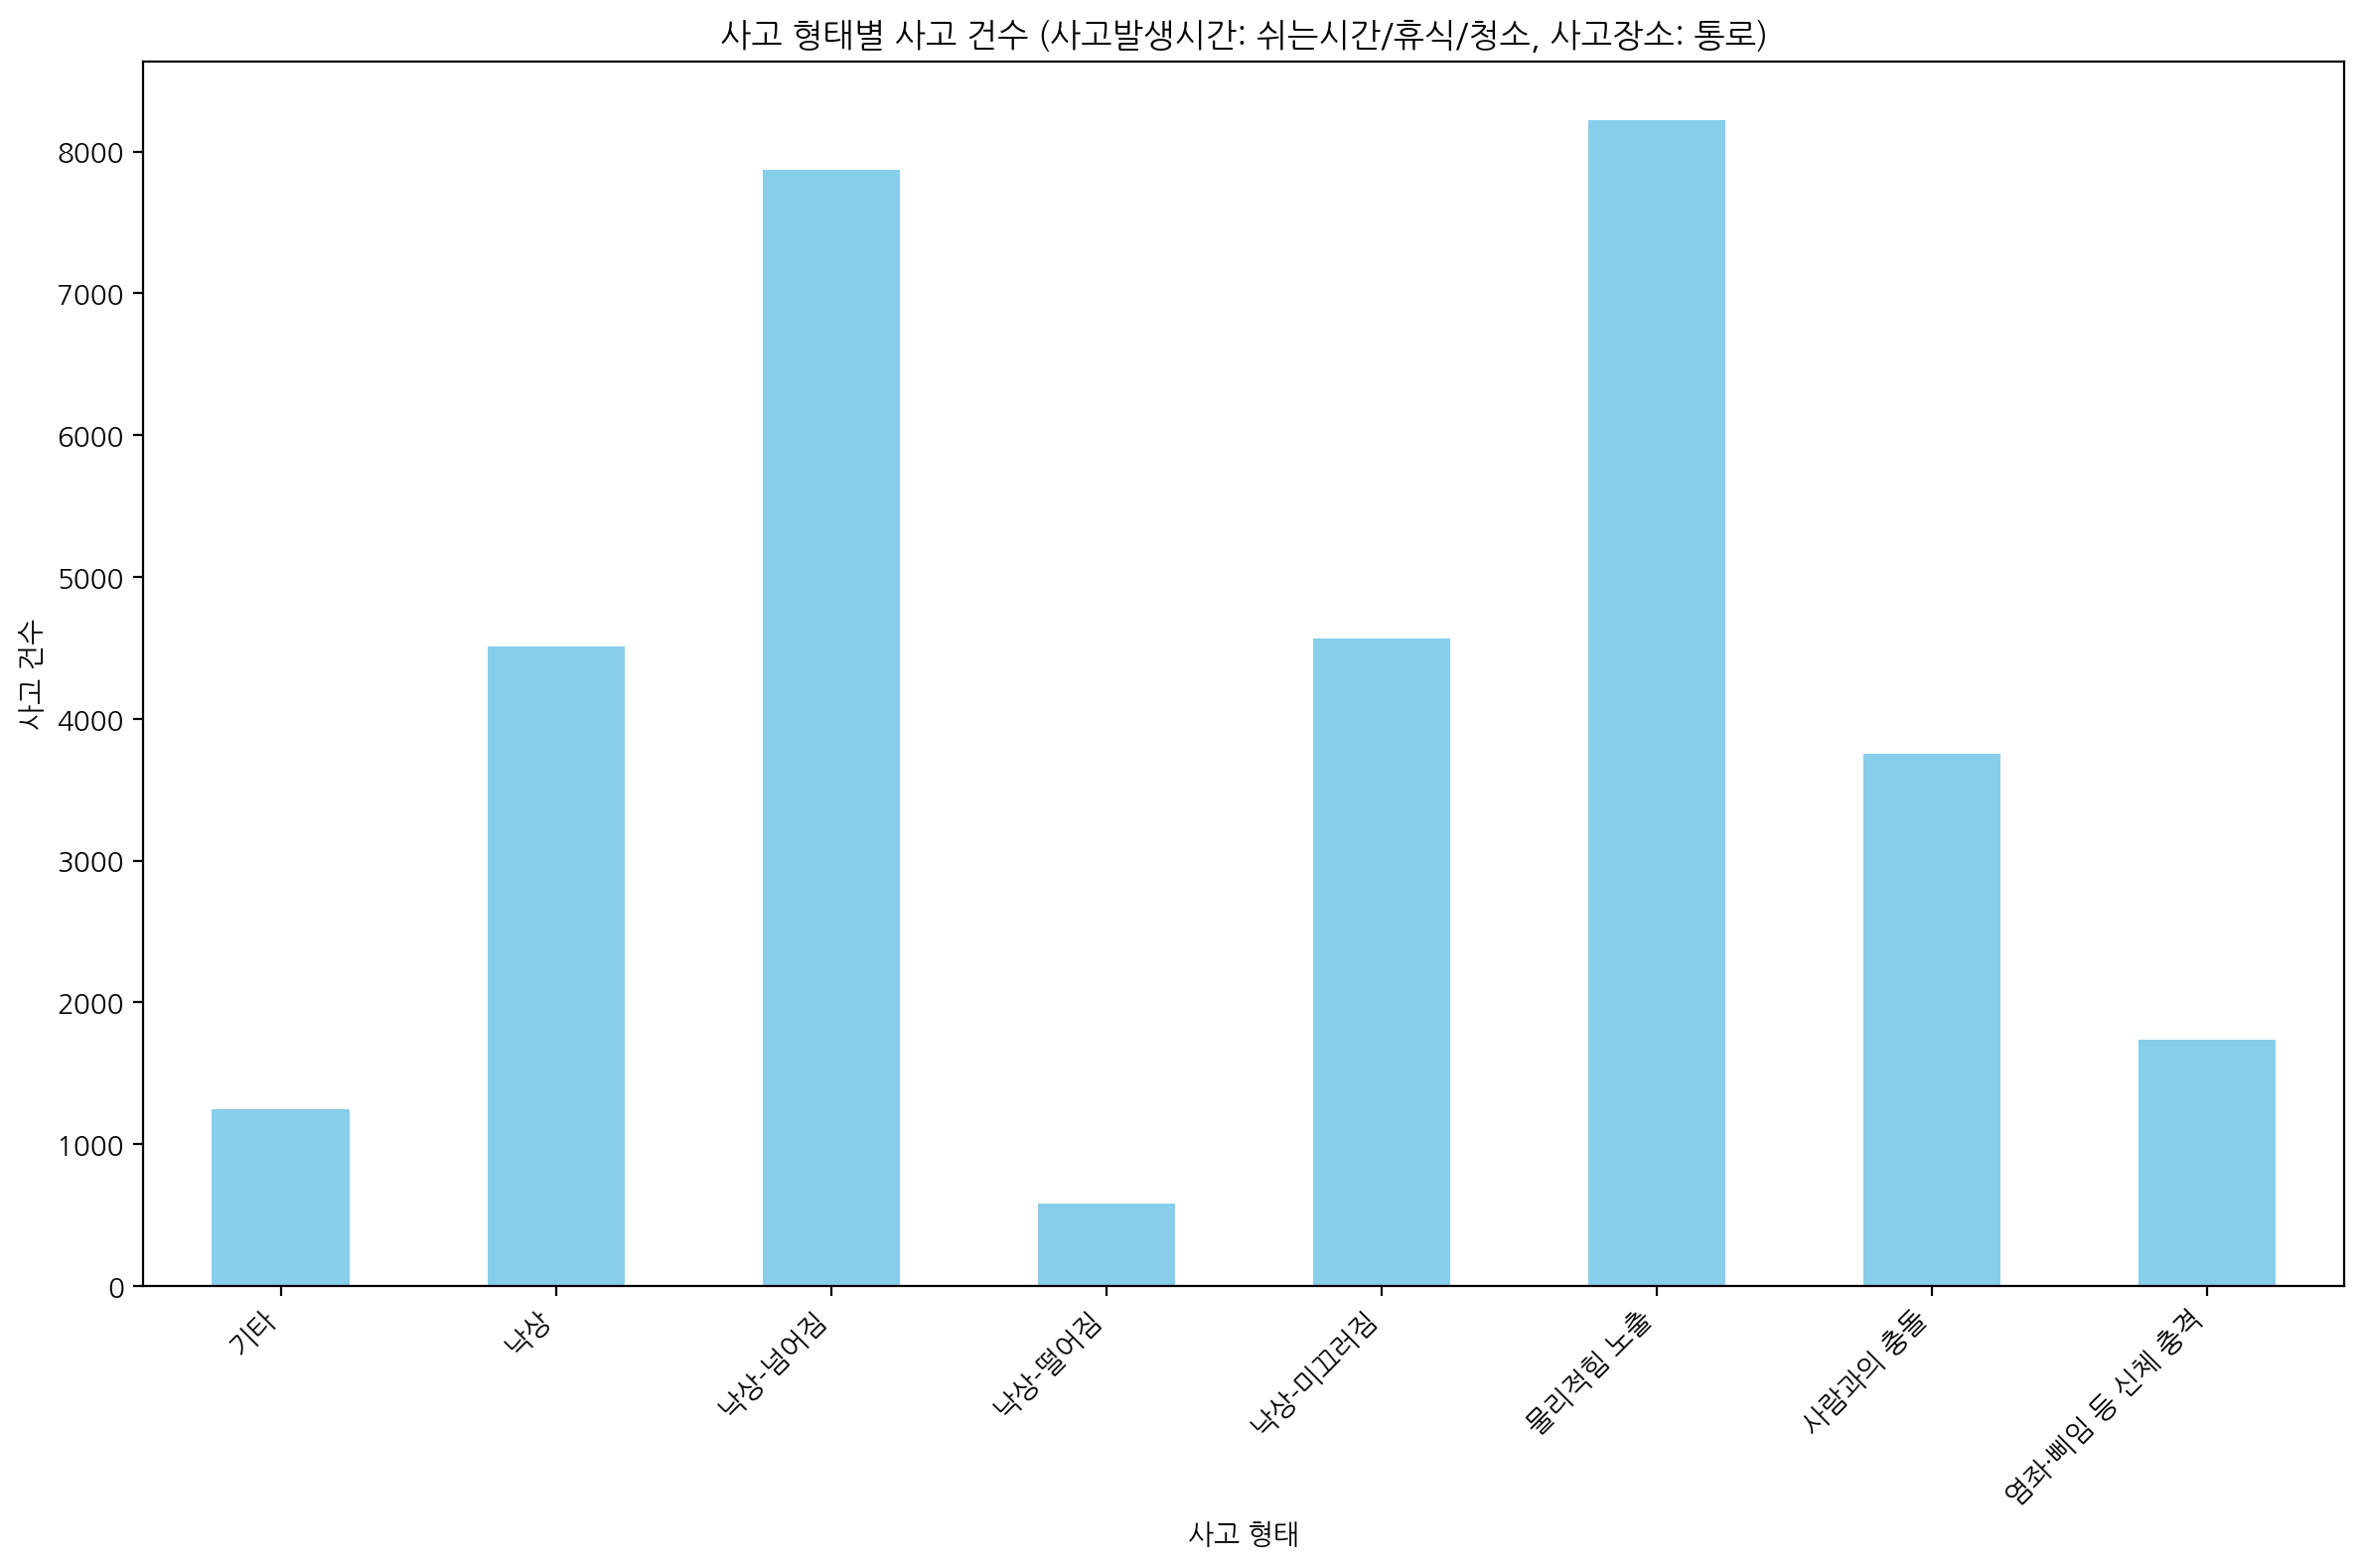

In [28]:
# Count the number of accidents by '사고형태'
accident_type_counts = filtered_data['사고형태'].value_counts().sort_index()

# Display the accident type counts
print(accident_type_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
accident_type_counts.plot(kind='bar', color='skyblue')
plt.title('사고 형태별 사고 건수 (사고발생시간: 쉬는시간/휴식/청소, 사고장소: 통로)')
plt.xlabel('사고 형태')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
import seaborn as sns

In [30]:
# Create a contingency table
contingency_table = pd.crosstab(filtered_data['사고당시활동'], filtered_data['사고형태'])

# Display the contingency table
print(contingency_table)

사고형태       기타    낙상  낙상-넘어짐  낙상-떨어짐  낙상-미끄러짐  물리적힘 노출  사람과의 충돌  염좌·삐임 등 신체 충격
사고당시활동                                                                       
공부          3    12      11       0        5       15        6              9
구기운동        4     5       5       2        2       51        8              4
기타        160   210     265      29      267      631      232             71
기타운동        8     9      11       2        7       17        6              8
보행/주행     678  2979    5476     220     3482     3760     1786           1371
식사/수면/휴식  137   449     548      54      314      937      523            122
실험실습        1     1       0       0        1        6        2              0
장난/놀이     257   846    1553     276      490     2803     1188            152


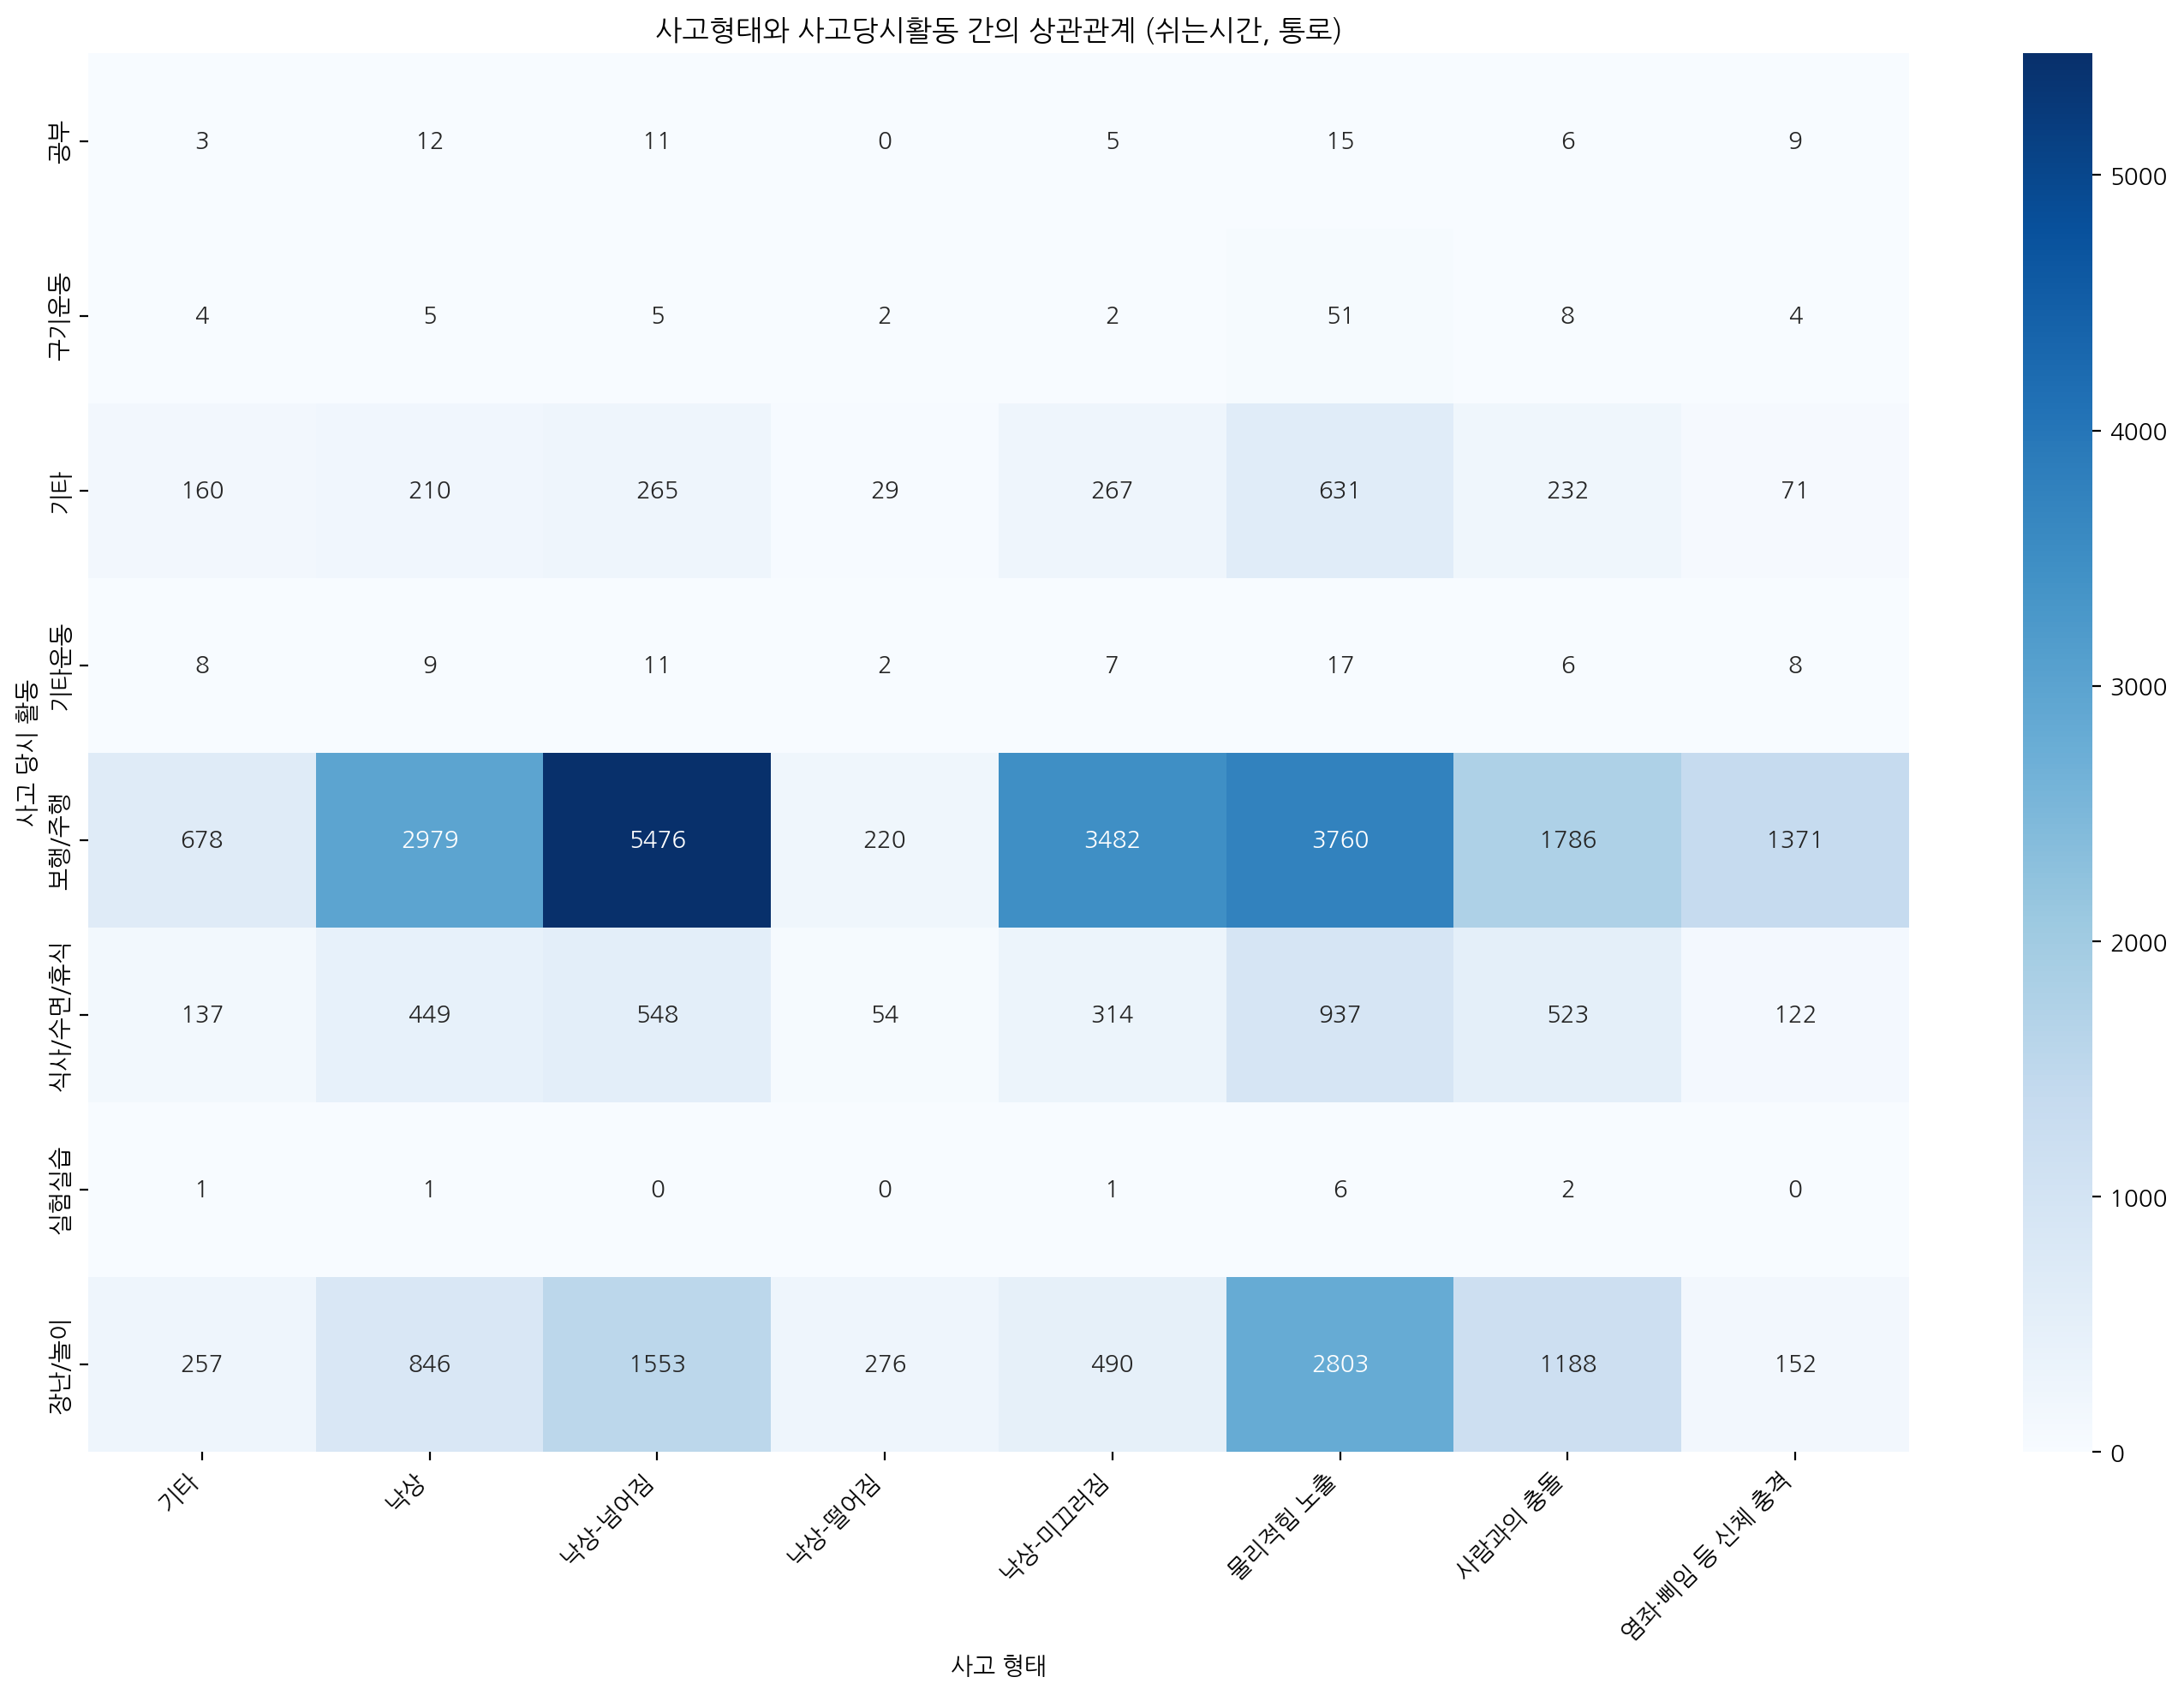

In [31]:
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('사고형태와 사고당시활동 간의 상관관계 (쉬는시간, 통로)')
plt.xlabel('사고 형태')
plt.ylabel('사고 당시 활동')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [32]:
# Display the filtered data
print(filtered_data[['사고매개물', '매개물', '사고형태', '사고당시활동']].head())

              사고매개물  매개물     사고형태 사고당시활동
1   건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐  보행/주행
30   자연(사람/동물/식물 등)  NaN   낙상-떨어짐  장난/놀이
57  건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐  보행/주행
68  건물(문/창문/바닥/벽 등)  NaN  물리적힘 노출  장난/놀이
71  건물(문/창문/바닥/벽 등)  NaN  물리적힘 노출  보행/주행


사고매개물
가구(책상/의자/책장/탁자/침대 등)                572
건물(문/창문/바닥/벽 등)                   10851
기계 도구류(기계선반, 재봉틀기계 등)                36
기타                                 4151
날카로운 물건(칼/가위/송곳 등)                  162
열(불/뜨거운 물 등)                         33
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)      168
운송용구(차/자전거/선박/항공기 등)                 14
자연(사람/동물/식물 등)                     4939
Name: count, dtype: int64


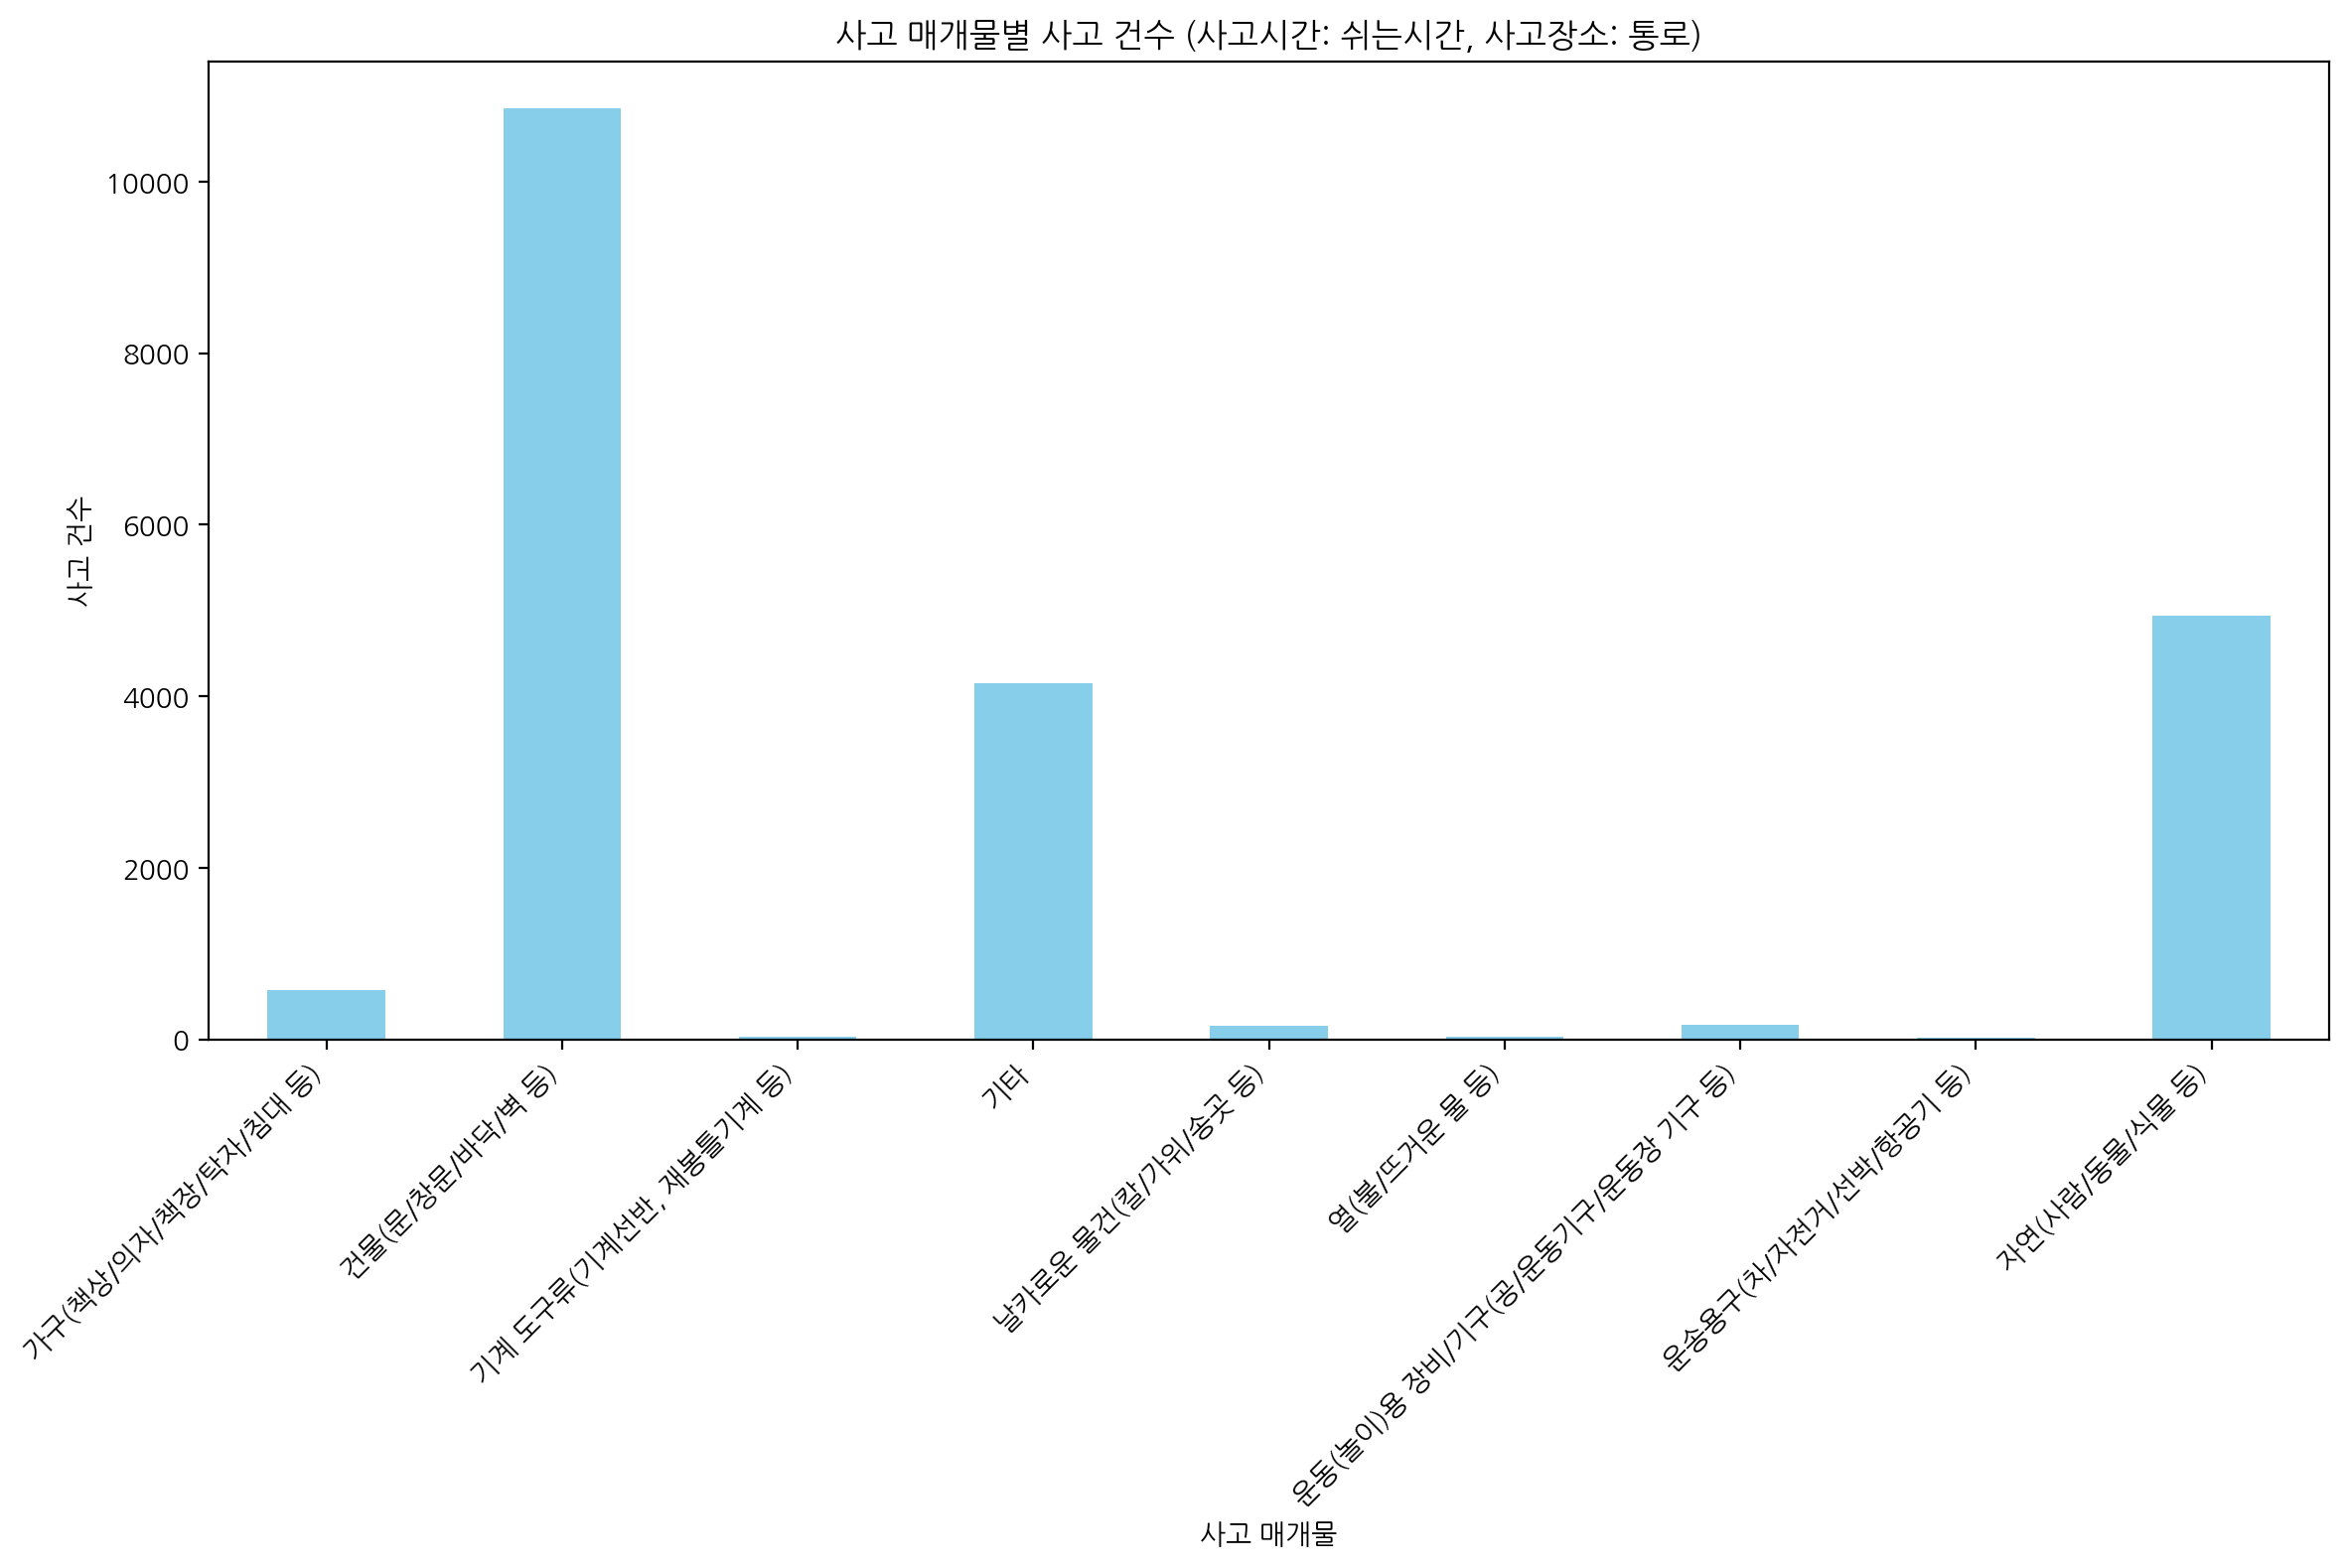

In [33]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Count the number of accidents by the identified 매개물 column
medium_counts = filtered_data[medium_column].value_counts().sort_index()

# Display the medium counts
print(medium_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
medium_counts.plot(kind='bar', color='skyblue')
plt.title('사고 매개물별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로)')
plt.xlabel('사고 매개물')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고당시활동                          공부  구기운동   기타  기타운동  보행/주행  식사/수면/휴식  실험실습  \
사고매개물                                                                        
가구(책상/의자/책장/탁자/침대 등)             1     3   64     0    216        76     2   
건물(문/창문/바닥/벽 등)                 13    17  388    17   7423       829     2   
기계 도구류(기계선반, 재봉틀기계 등)            0     0    7     0     18         6     0   
기타                               1     4  427    10   2687       305     2   
날카로운 물건(칼/가위/송곳 등)               0     0   23     0     66        21     0   
열(불/뜨거운 물 등)                     0     0    2     0     15        13     0   
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)   0    27   10     6     41        14     0   
운송용구(차/자전거/선박/항공기 등)             0     0    3     0      6         1     0   
자연(사람/동물/식물 등)                   6     6  172     7   2643       437     1   

사고당시활동                          장난/놀이  
사고매개물                                  
가구(책상/의자/책장/탁자/침대 등)              210  
건물(문/창문/바닥/벽 등)      

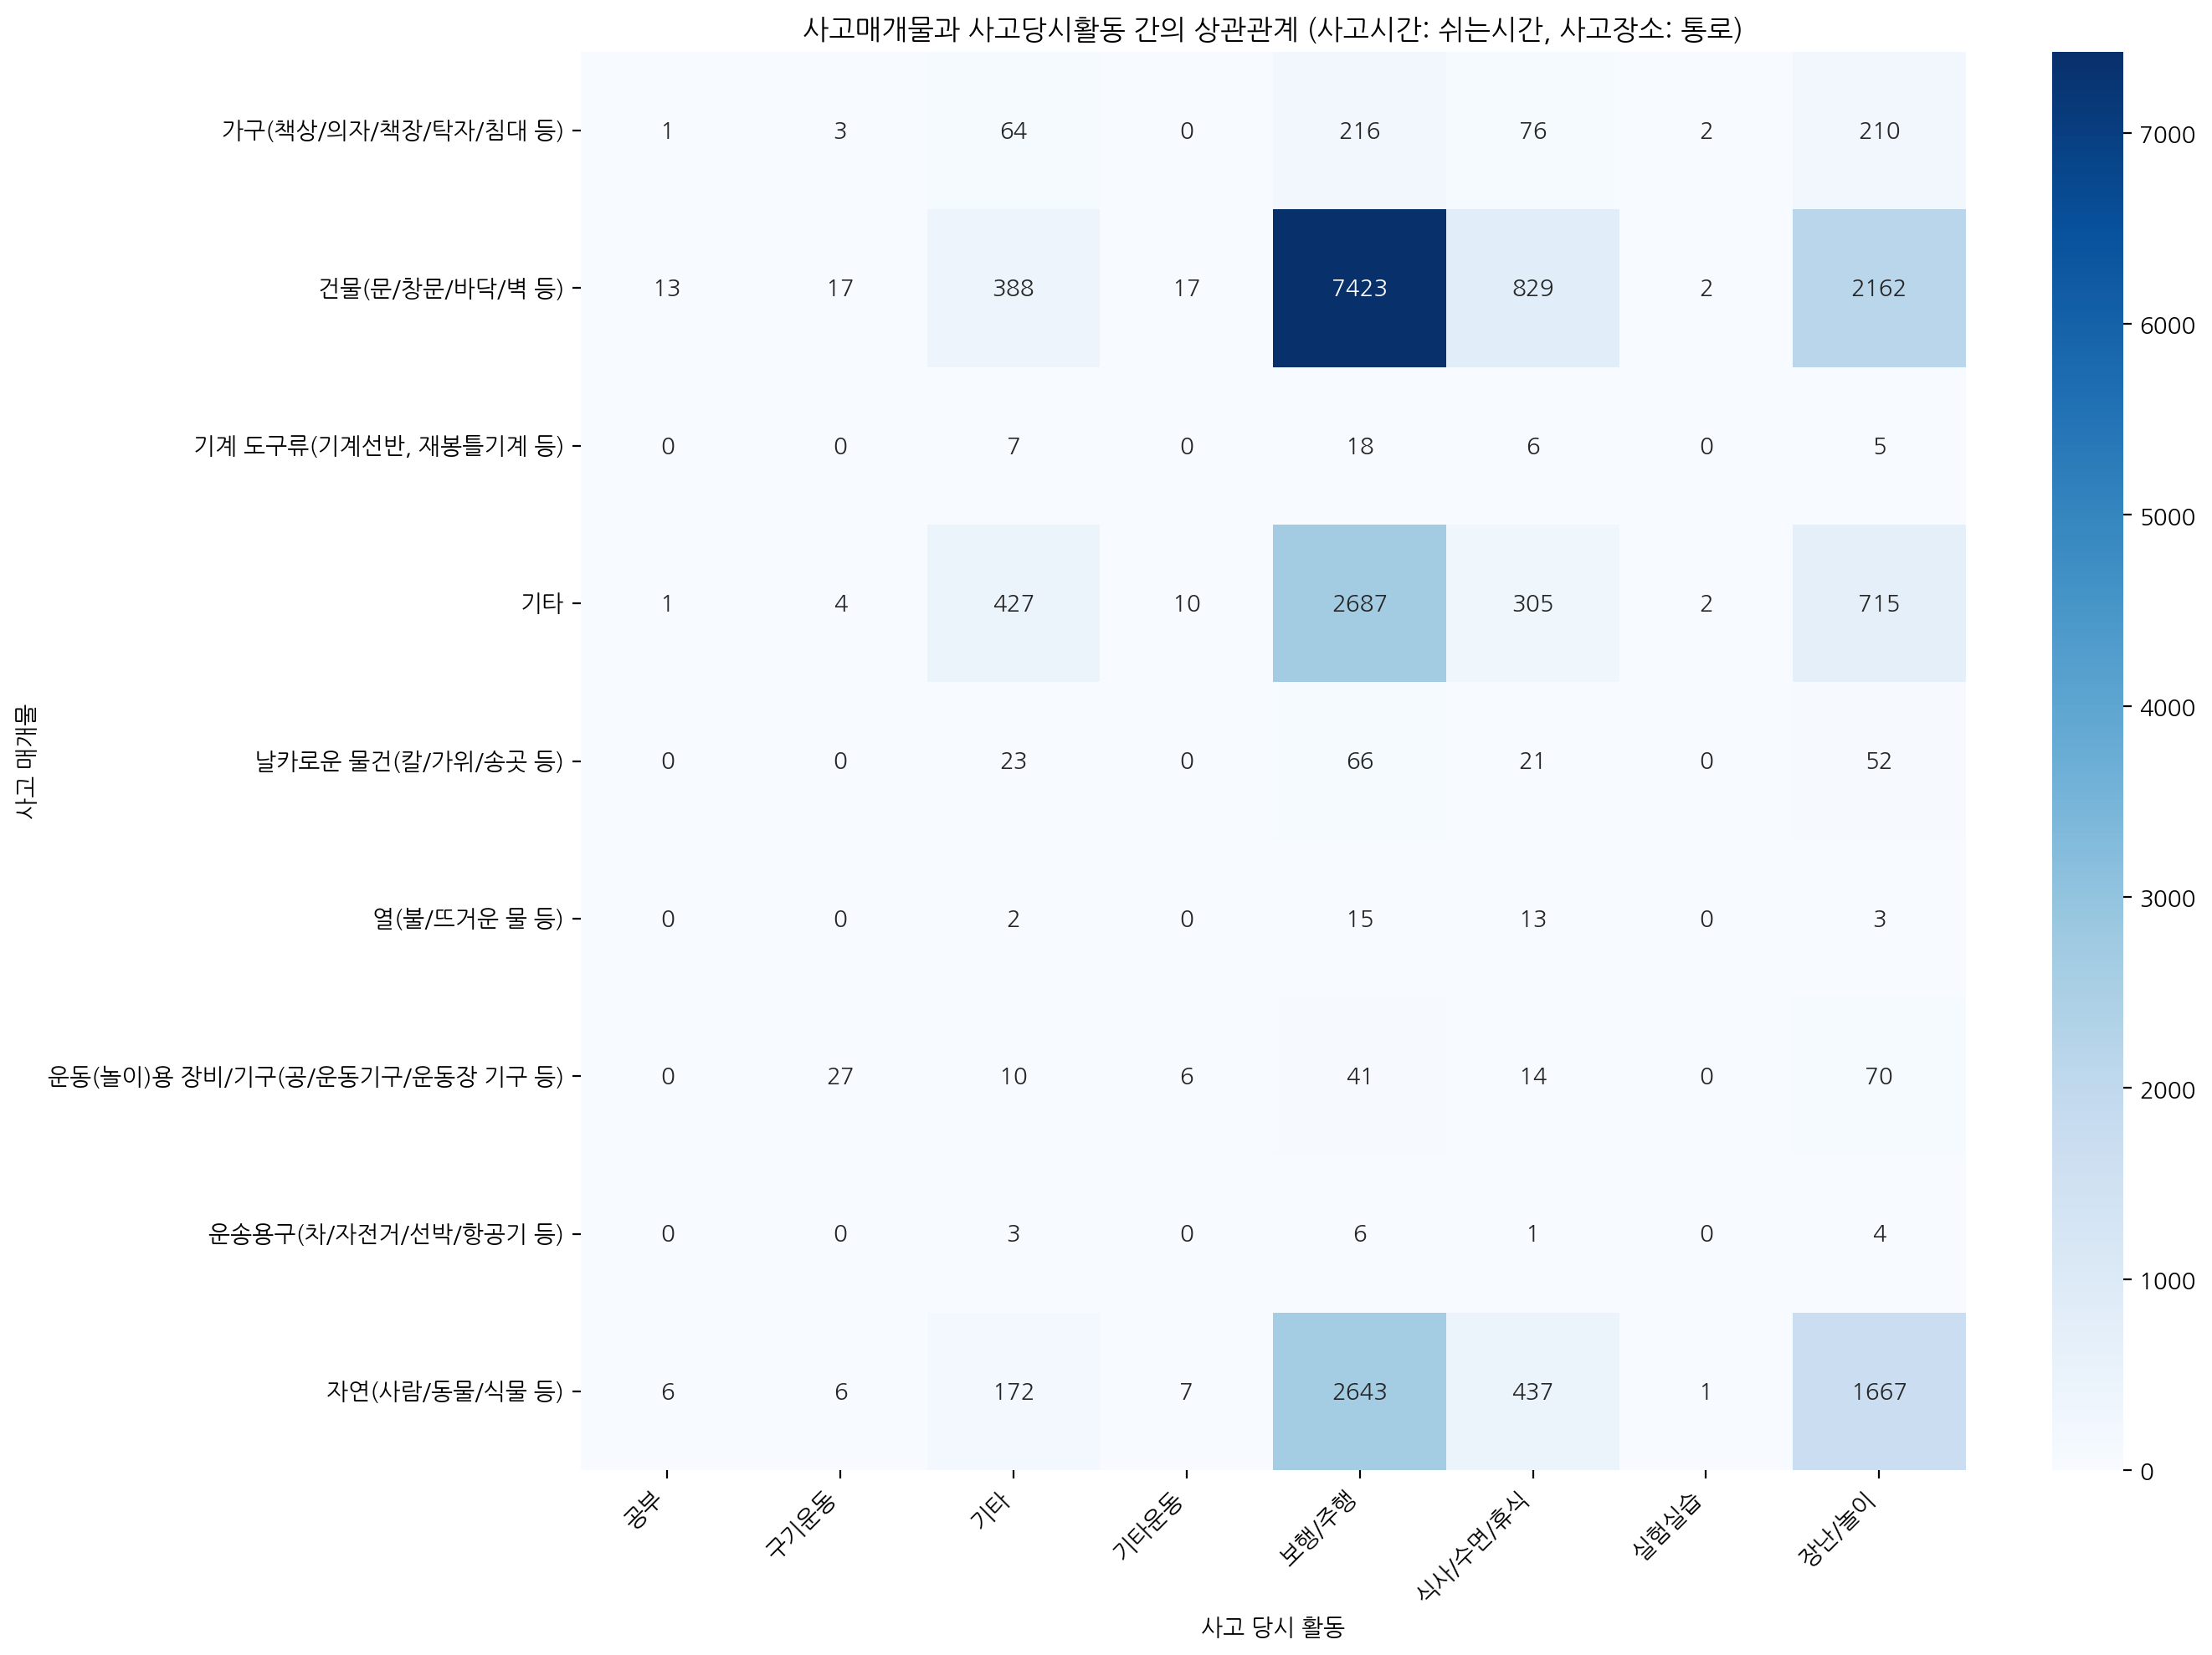

In [34]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Create a contingency table
contingency_table = pd.crosstab(filtered_data[medium_column], filtered_data['사고당시활동'])

# Display the contingency table
print(contingency_table)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('사고매개물과 사고당시활동 간의 상관관계 (사고시간: 쉬는시간, 사고장소: 통로)')
plt.xlabel('사고 당시 활동')
plt.ylabel('사고 매개물')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고형태                             기타  낙상-넘어짐  낙상-떨어짐  낙상-미끄러짐  물리적힘 노출  사람과의 충돌
사고매개물                                                                         
가구(책상/의자/책장/탁자/침대 등)              5     111      17       36      383       20
건물(문/창문/바닥/벽 등)                 259    4965     346     2517     2548      216
기계 도구류(기계선반, 재봉틀기계 등)             1       3       1        4       25        2
기타                              458    1409      75     1197      828      184
날카로운 물건(칼/가위/송곳 등)                3       5       0        4      148        2
열(불/뜨거운 물 등)                     24       1       0        6        0        2
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)    7      21       7       12      112        9
운송용구(차/자전거/선박/항공기 등)              0       2       2        0       10        0
자연(사람/동물/식물 등)                  164    1352     135      792     1002     1494


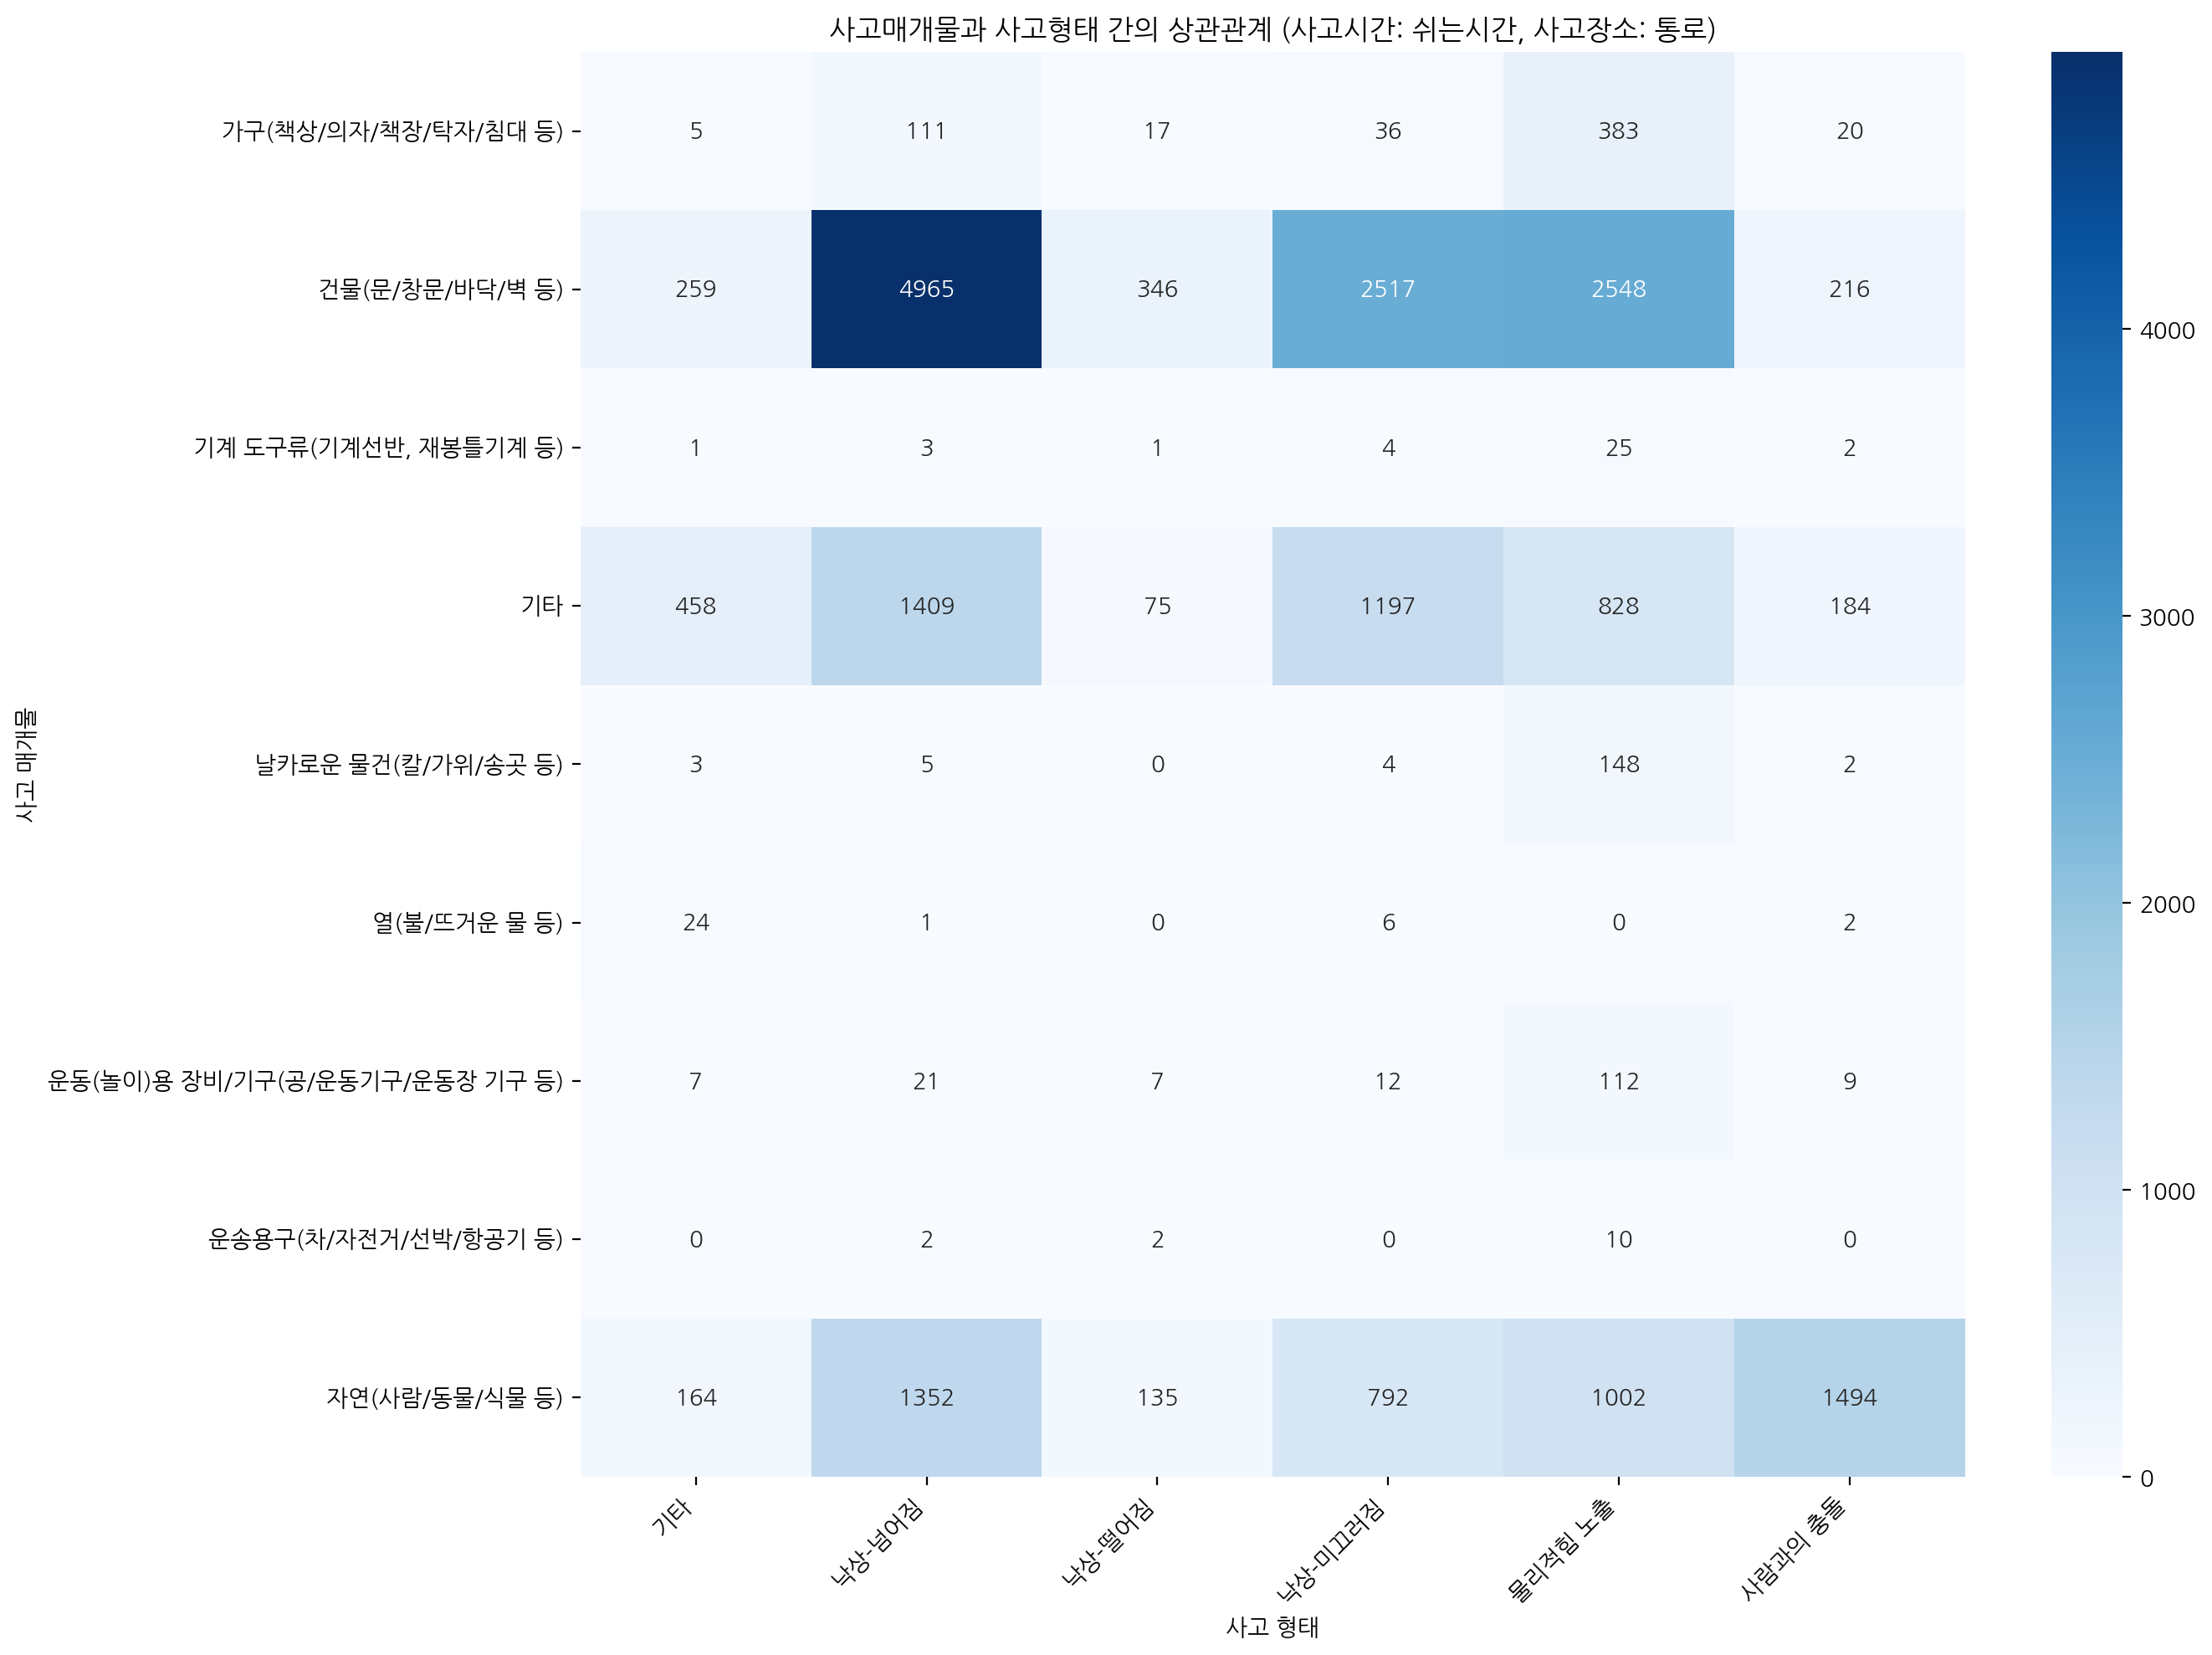

In [35]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Create a contingency table
contingency_table = pd.crosstab(filtered_data[medium_column], filtered_data['사고형태'])

# Display the contingency table
print(contingency_table)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('사고매개물과 사고형태 간의 상관관계 (사고시간: 쉬는시간, 사고장소: 통로)')
plt.xlabel('사고 형태')
plt.ylabel('사고 매개물')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
# Filter data based on '사고시간', '사고장소', and '사고당시활동'
filtered_data = data_combined[
    (data_combined['사고시간'].str.contains('쉬는시간|휴식시간 및 청소시간', na=False)) &
    (data_combined['사고장소'] == '통로') &
    (data_combined['사고당시활동'] == '보행/주행')
]

# Display the filtered data
print(filtered_data[['사고매개물', '매개물', '사고형태']].head())

               사고매개물  매개물     사고형태
1    건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐
57   건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐
71   건물(문/창문/바닥/벽 등)  NaN  물리적힘 노출
83                기타  NaN  낙상-미끄러짐
124  건물(문/창문/바닥/벽 등)  NaN   낙상-떨어짐


In [37]:
# Display the filtered data
print(filtered_data[['사고형태']].head())

        사고형태
1    낙상-미끄러짐
57   낙상-미끄러짐
71   물리적힘 노출
83   낙상-미끄러짐
124   낙상-떨어짐


사고형태
기타                678
낙상               2979
낙상-넘어짐           5476
낙상-떨어짐            220
낙상-미끄러짐          3482
물리적힘 노출          3760
사람과의 충돌          1786
염좌·삐임 등 신체 충격    1371
Name: count, dtype: int64


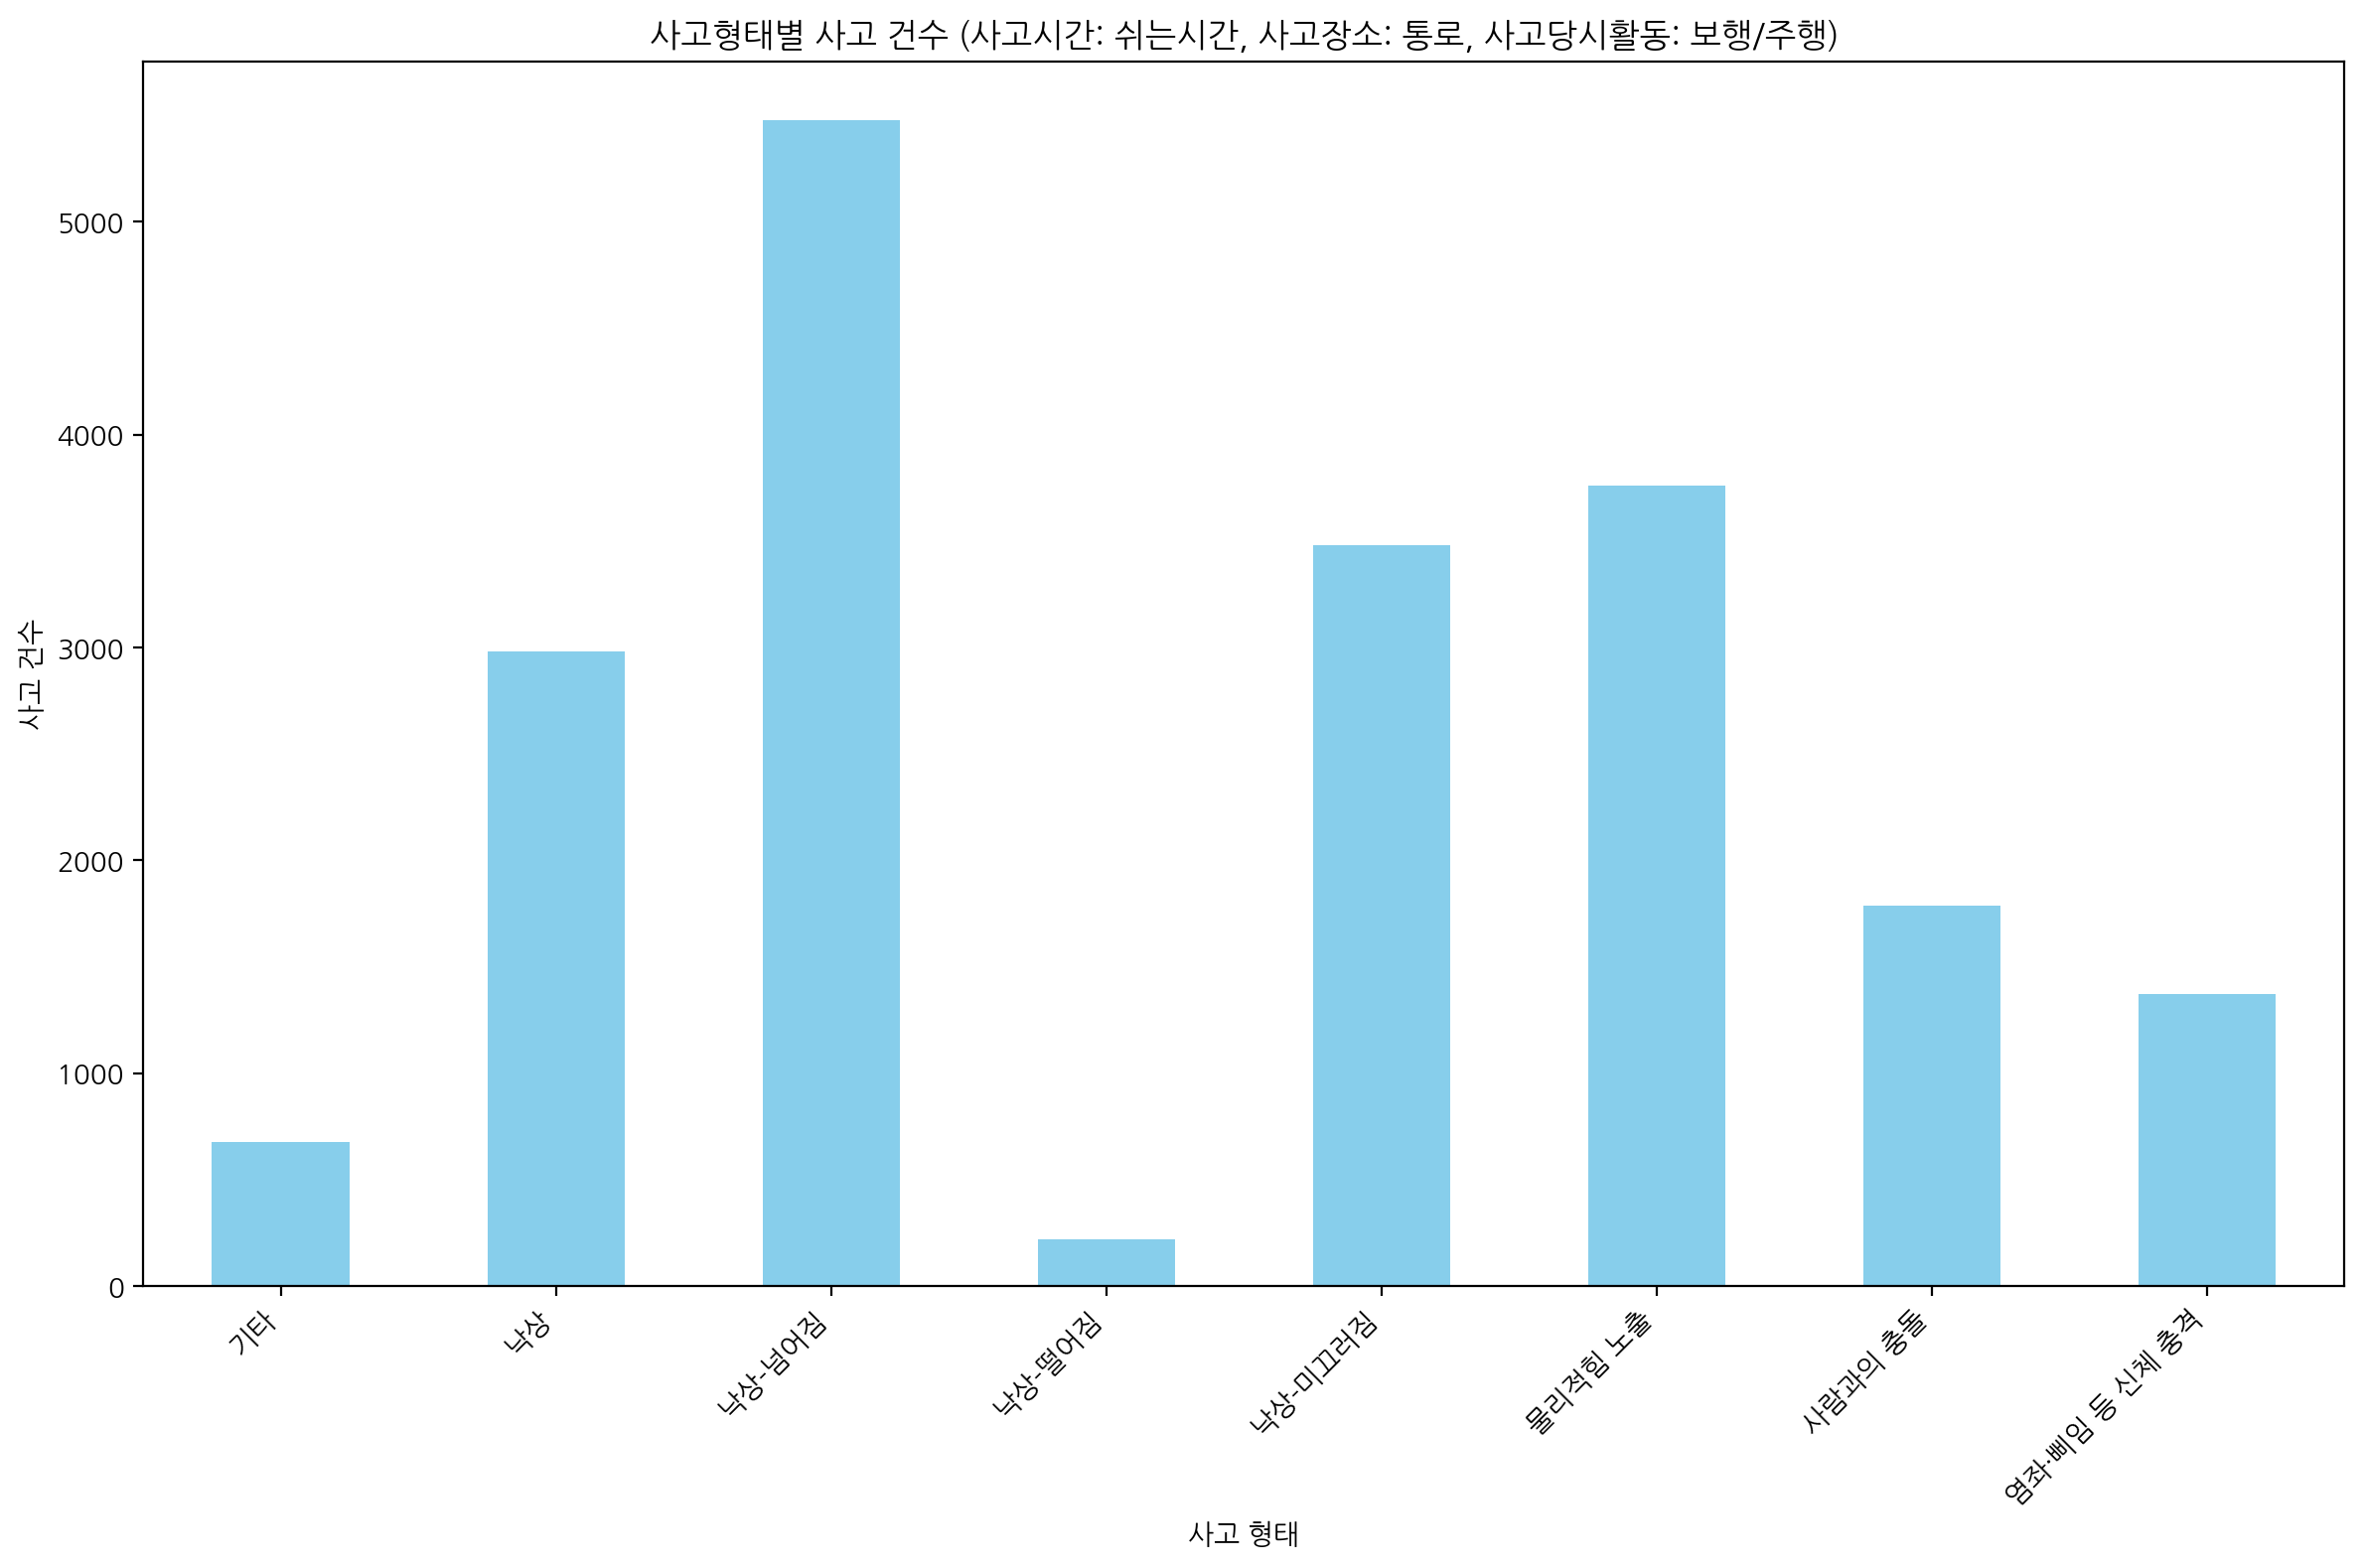

In [38]:
# Count the number of accidents by '사고형태'
accident_type_counts = filtered_data['사고형태'].value_counts().sort_index()

# Display the accident type counts
print(accident_type_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
accident_type_counts.plot(kind='bar', color='skyblue')
plt.title('사고형태별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행)')
plt.xlabel('사고 형태')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
# Filter data based on '사고시간', '사고장소', and '사고당시활동'
filtered_data = data_combined[
    (data_combined['사고시간'].str.contains('쉬는시간|휴식시간 및 청소시간', na=False)) &
    (data_combined['사고장소'] == '통로') &
    (data_combined['사고당시활동'] == '보행/주행') &
    (data_combined['사고형태'].str.contains('낙상|낙상-넘어짐|낙상-떨어짐|낙상-미끄러짐', na=False))
]

# Display the filtered data
print(filtered_data[['사고형태']].head())

        사고형태
1    낙상-미끄러짐
57   낙상-미끄러짐
83   낙상-미끄러짐
124   낙상-떨어짐
128  낙상-미끄러짐


사고형태
낙상         2979
낙상-넘어짐     5476
낙상-떨어짐      220
낙상-미끄러짐    3482
Name: count, dtype: int64


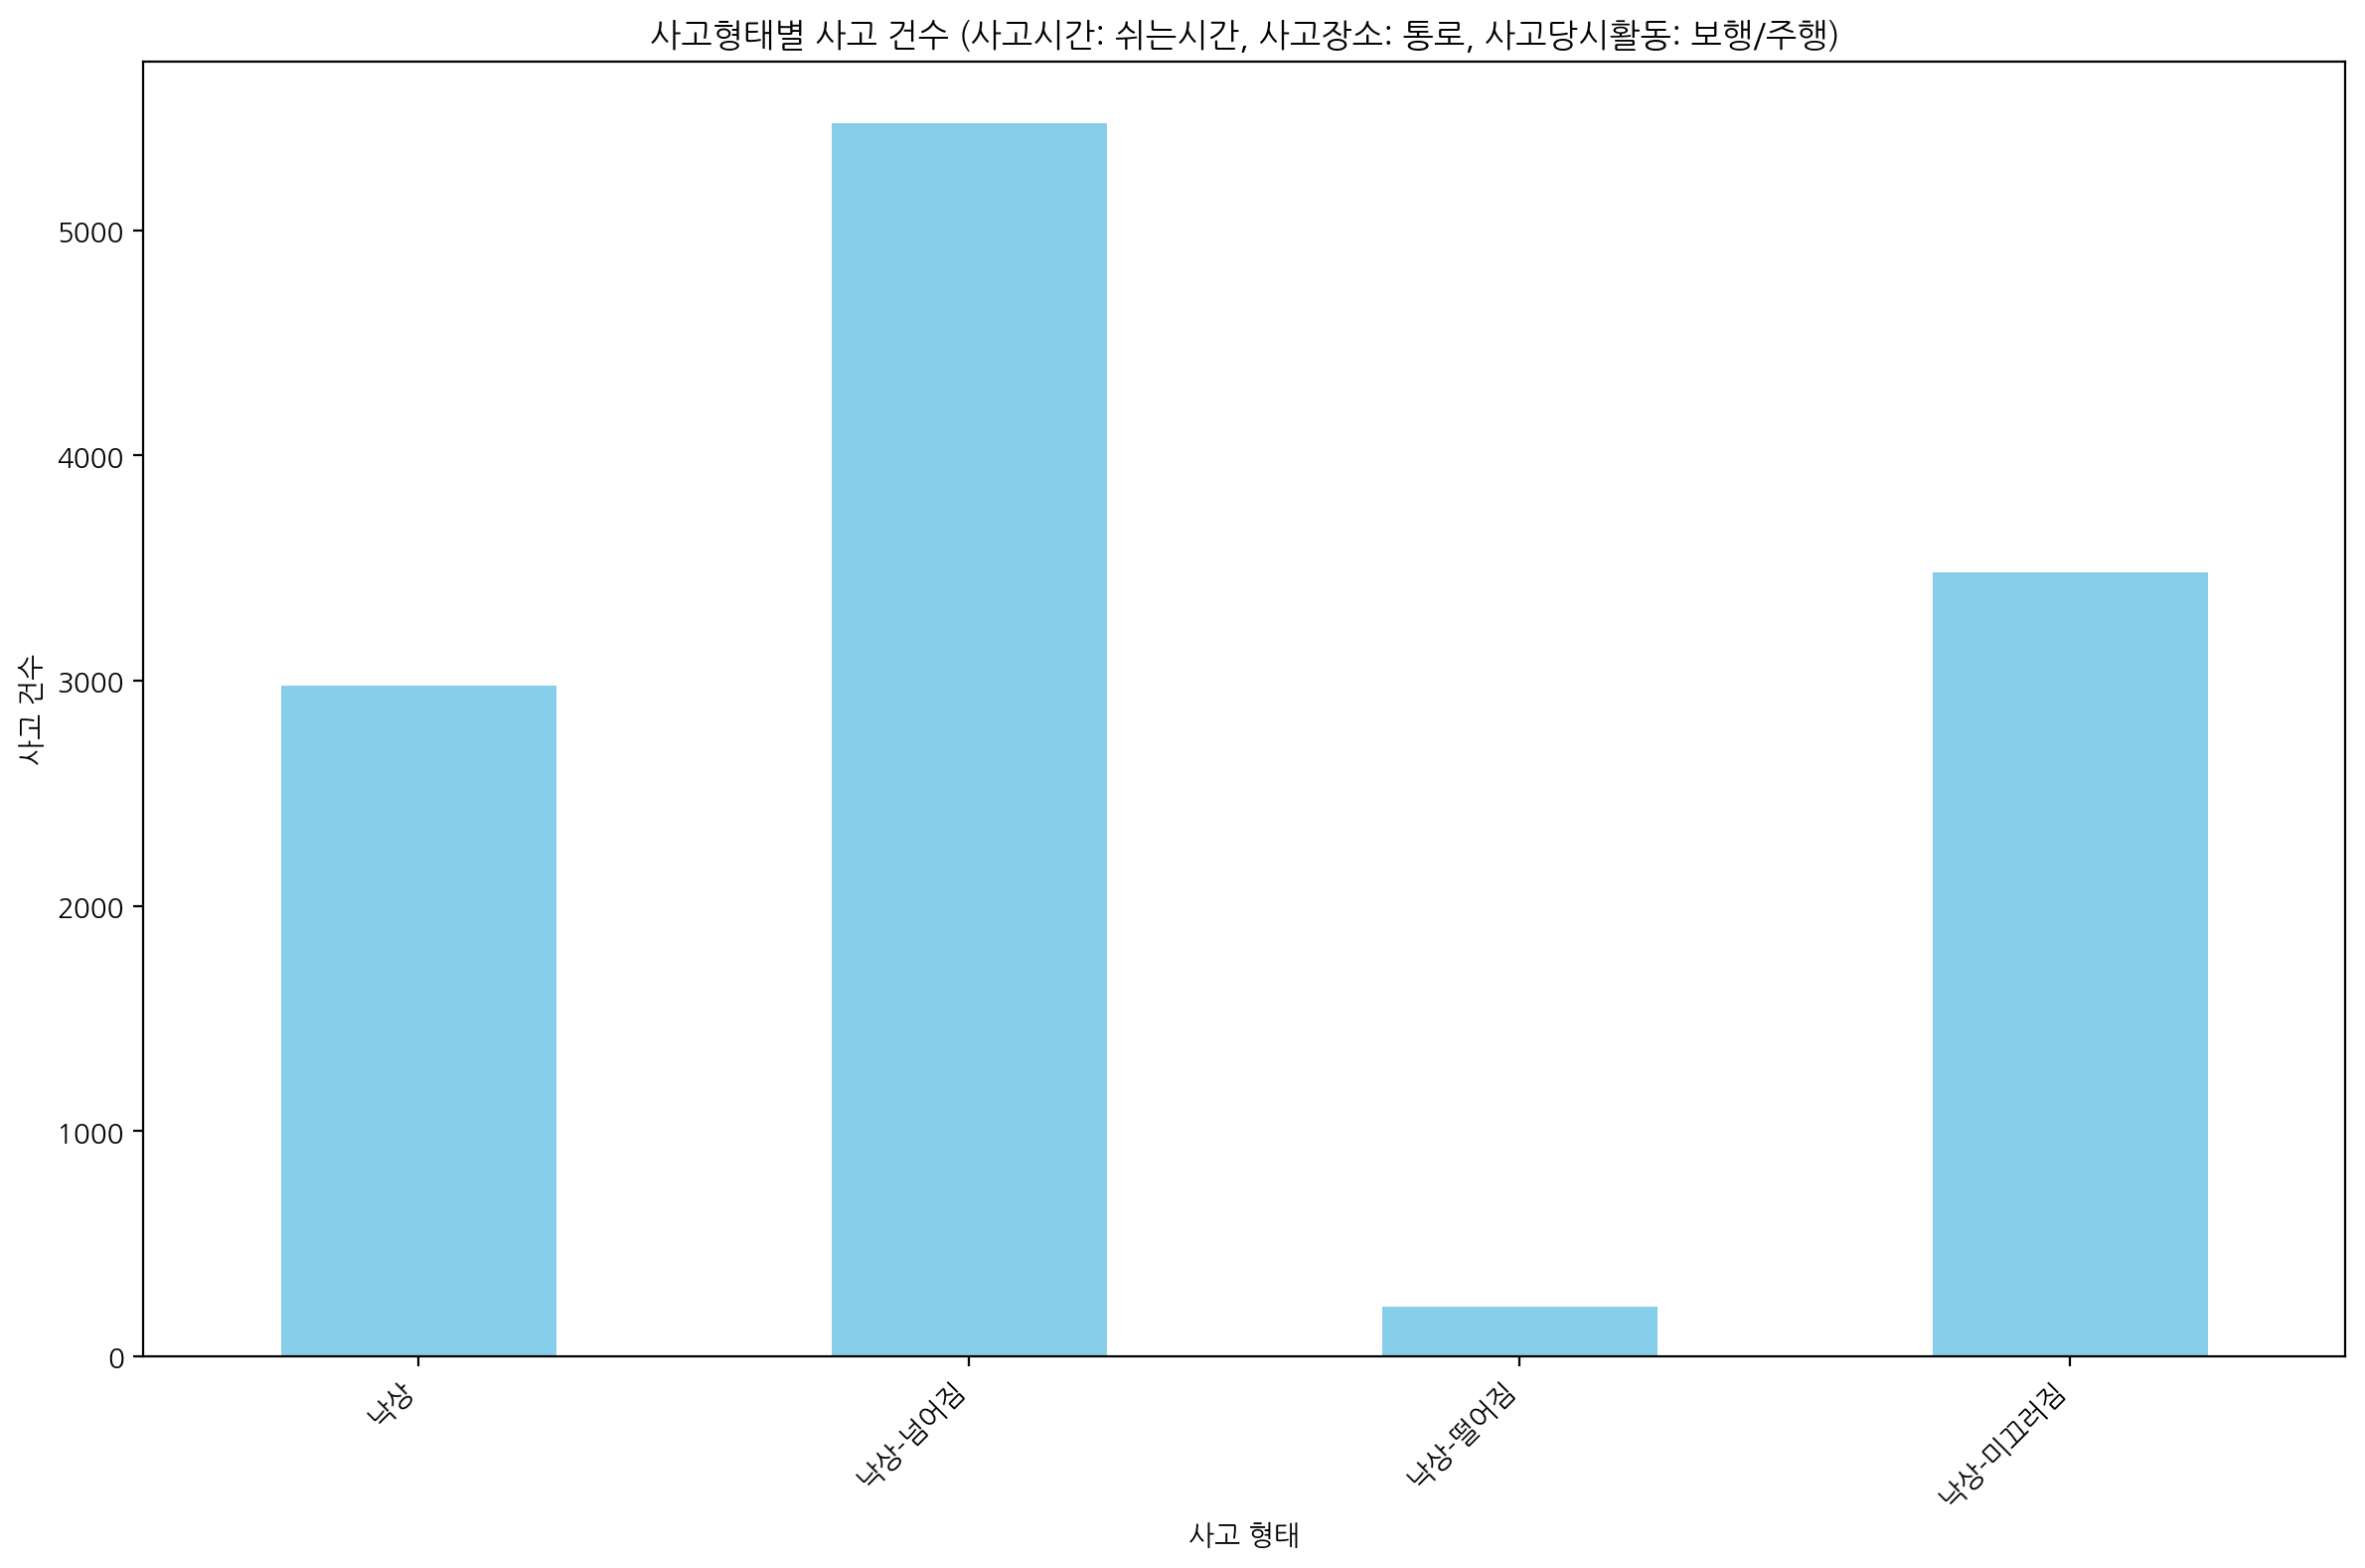

In [40]:
# Count the number of accidents by '사고형태'
accident_type_counts = filtered_data['사고형태'].value_counts().sort_index()

# Display the accident type counts
print(accident_type_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
accident_type_counts.plot(kind='bar', color='skyblue')
plt.title('사고형태별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행)')
plt.xlabel('사고 형태')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [41]:
# Display the filtered data
print(filtered_data[['사고매개물', '매개물', '사고형태']].head())

               사고매개물  매개물     사고형태
1    건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐
57   건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐
83                기타  NaN  낙상-미끄러짐
124  건물(문/창문/바닥/벽 등)  NaN   낙상-떨어짐
128  건물(문/창문/바닥/벽 등)  NaN  낙상-미끄러짐


사고매개물
가구(책상/의자/책장/탁자/침대 등)                70
건물(문/창문/바닥/벽 등)                   5791
기계 도구류(기계선반, 재봉틀기계 등)                5
기타                                1965
날카로운 물건(칼/가위/송곳 등)                   8
열(불/뜨거운 물 등)                         6
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)      10
운송용구(차/자전거/선박/항공기 등)                 1
자연(사람/동물/식물 등)                    1322
Name: count, dtype: int64


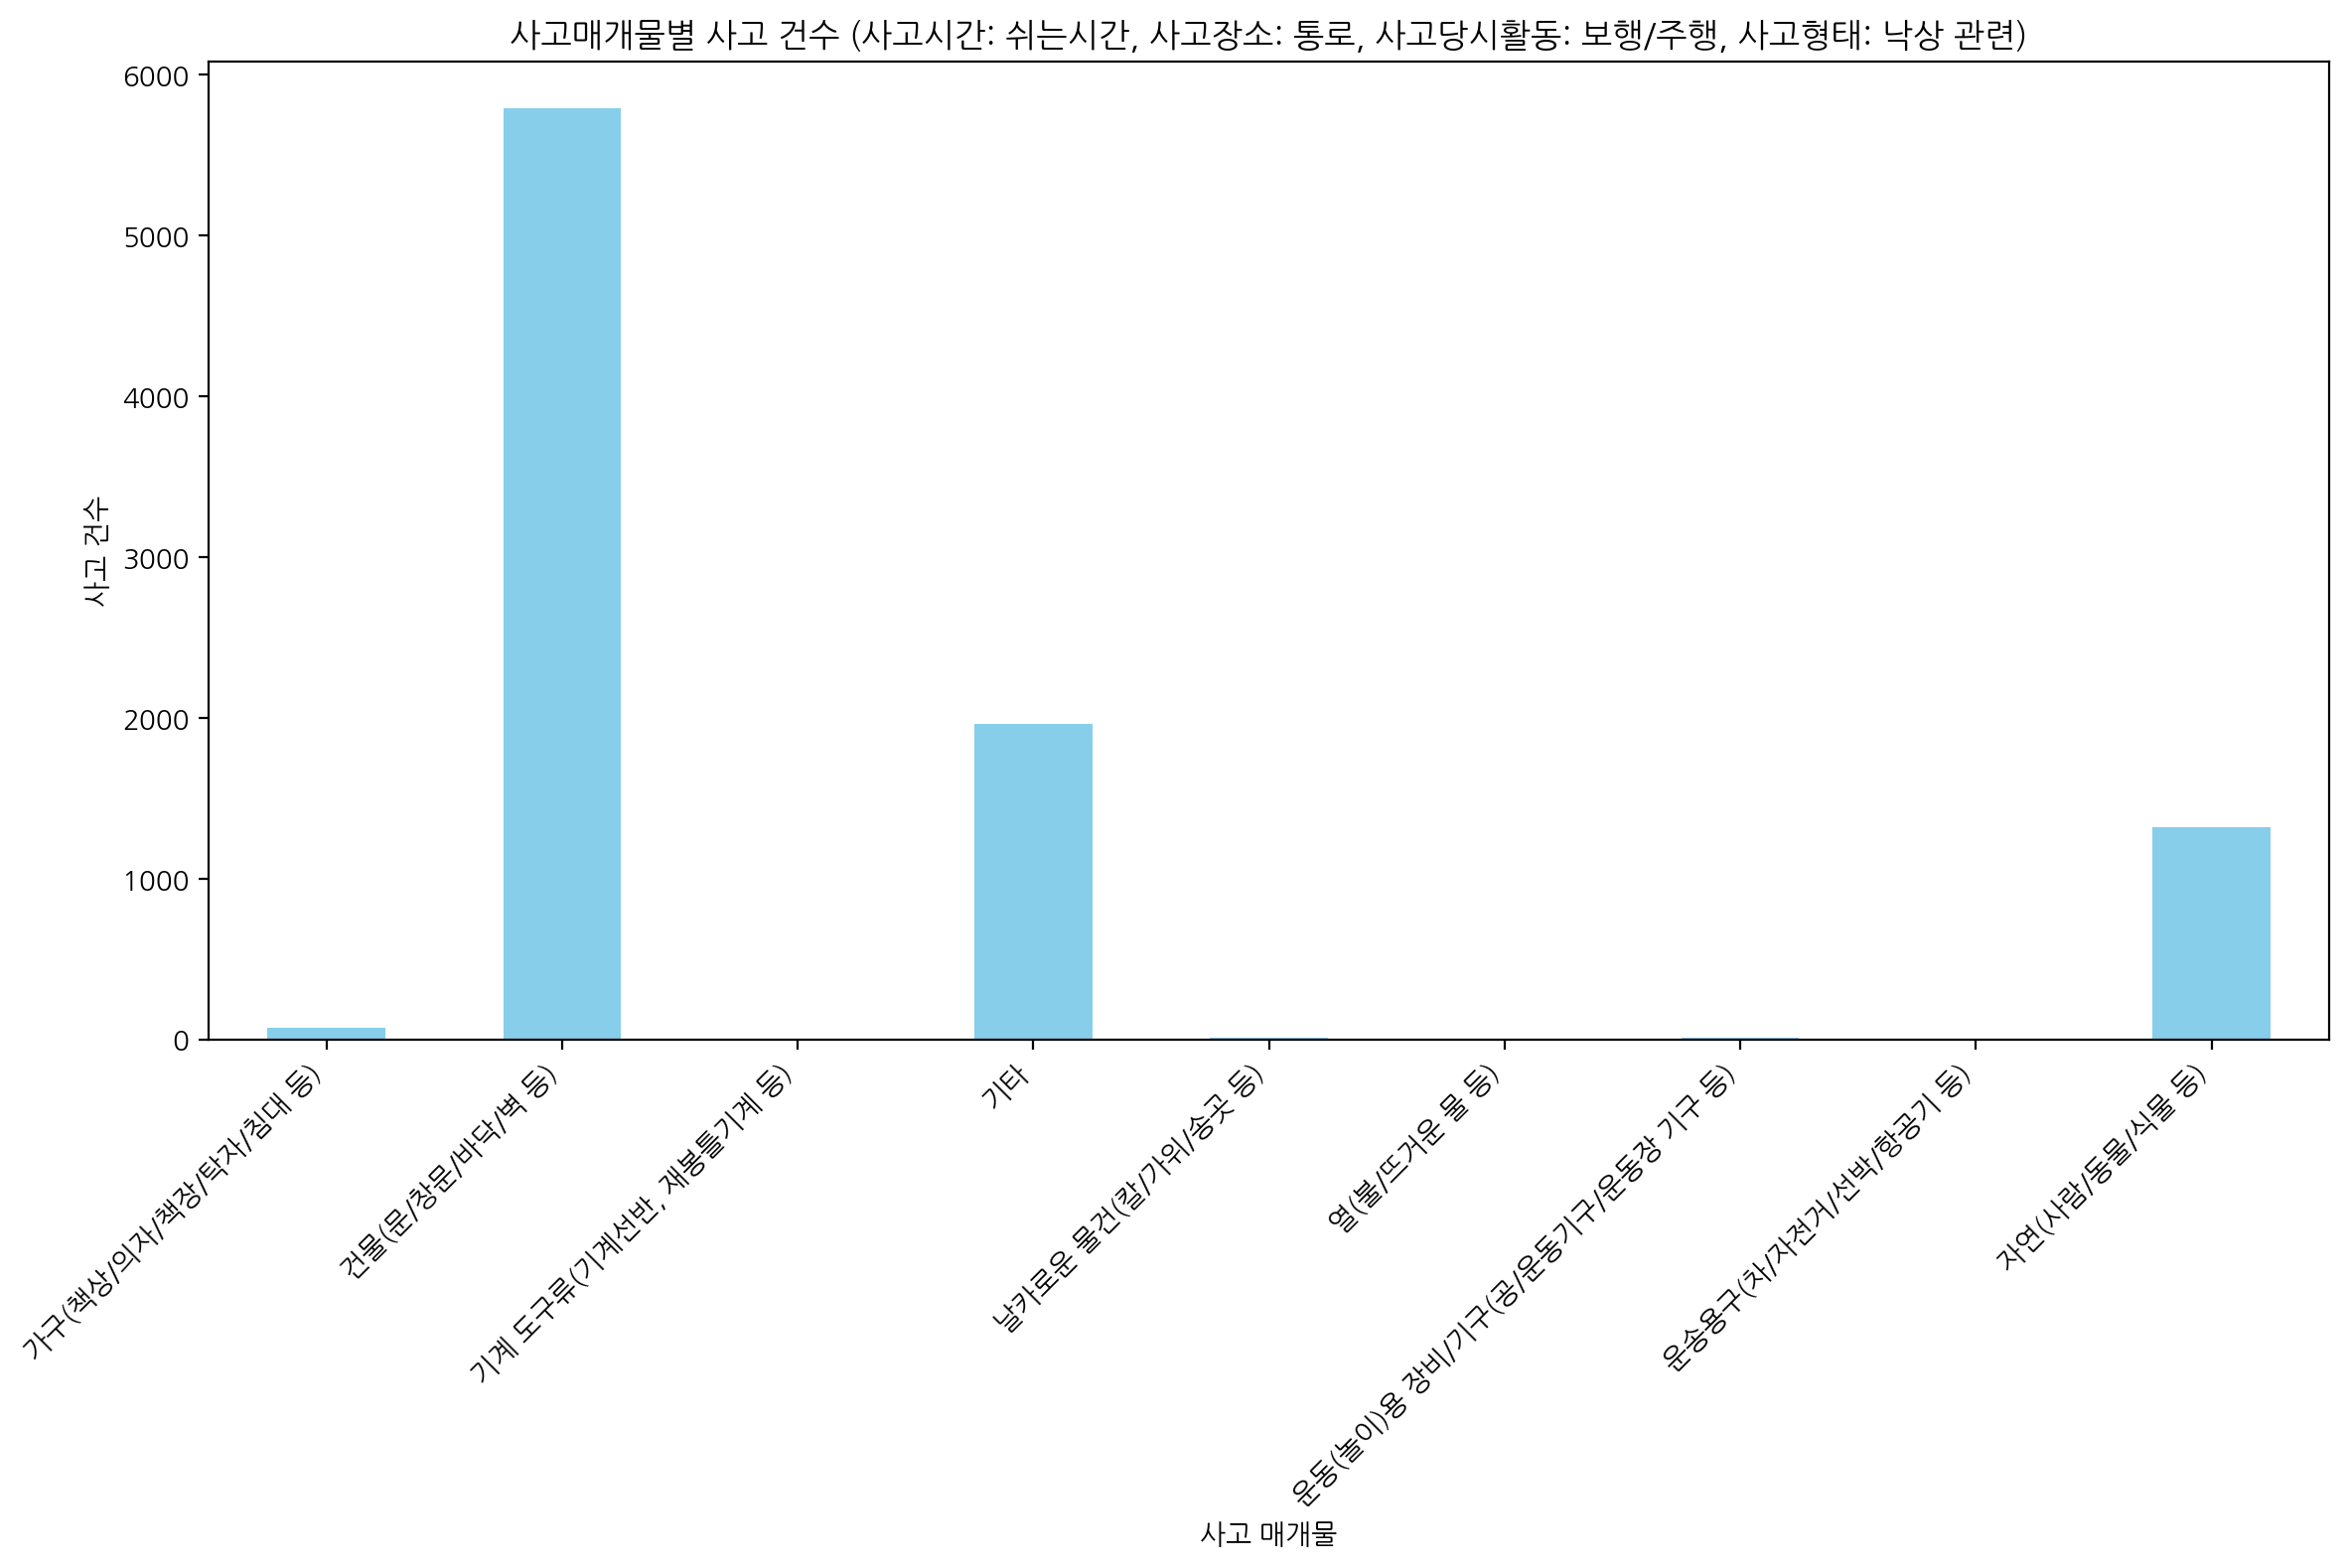

In [42]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Count the number of accidents by the identified 매개물 column
medium_counts = filtered_data[medium_column].value_counts().sort_index()

# Display the medium counts
print(medium_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
medium_counts.plot(kind='bar', color='skyblue')
plt.title('사고매개물별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('사고 매개물')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [43]:
# Display the filtered data
print(filtered_data[['학교급']].head())

      학교급
1    초등학교
57   고등학교
83   초등학교
124  초등학교
128   중학교


학교급
고등학교    2605
기타학교      43
유치원       55
중학교     4789
초등학교    4631
특수학교      34
Name: count, dtype: int64


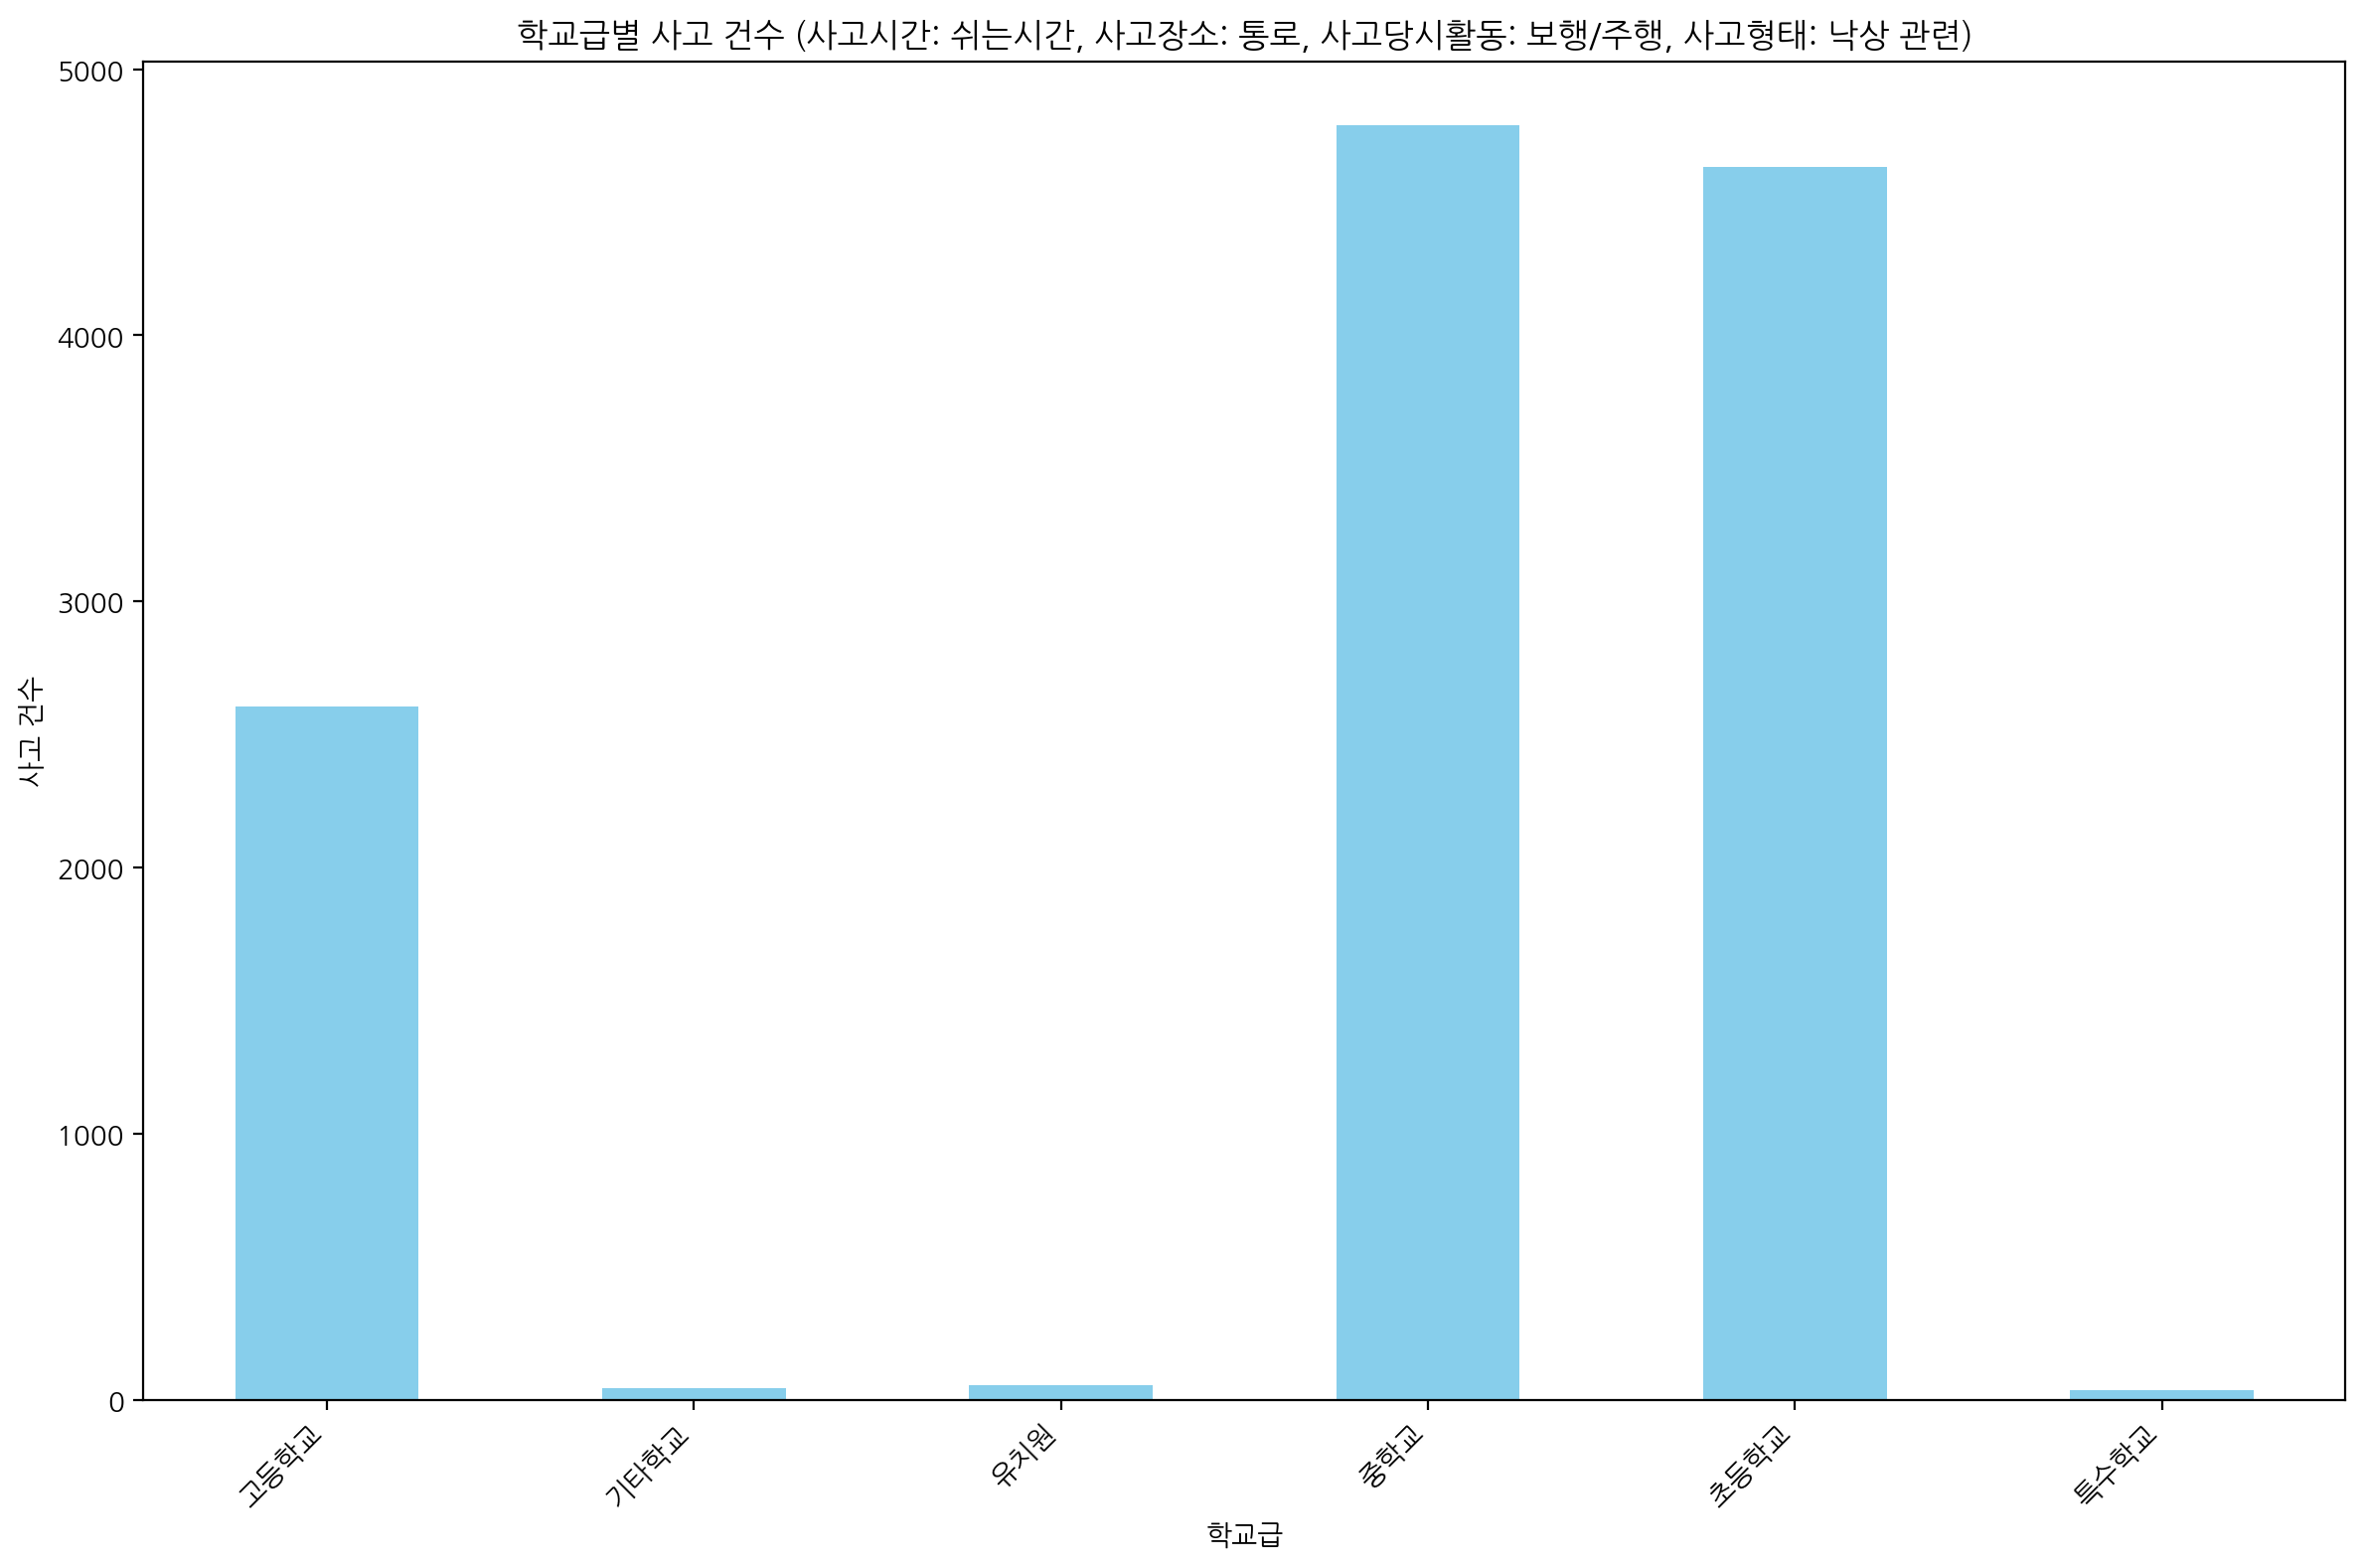

In [44]:
# Count the number of accidents by '학교급'
school_level_counts = filtered_data['학교급'].value_counts().sort_index()

# Display the school level counts
print(school_level_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
school_level_counts.plot(kind='bar', color='skyblue')
plt.title('학교급별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('학교급')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [45]:
# Filter data based on '사고시간', '사고장소', and '사고당시활동'
filtered_data = data_combined[
    (data_combined['사고시간'].str.contains('쉬는시간|휴식시간 및 청소시간', na=False)) &
    (data_combined['사고장소'] == '통로') &
    (data_combined['사고당시활동'] == '보행/주행') &
    (data_combined['사고형태'].str.contains('낙상|낙상-넘어짐|낙상-떨어짐|낙상-미끄러짐', na=False)) &
    (data_combined['학교급'] == '초등학교')
]

# Display the filtered data
print(filtered_data[['학교급', '사고형태', '사고매개물', '사고당시활동']].head())

      학교급     사고형태            사고매개물 사고당시활동
1    초등학교  낙상-미끄러짐  건물(문/창문/바닥/벽 등)  보행/주행
83   초등학교  낙상-미끄러짐               기타  보행/주행
124  초등학교   낙상-떨어짐  건물(문/창문/바닥/벽 등)  보행/주행
135  초등학교   낙상-떨어짐  건물(문/창문/바닥/벽 등)  보행/주행
339  초등학교  낙상-미끄러짐  건물(문/창문/바닥/벽 등)  보행/주행


In [46]:
# Display the filtered data
print(filtered_data[['학교급', '사고자학년', '사고형태', '사고매개물', '사고당시활동']].head())

      학교급 사고자학년     사고형태            사고매개물 사고당시활동
1    초등학교   2학년  낙상-미끄러짐  건물(문/창문/바닥/벽 등)  보행/주행
83   초등학교   4학년  낙상-미끄러짐               기타  보행/주행
124  초등학교   3학년   낙상-떨어짐  건물(문/창문/바닥/벽 등)  보행/주행
135  초등학교   6학년   낙상-떨어짐  건물(문/창문/바닥/벽 등)  보행/주행
339  초등학교   6학년  낙상-미끄러짐  건물(문/창문/바닥/벽 등)  보행/주행


사고자학년
1학년     493
2학년     523
3학년     718
4학년     711
5학년     976
6학년    1206
Name: count, dtype: int64


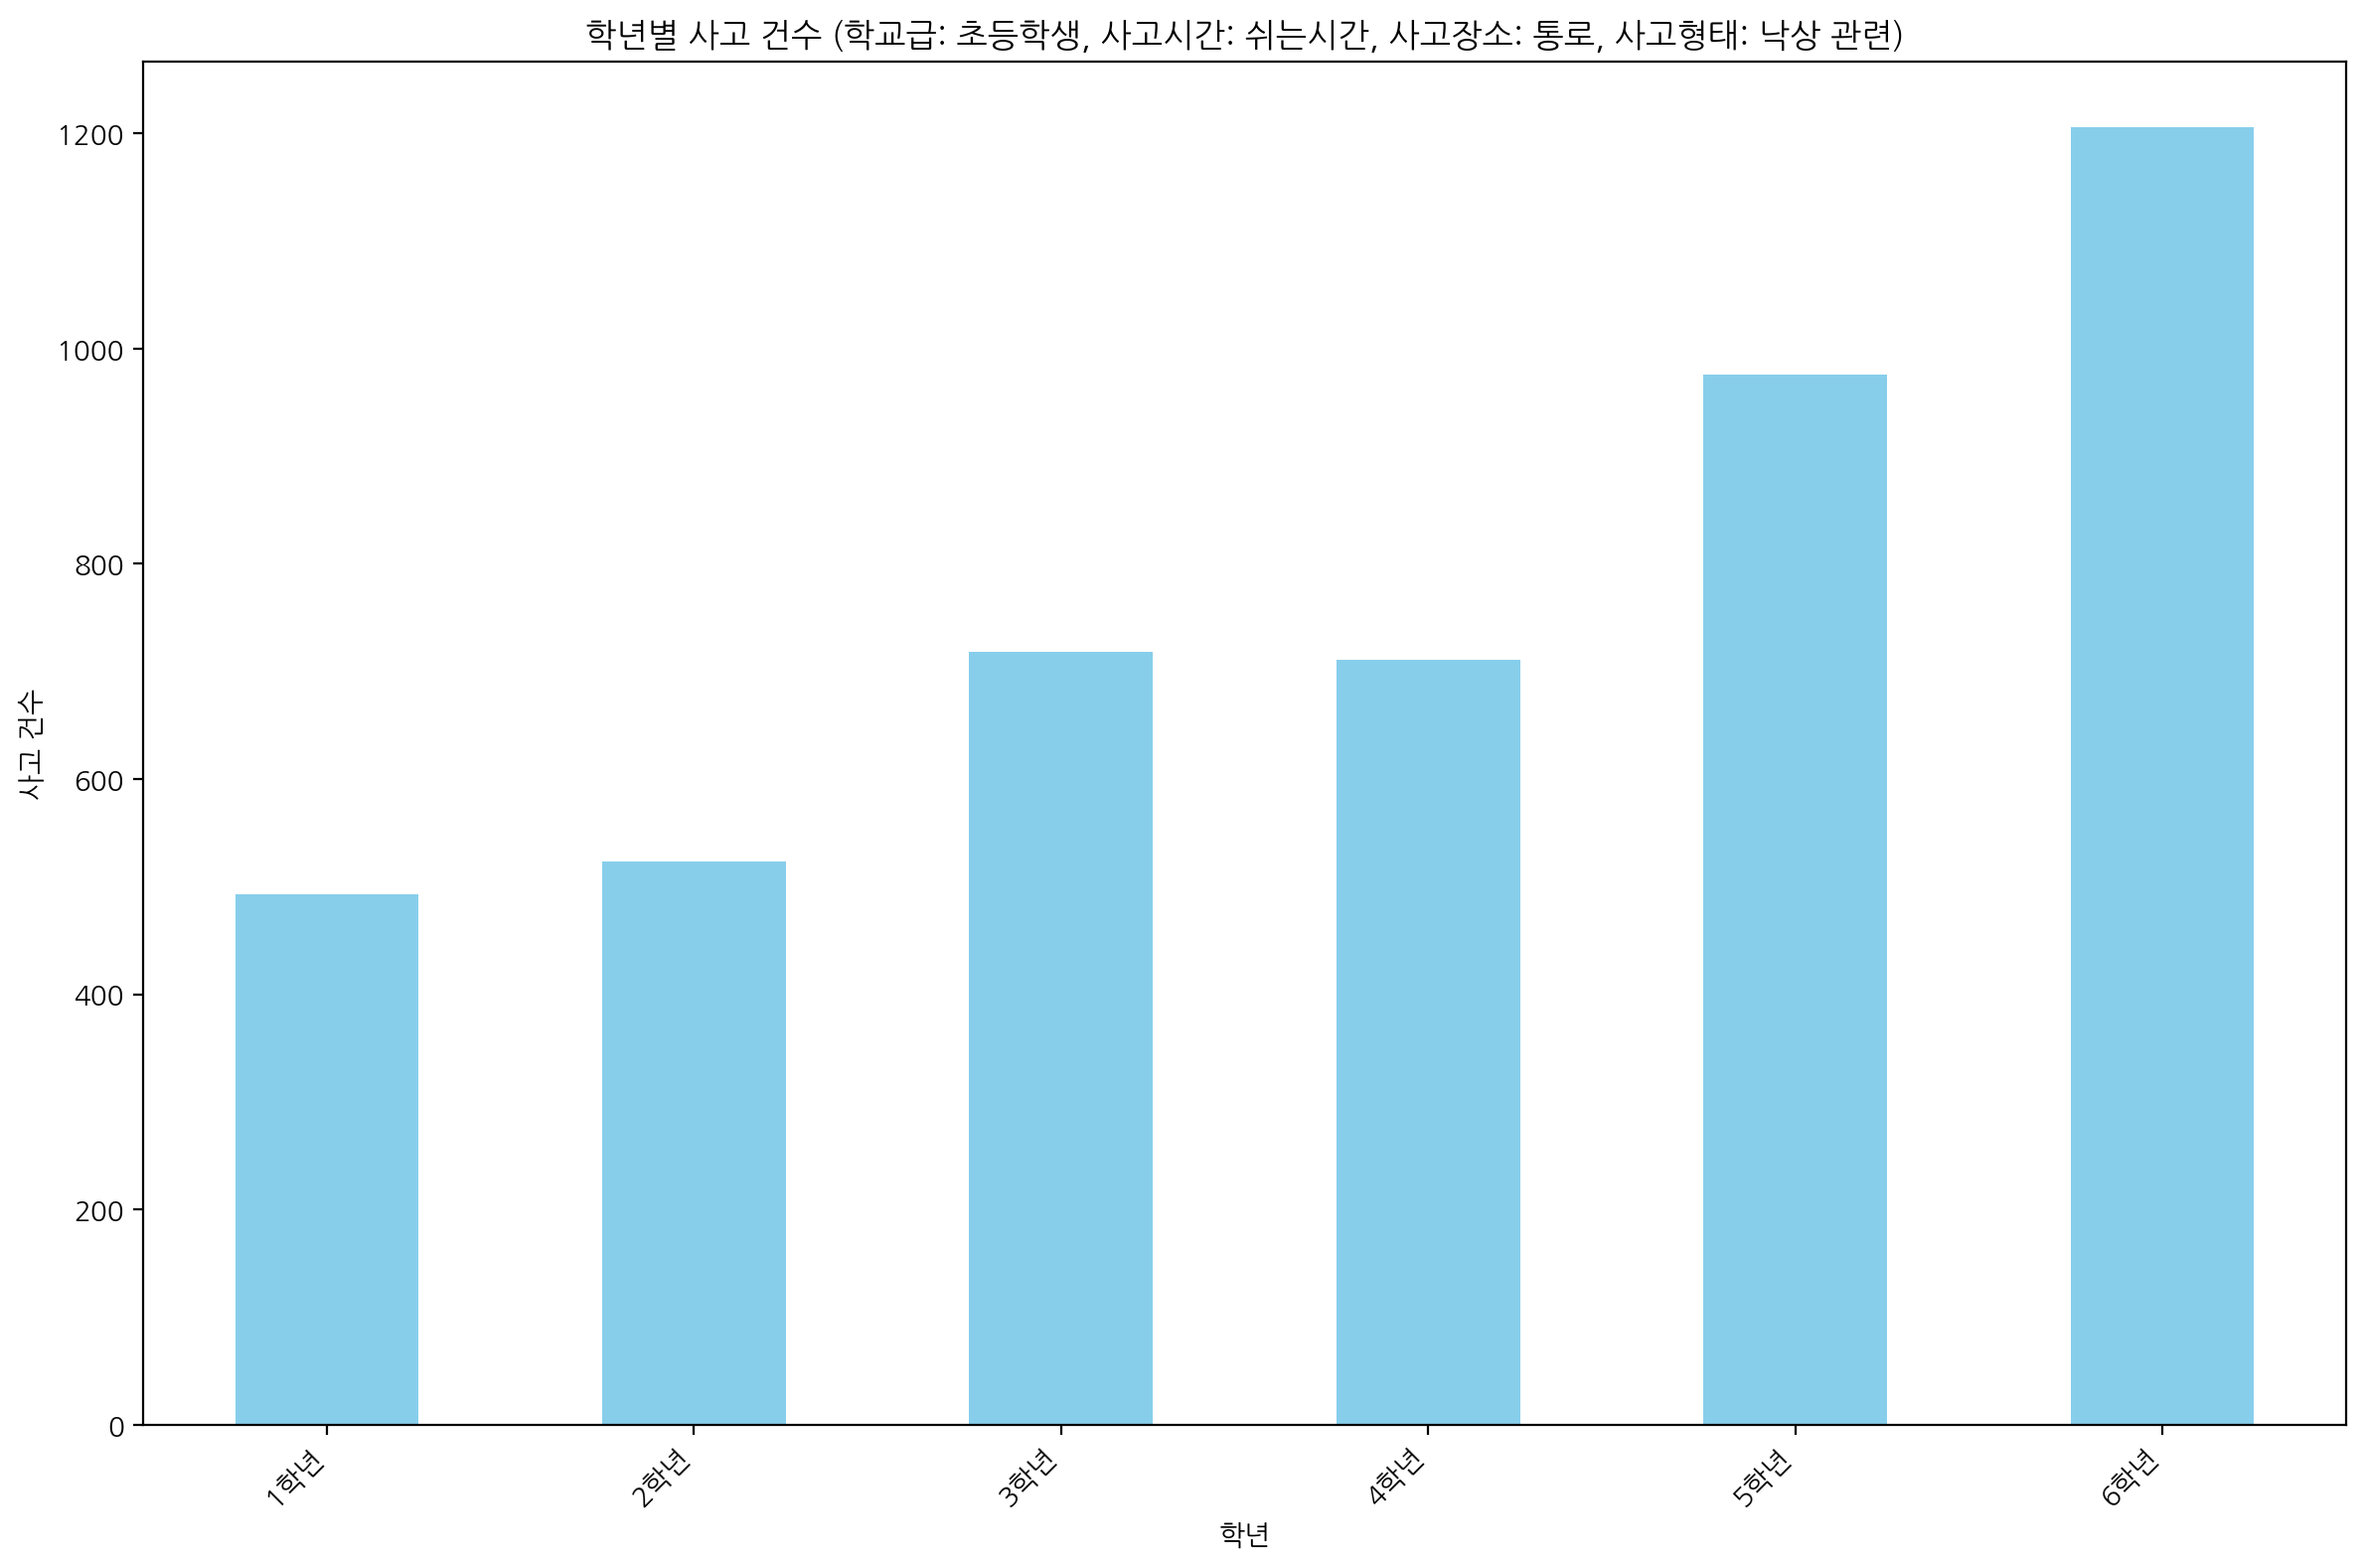

In [47]:
# Count the number of accidents by '학년'
grade_counts = filtered_data['사고자학년'].value_counts().sort_index()

# Display the grade counts
print(grade_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('학년별 사고 건수 (학교급: 초등학생, 사고시간: 쉬는시간, 사고장소: 통로, 사고형태: 낙상 관련)')
plt.xlabel('학년')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고자성별    남    여
사고자학년          
1학년    282  211
2학년    324  199
3학년    468  250
4학년    454  257
5학년    610  366
6학년    772  434


<Figure size 1200x800 with 0 Axes>

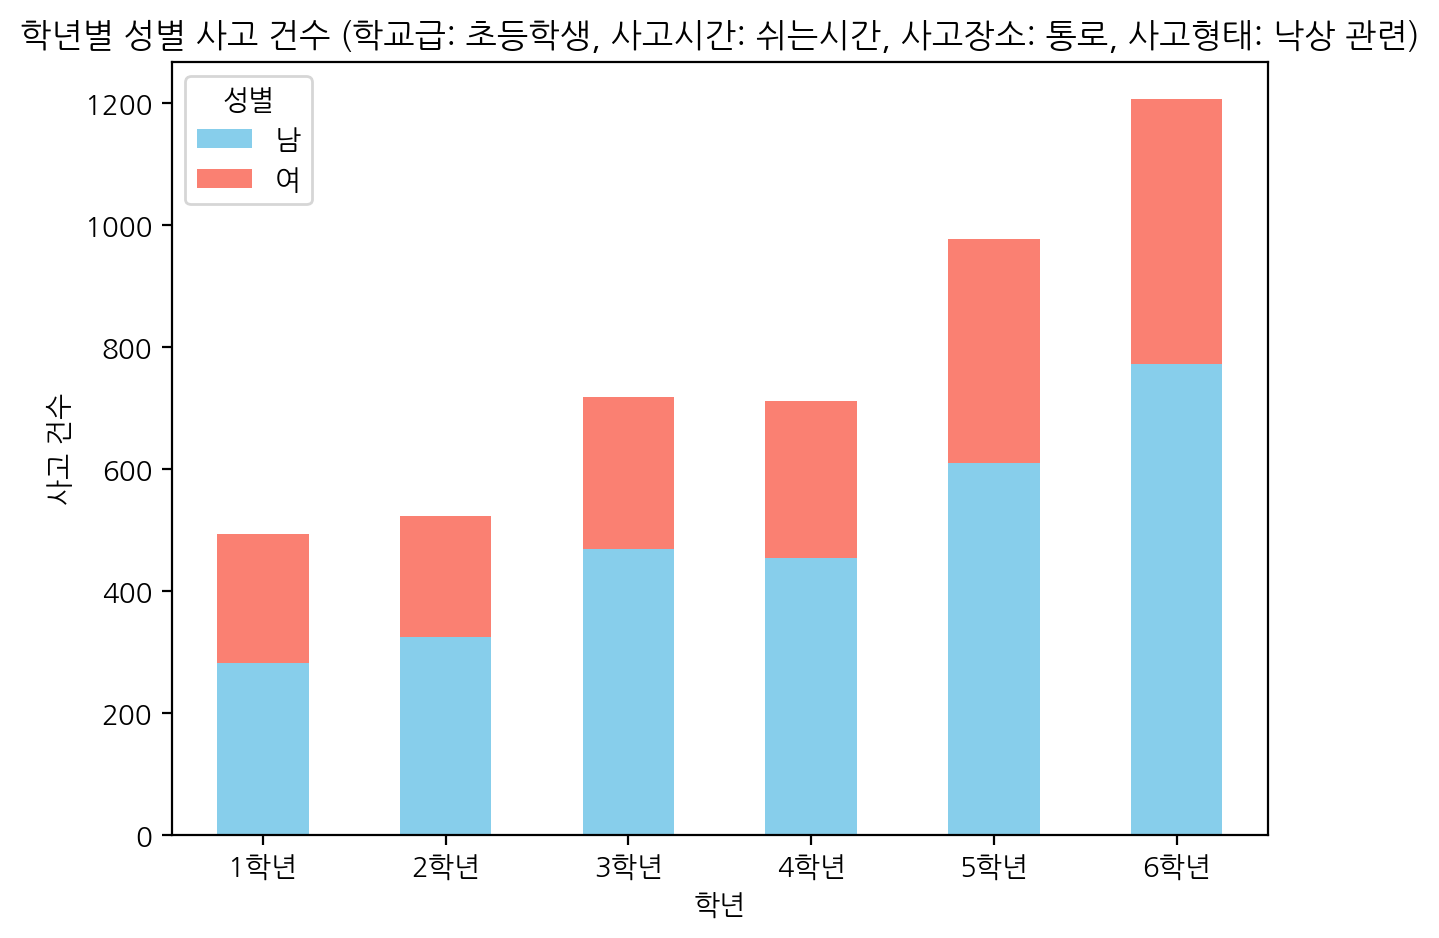

In [48]:
# Count the number of accidents by '학년' and '성별'
grade_gender_counts = filtered_data.groupby(['사고자학년', '사고자성별']).size().unstack().fillna(0)

# Display the grade and gender counts
print(grade_gender_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
grade_gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('학년별 성별 사고 건수 (학교급: 초등학생, 사고시간: 쉬는시간, 사고장소: 통로, 사고형태: 낙상 관련)')
plt.xlabel('학년')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.legend(title='성별')
plt.tight_layout()

# Display the plot
plt.show()

사고부위
기타          43
다리         550
머리(두부)     479
발         1932
복합부위       528
손          428
치아(구강)     370
팔          264
흉복부         37
Name: count, dtype: int64


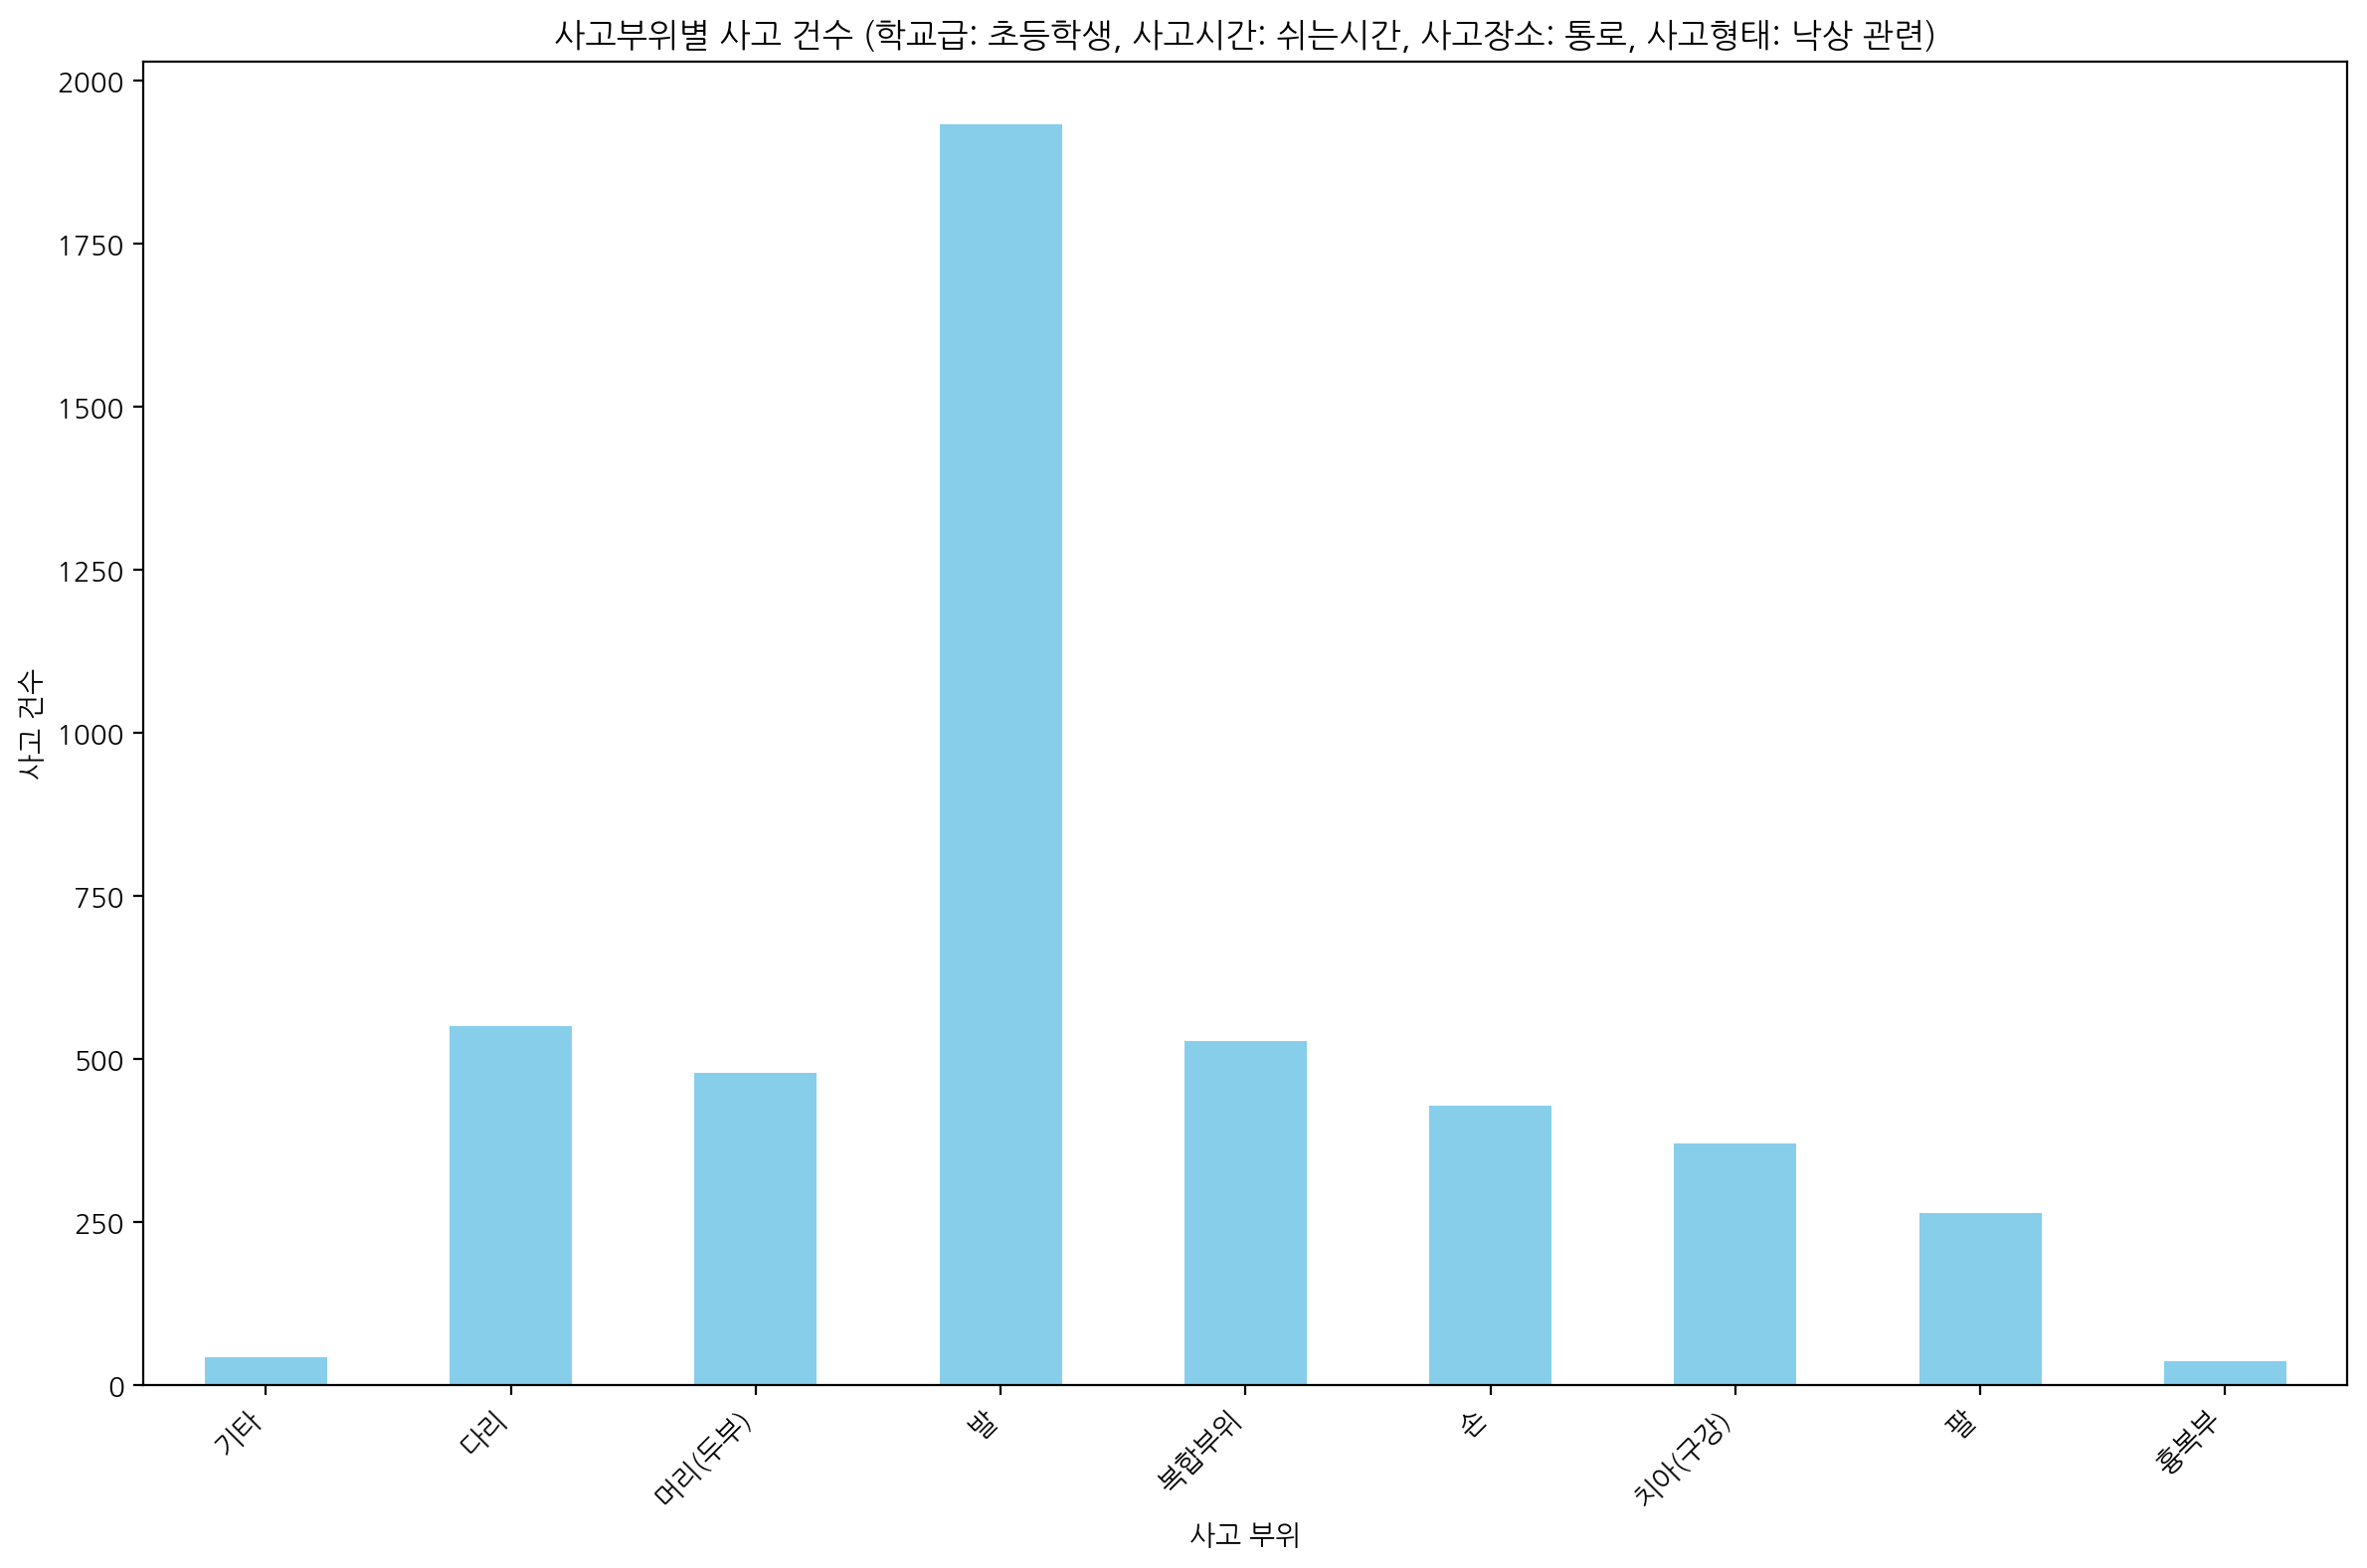

In [49]:
# Count the number of accidents by '사고부위'
injury_location_counts = filtered_data['사고부위'].value_counts().sort_index()

# Display the injury location counts
print(injury_location_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
injury_location_counts.plot(kind='bar', color='skyblue')
plt.title('사고부위별 사고 건수 (학교급: 초등학생, 사고시간: 쉬는시간, 사고장소: 통로, 사고형태: 낙상 관련)')
plt.xlabel('사고 부위')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고매개물
가구(책상/의자/책장/탁자/침대 등)                32
건물(문/창문/바닥/벽 등)                   2141
기계 도구류(기계선반, 재봉틀기계 등)                2
기타                                 695
날카로운 물건(칼/가위/송곳 등)                   4
열(불/뜨거운 물 등)                         1
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)       6
운송용구(차/자전거/선박/항공기 등)                 1
자연(사람/동물/식물 등)                     501
Name: count, dtype: int64


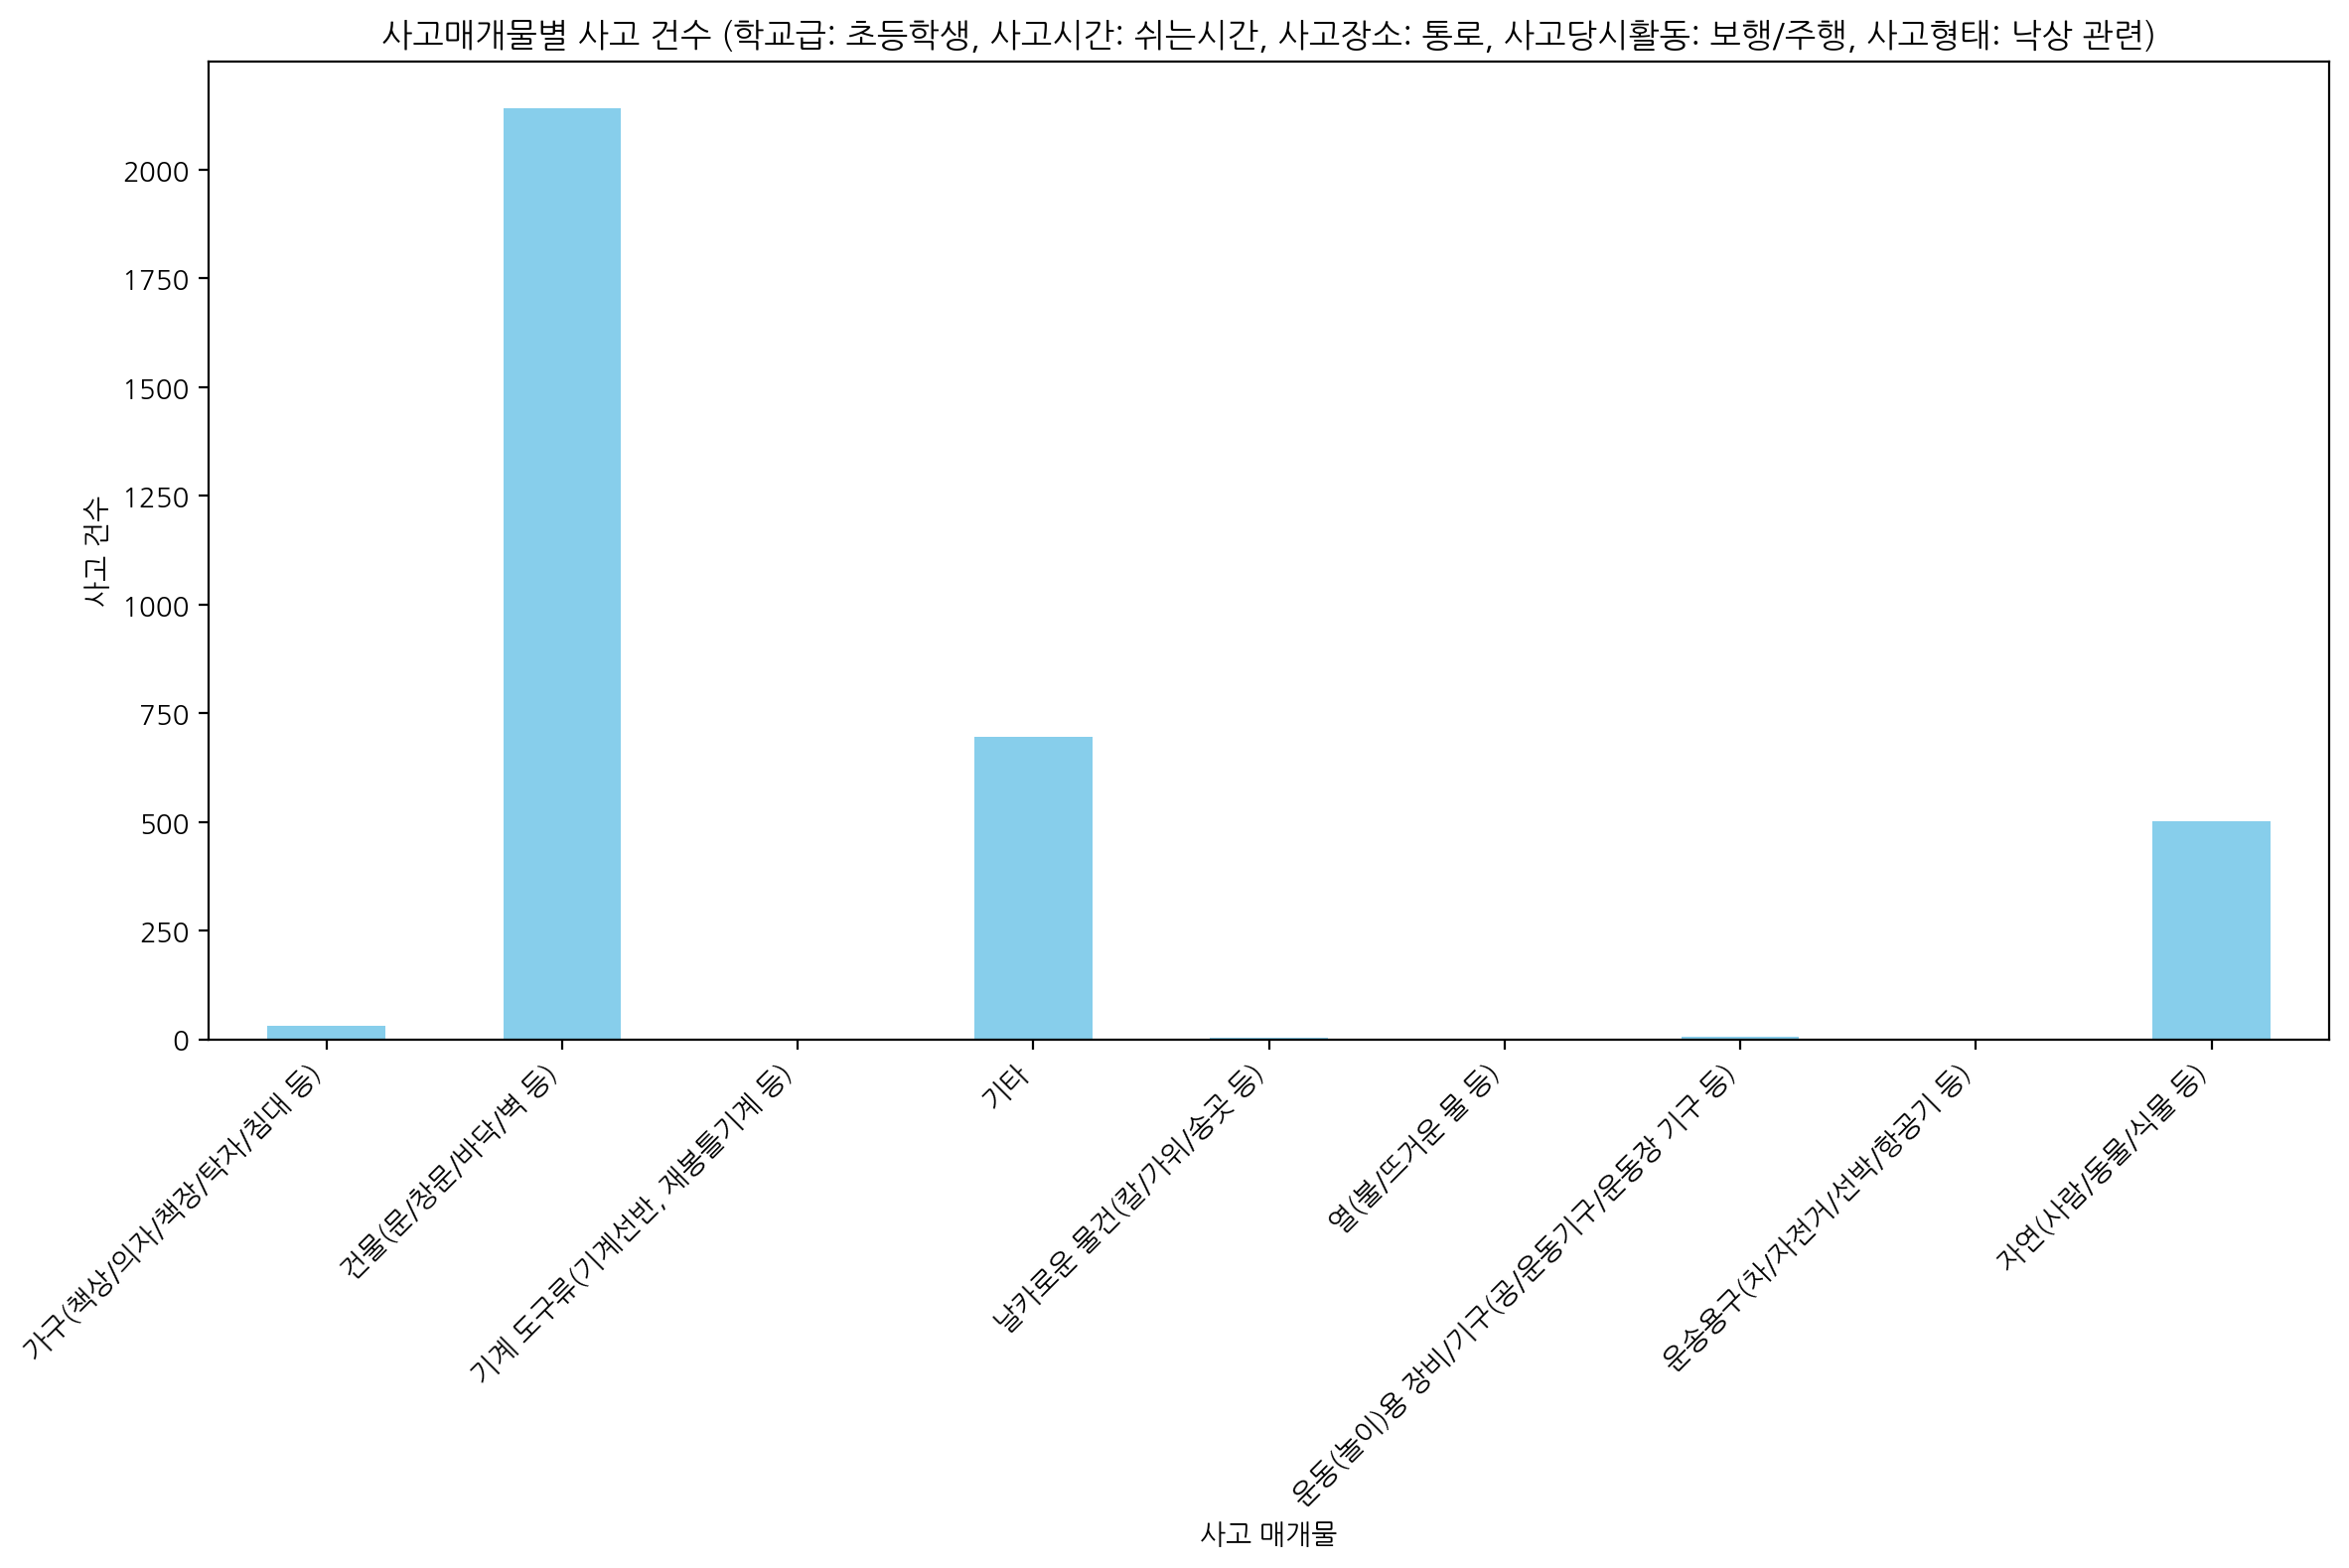

In [50]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Count the number of accidents by the identified 매개물 column
medium_counts = filtered_data[medium_column].value_counts().sort_index()

# Display the medium counts
print(medium_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
medium_counts.plot(kind='bar', color='skyblue')
plt.title('사고매개물별 사고 건수 (학교급: 초등학생, 사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('사고 매개물')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

사고부위                            기타   다리  머리(두부)    발  복합부위    손  치아(구강)    팔  \
사고매개물                                                                          
가구(책상/의자/책장/탁자/침대 등)             1    1      12    5     3    4       1    3   
건물(문/창문/바닥/벽 등)                 17  250     273  904   169  180     214  116   
기계 도구류(기계선반, 재봉틀기계 등)            0    0       0    1     0    1       0    0   
기타                               6   92      53  333    56   64      37   45   
날카로운 물건(칼/가위/송곳 등)               1    1       1    0     0    0       0    1   
열(불/뜨거운 물 등)                     0    0       0    1     0    0       0    0   
운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)   0    1       1    1     1    1       1    0   
운송용구(차/자전거/선박/항공기 등)             0    0       1    0     0    0       0    0   
자연(사람/동물/식물 등)                   7   61      51  185    67   52      42   34   

사고부위                            흉복부  
사고매개물                                
가구(책상/의자/책장/탁자/침대 등)              2  
건물(문/

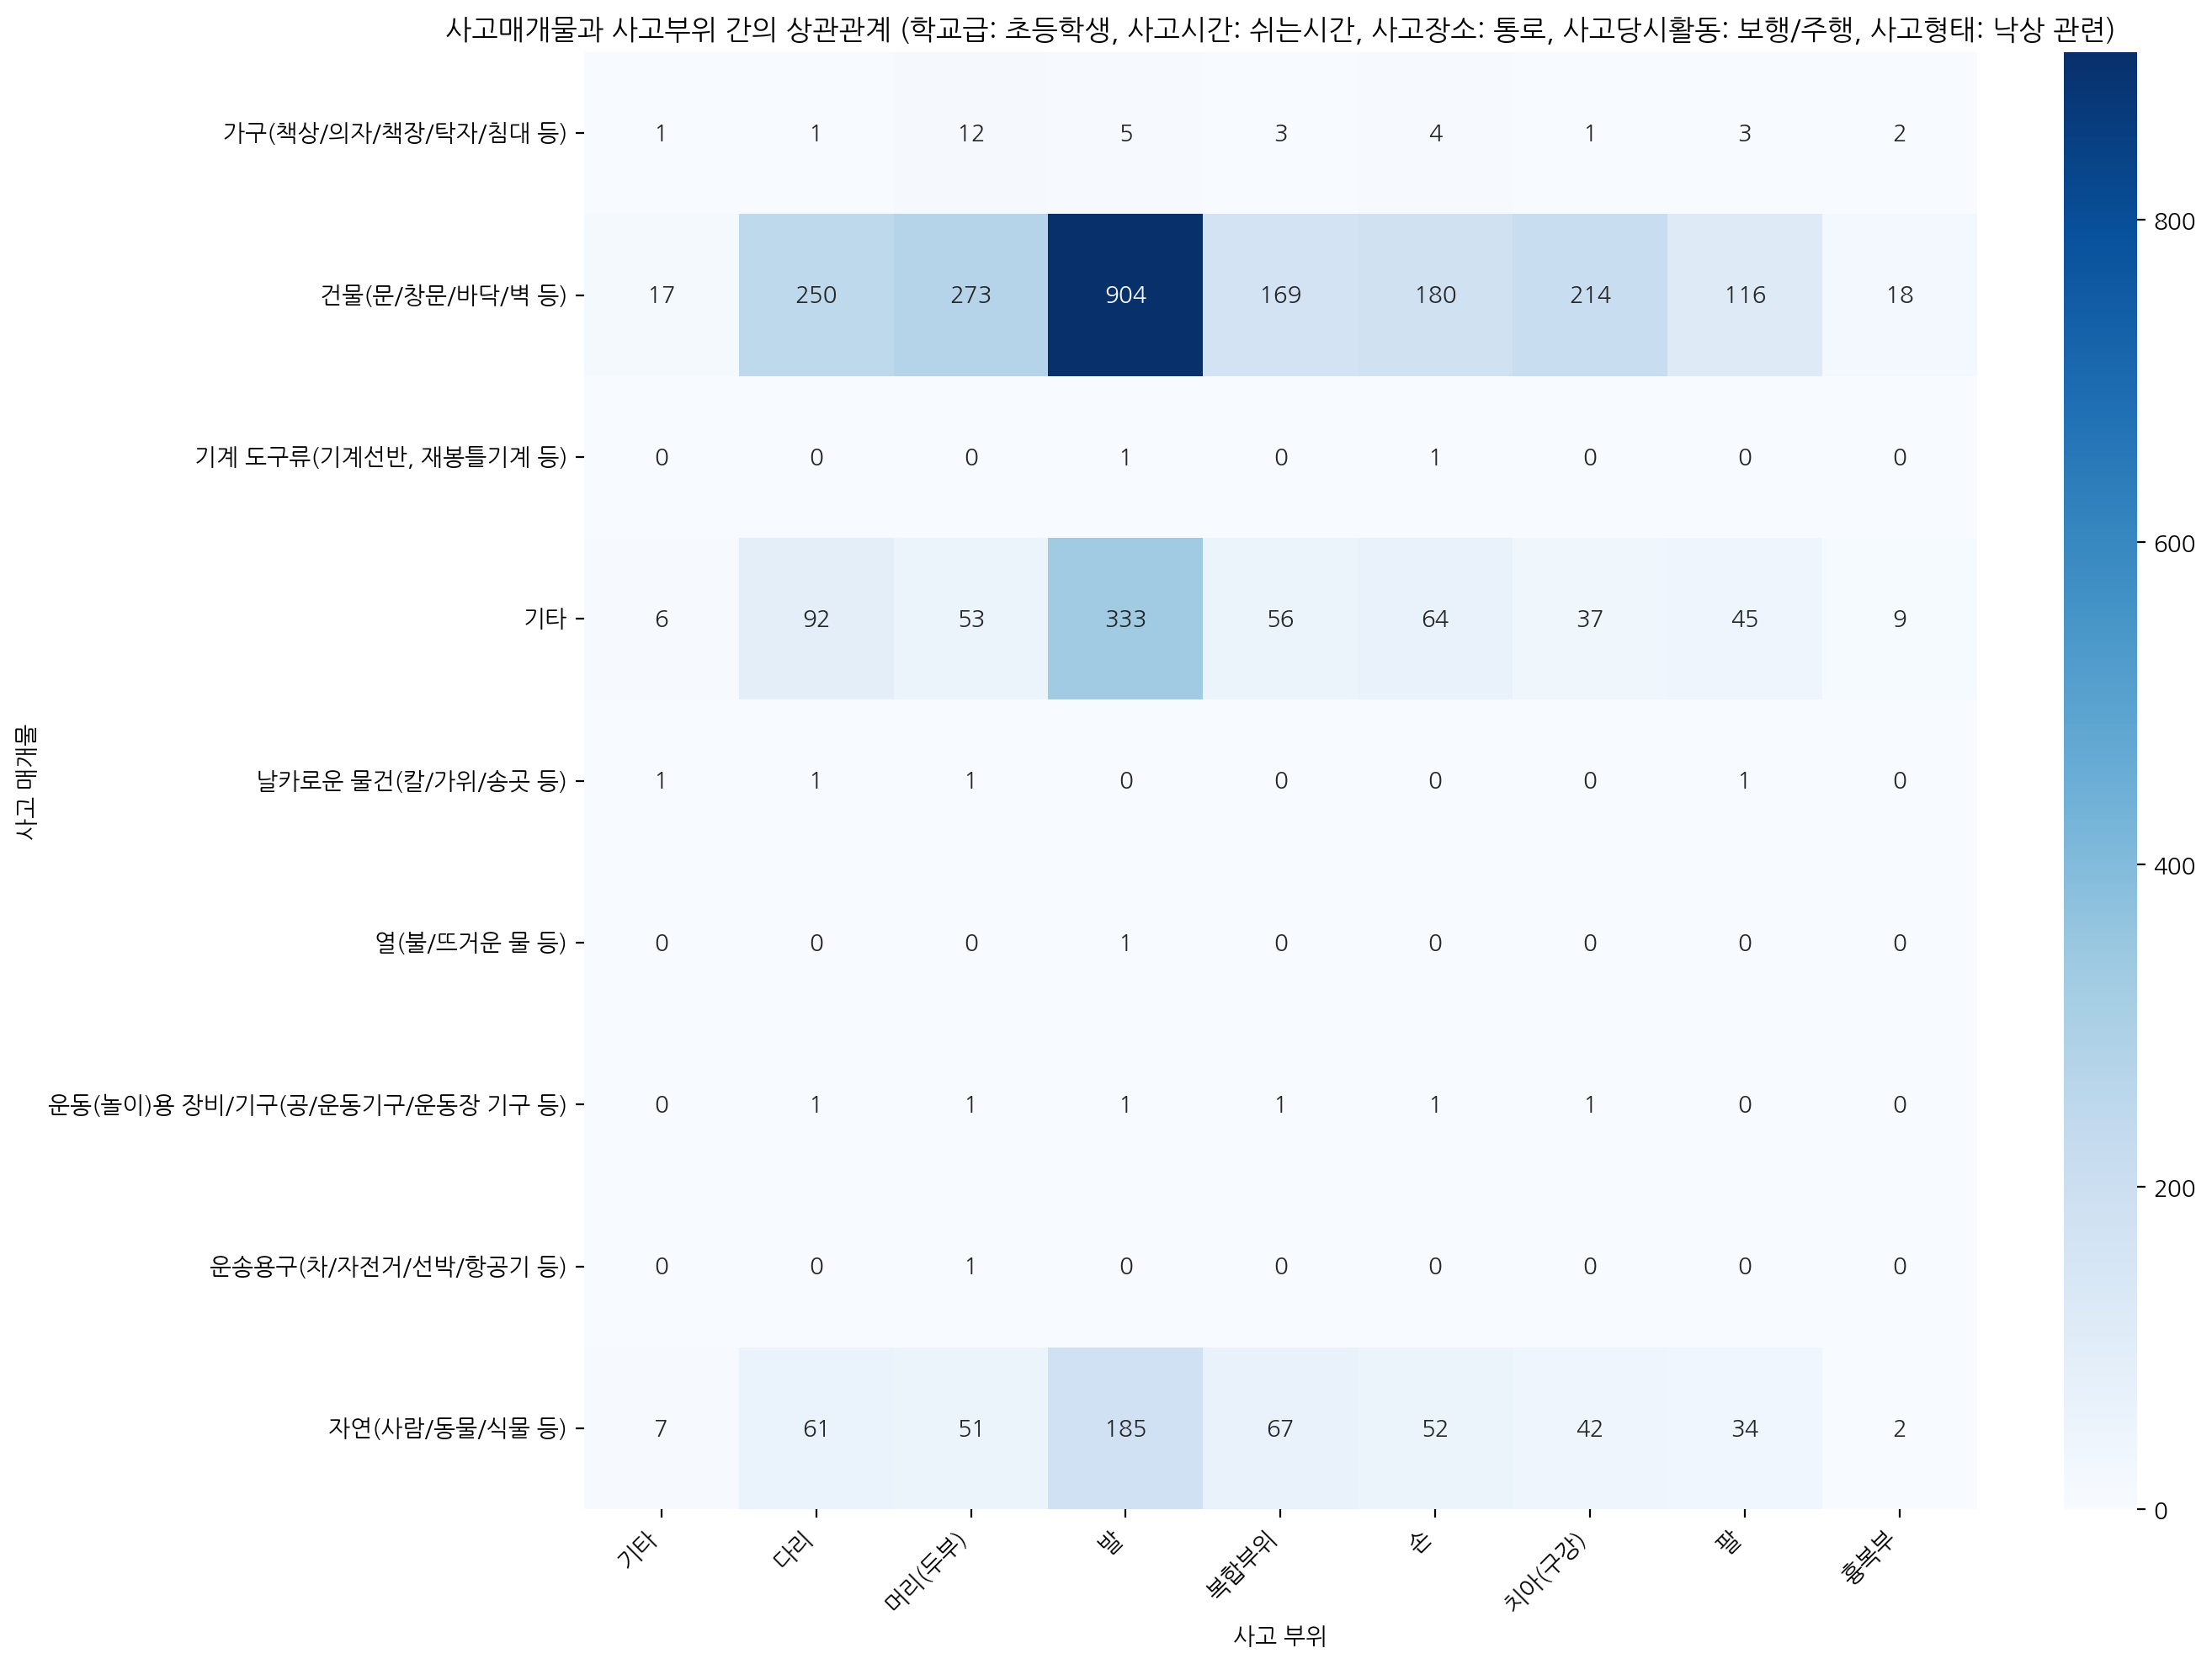

In [51]:
# Determine the correct column name for 매개물
if '사고매개물' in filtered_data.columns:
    medium_column = '사고매개물'
elif '매개물' in filtered_data.columns:
    medium_column = '매개물'
else:
    raise ValueError("The dataset does not contain '사고매개물' or '매개물' columns.")

# Create a contingency table
contingency_table = pd.crosstab(filtered_data[medium_column], filtered_data['사고부위'])

# Display the contingency table
print(contingency_table)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('사고매개물과 사고부위 간의 상관관계 (학교급: 초등학생, 사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('사고 부위')
plt.ylabel('사고 매개물')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

Year
2019    1269
2020     289
2021     625
2022    1200
2023    1248
Name: count, dtype: int64


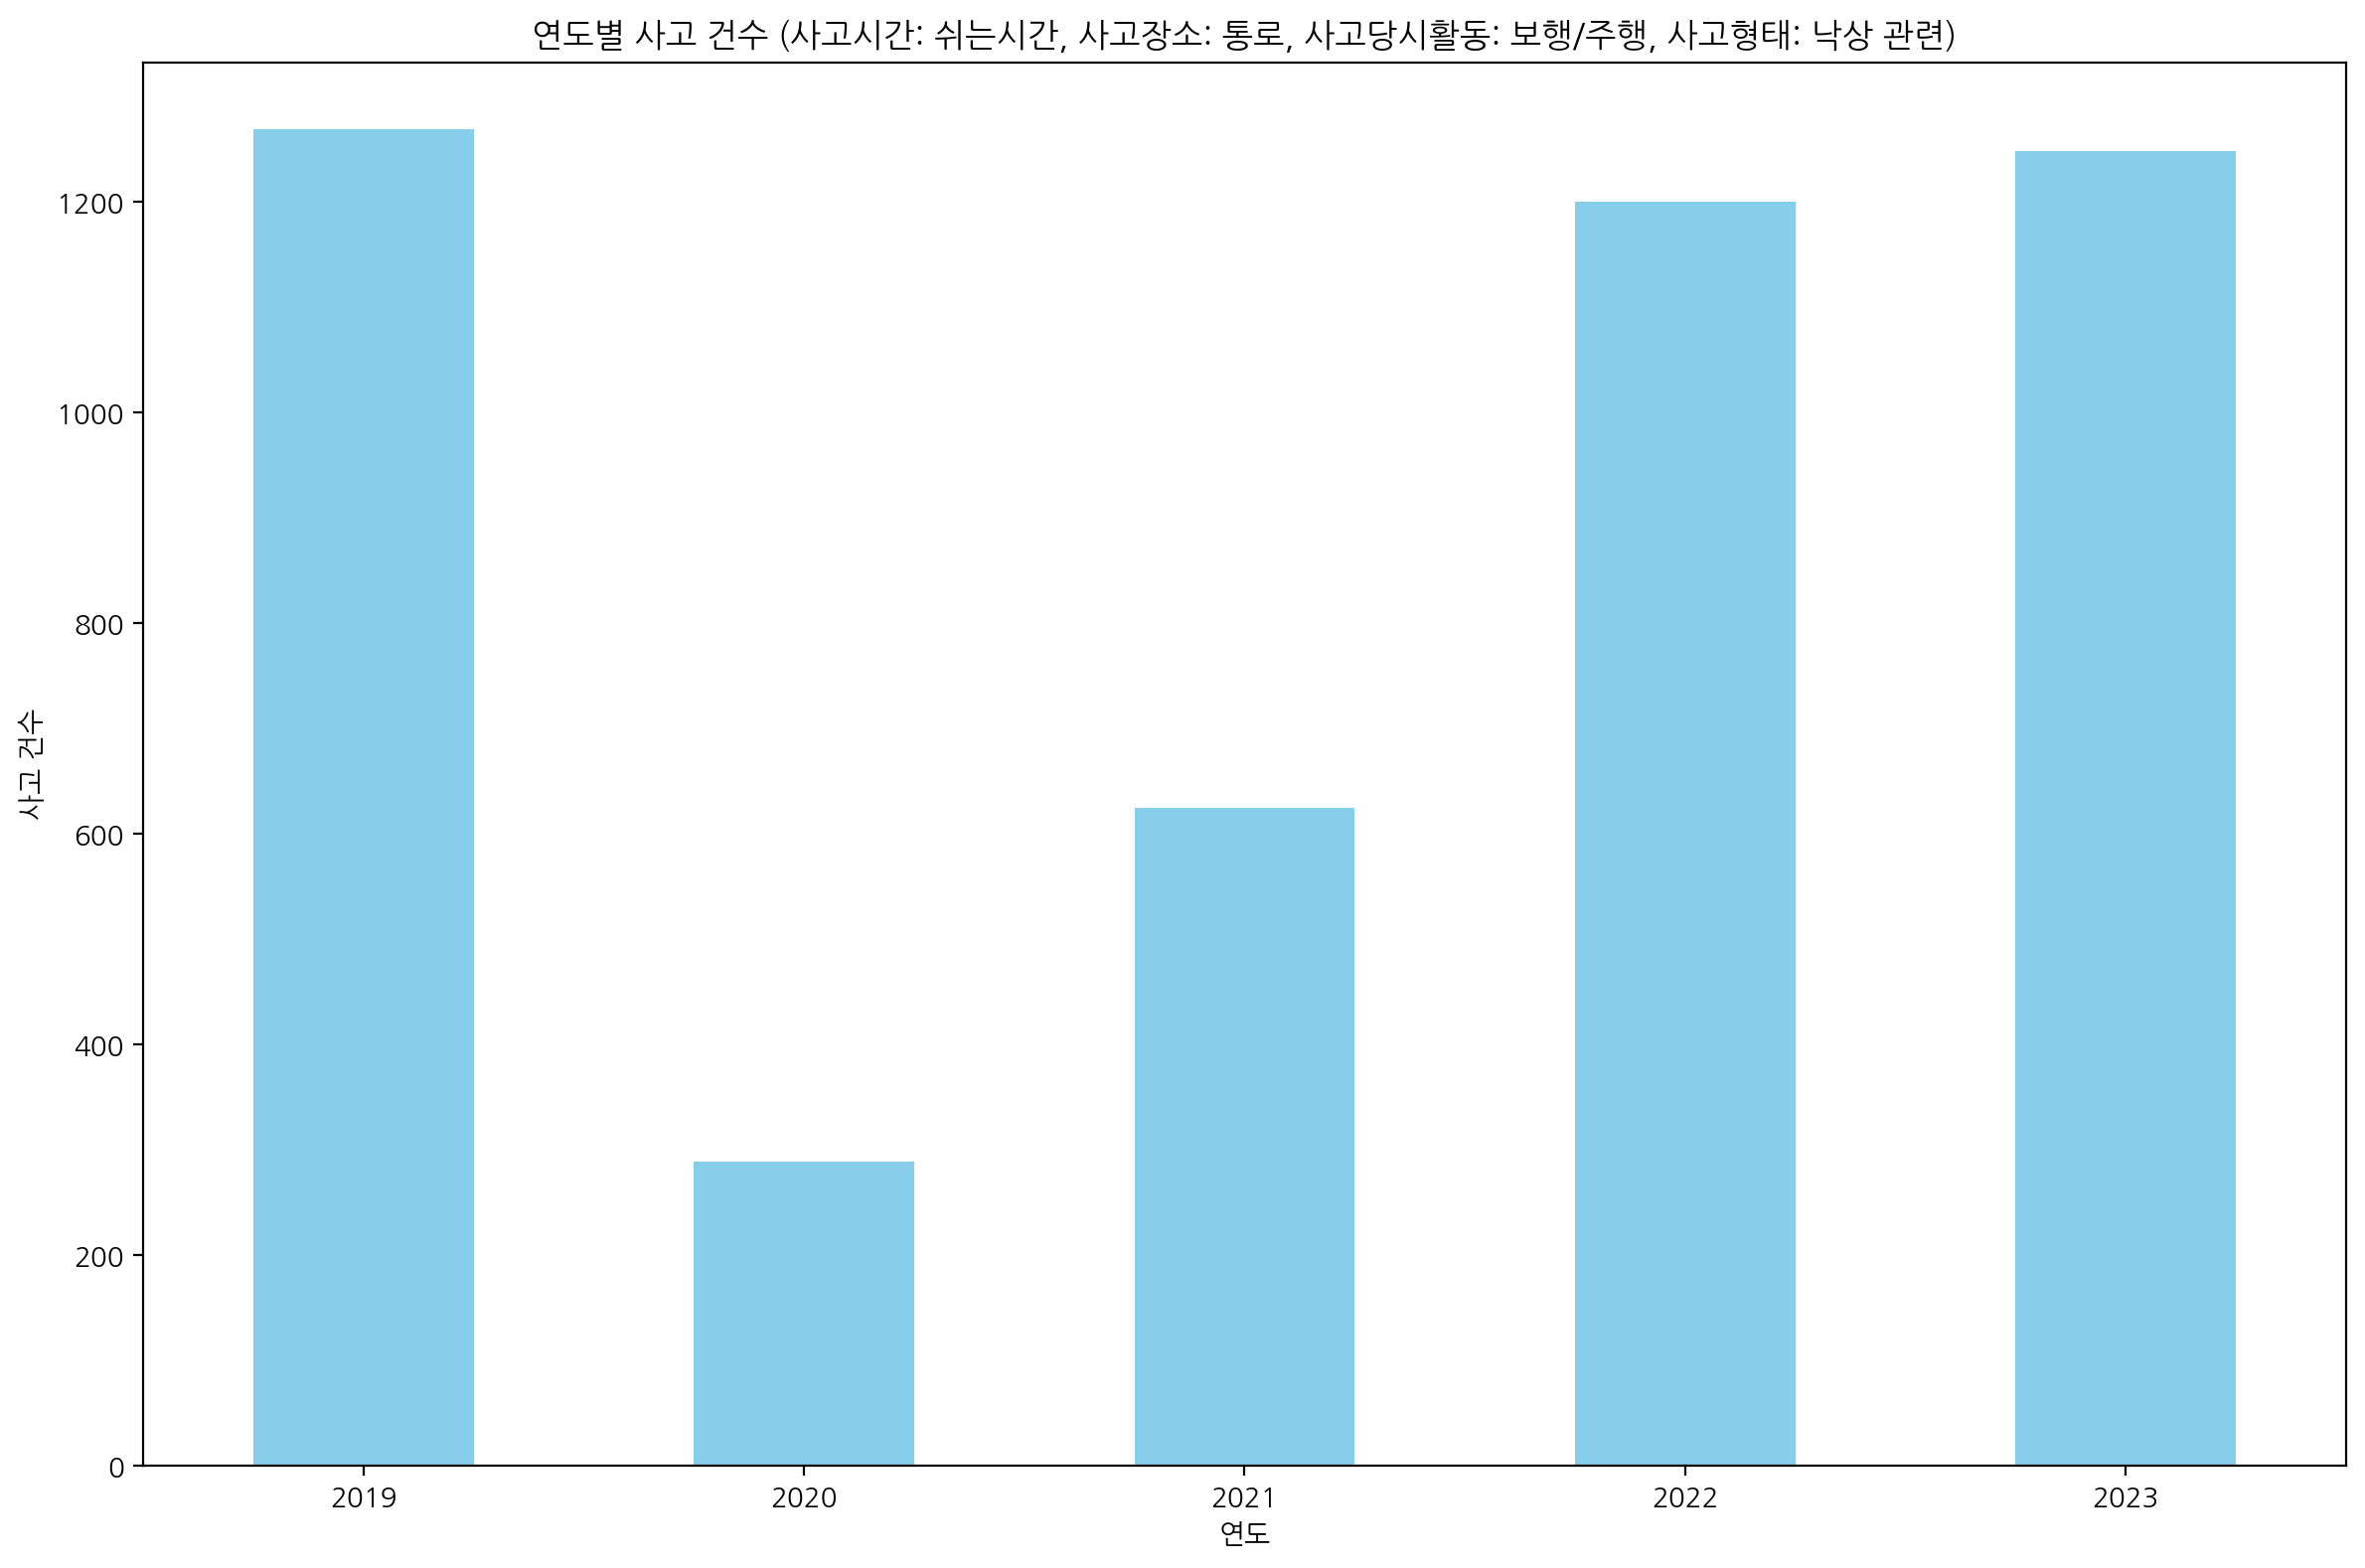

In [52]:
# Count the number of accidents by 'Year'
yearly_counts = filtered_data['Year'].value_counts().sort_index()

# Display the yearly counts
print(yearly_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('연도별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('연도')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [53]:
# Convert '사고발생일' to datetime
data_combined['사고발생일'] = pd.to_datetime(data_combined['사고발생일'], errors='coerce')

# Ensure '사고발생일' is in datetime format and extract month
filtered_data['사고발생일'] = pd.to_datetime(filtered_data['사고발생일'], errors='coerce')
filtered_data['사고발생월'] = filtered_data['사고발생일'].dt.month

# Display the filtered data with '사고발생월'
print(filtered_data[['사고발생월', '사고형태']].head())

     사고발생월     사고형태
1       12  낙상-미끄러짐
83      12  낙상-미끄러짐
124     12   낙상-떨어짐
135     12   낙상-떨어짐
339      1  낙상-미끄러짐


<ipython-input-53-6f2ba5865644>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['사고발생일'] = pd.to_datetime(filtered_data['사고발생일'], errors='coerce')
<ipython-input-53-6f2ba5865644>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['사고발생월'] = filtered_data['사고발생일'].dt.month


사고발생월
1      71
2      61
3     329
4     475
5     507
6     471
7     357
8     107
9     453
10    521
11    724
12    555
Name: count, dtype: int64


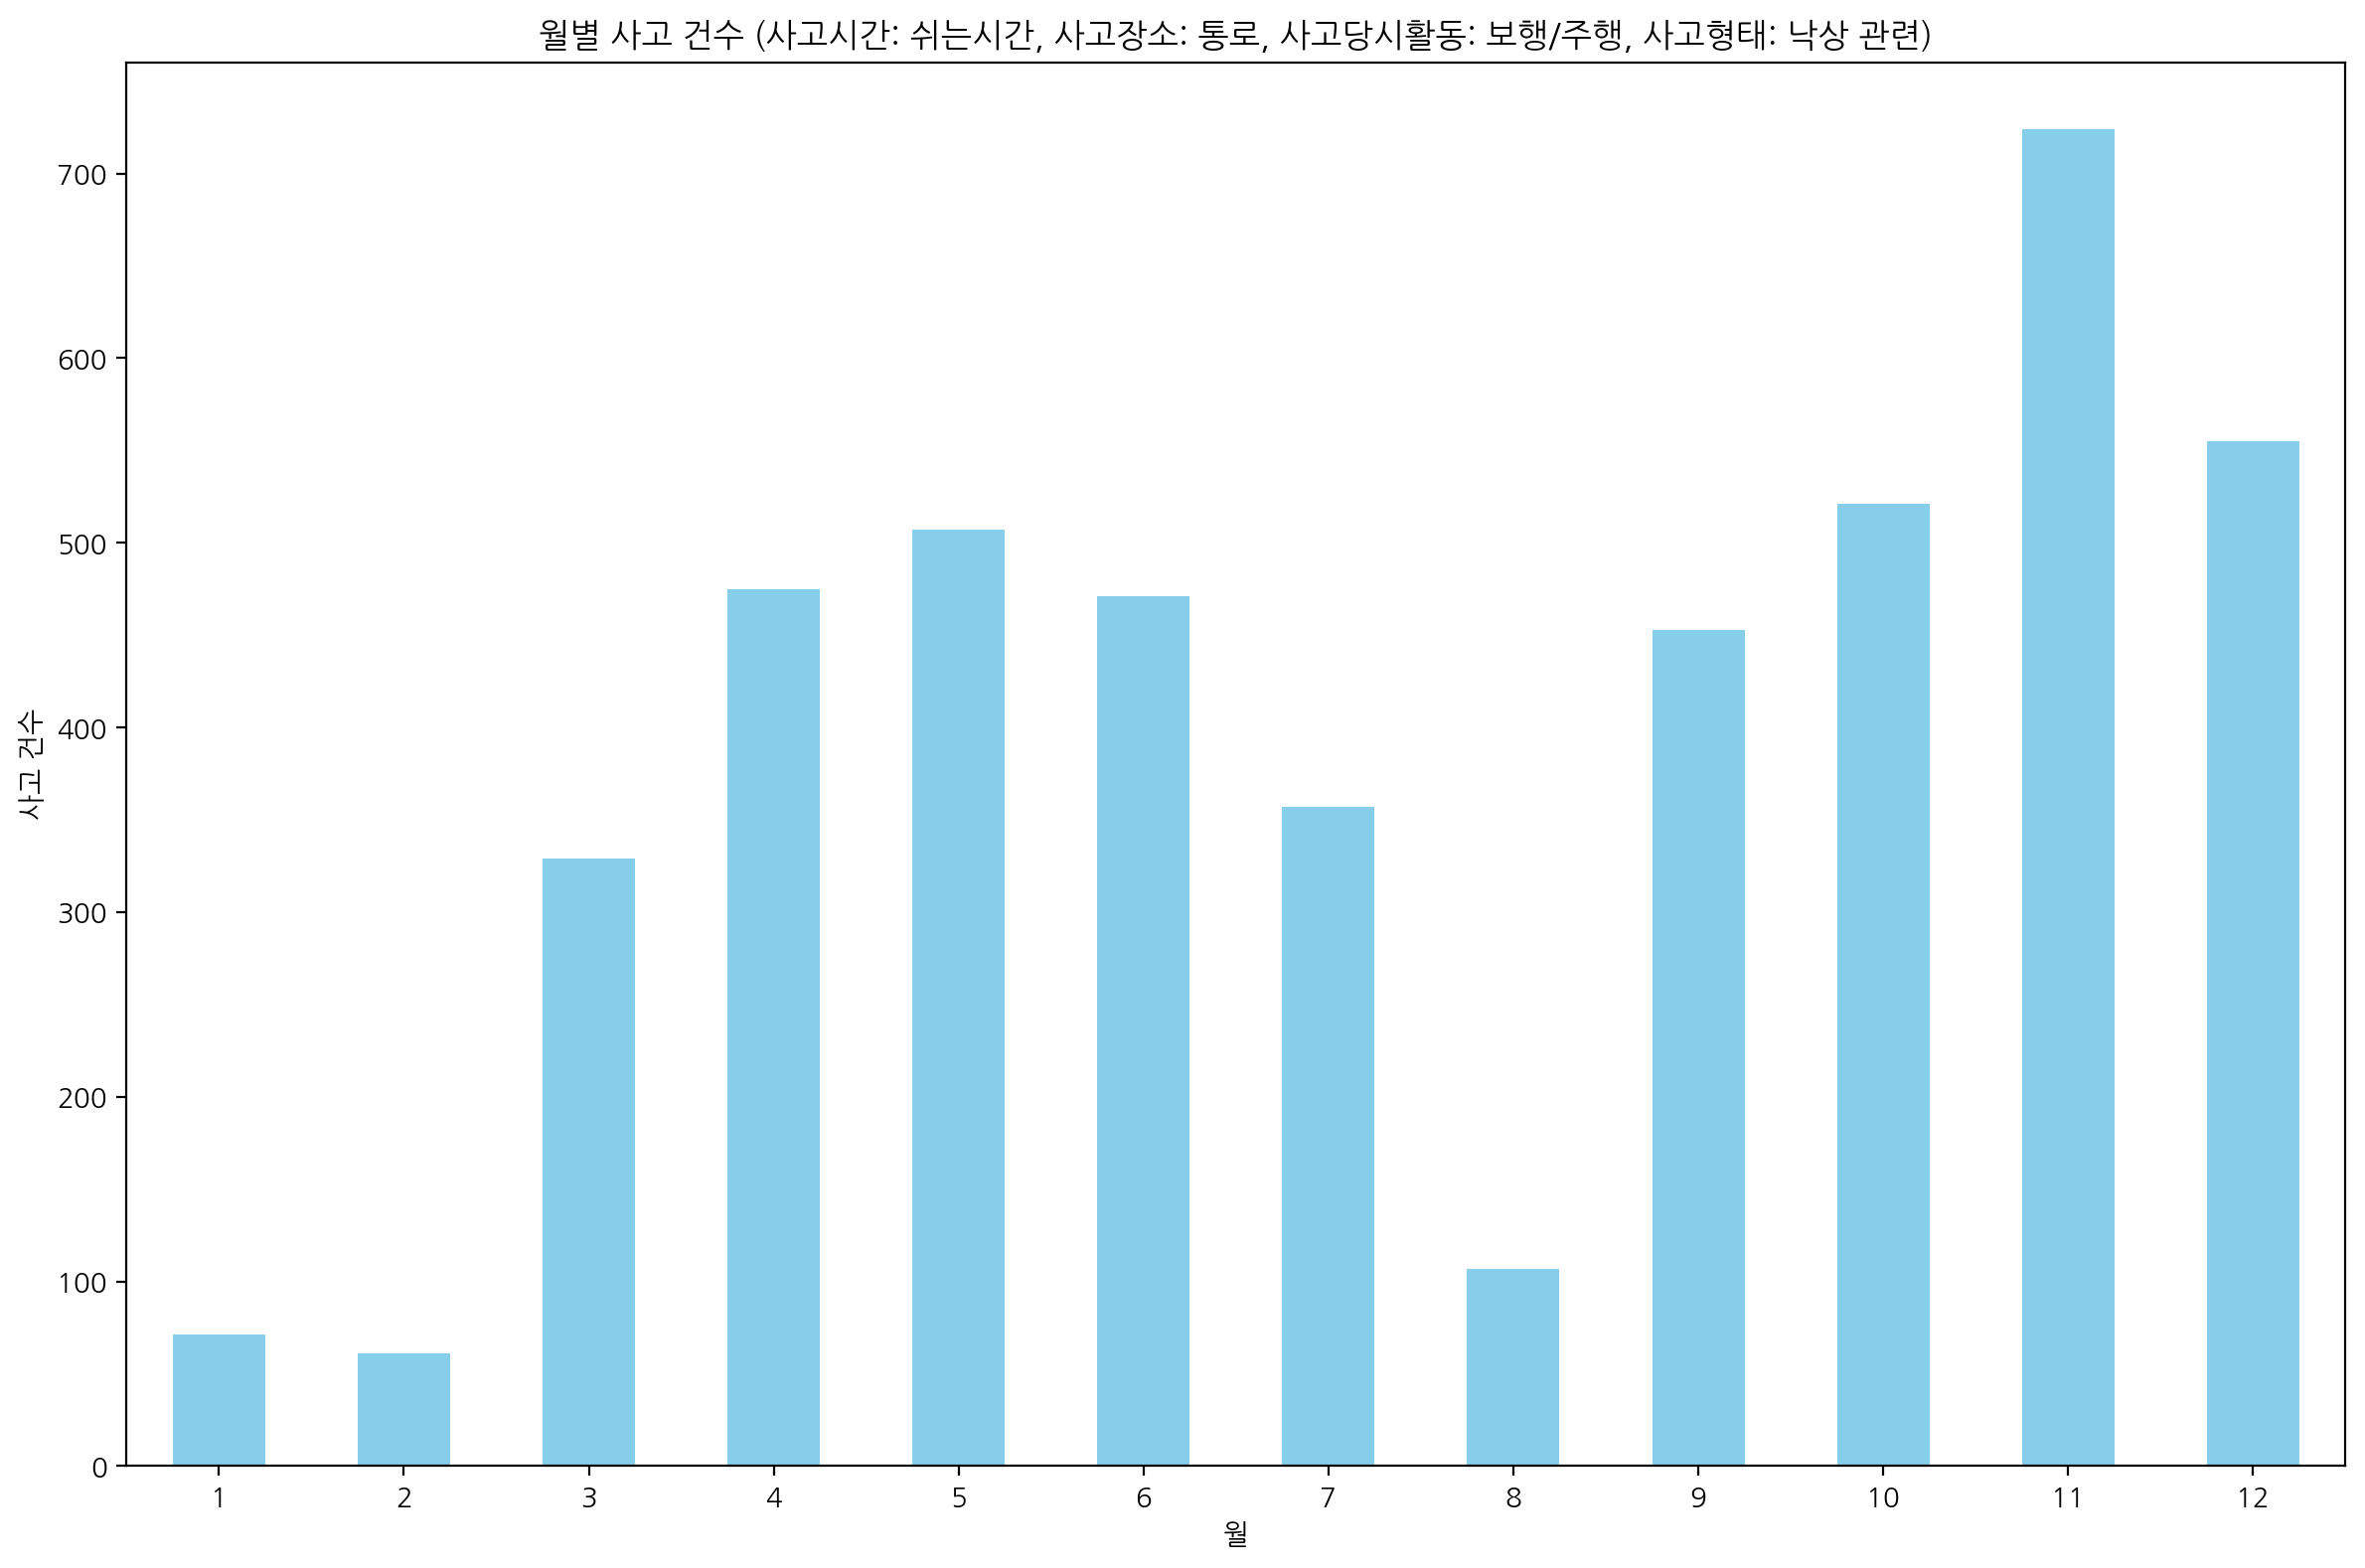

In [54]:
# Count the number of accidents by '사고발생월'
monthly_counts = filtered_data['사고발생월'].value_counts().sort_index()

# Display the monthly counts
print(monthly_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('월별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('월')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [55]:
# Ensure '사고발생일' is in datetime format and extract day of the week
filtered_data['사고발생일'] = pd.to_datetime(filtered_data['사고발생일'], errors='coerce')
filtered_data['사고발생요일'] = filtered_data['사고발생일'].dt.dayofweek

# Map the day of the week to actual names
day_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
filtered_data['사고발생요일'] = filtered_data['사고발생요일'].map(day_mapping)

# Display the filtered data with '사고발생요일'
print(filtered_data[['사고발생요일', '사고형태']].head())

    사고발생요일     사고형태
1      목요일  낙상-미끄러짐
83     목요일  낙상-미끄러짐
124    월요일   낙상-떨어짐
135    화요일   낙상-떨어짐
339    수요일  낙상-미끄러짐


<ipython-input-55-350d08dca97e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['사고발생일'] = pd.to_datetime(filtered_data['사고발생일'], errors='coerce')
<ipython-input-55-350d08dca97e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['사고발생요일'] = filtered_data['사고발생일'].dt.dayofweek
<ipython-input-55-350d08dca97e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

사고발생요일
월요일    966.0
화요일    981.0
수요일    861.0
목요일    967.0
금요일    853.0
토요일      3.0
일요일      NaN
Name: count, dtype: float64


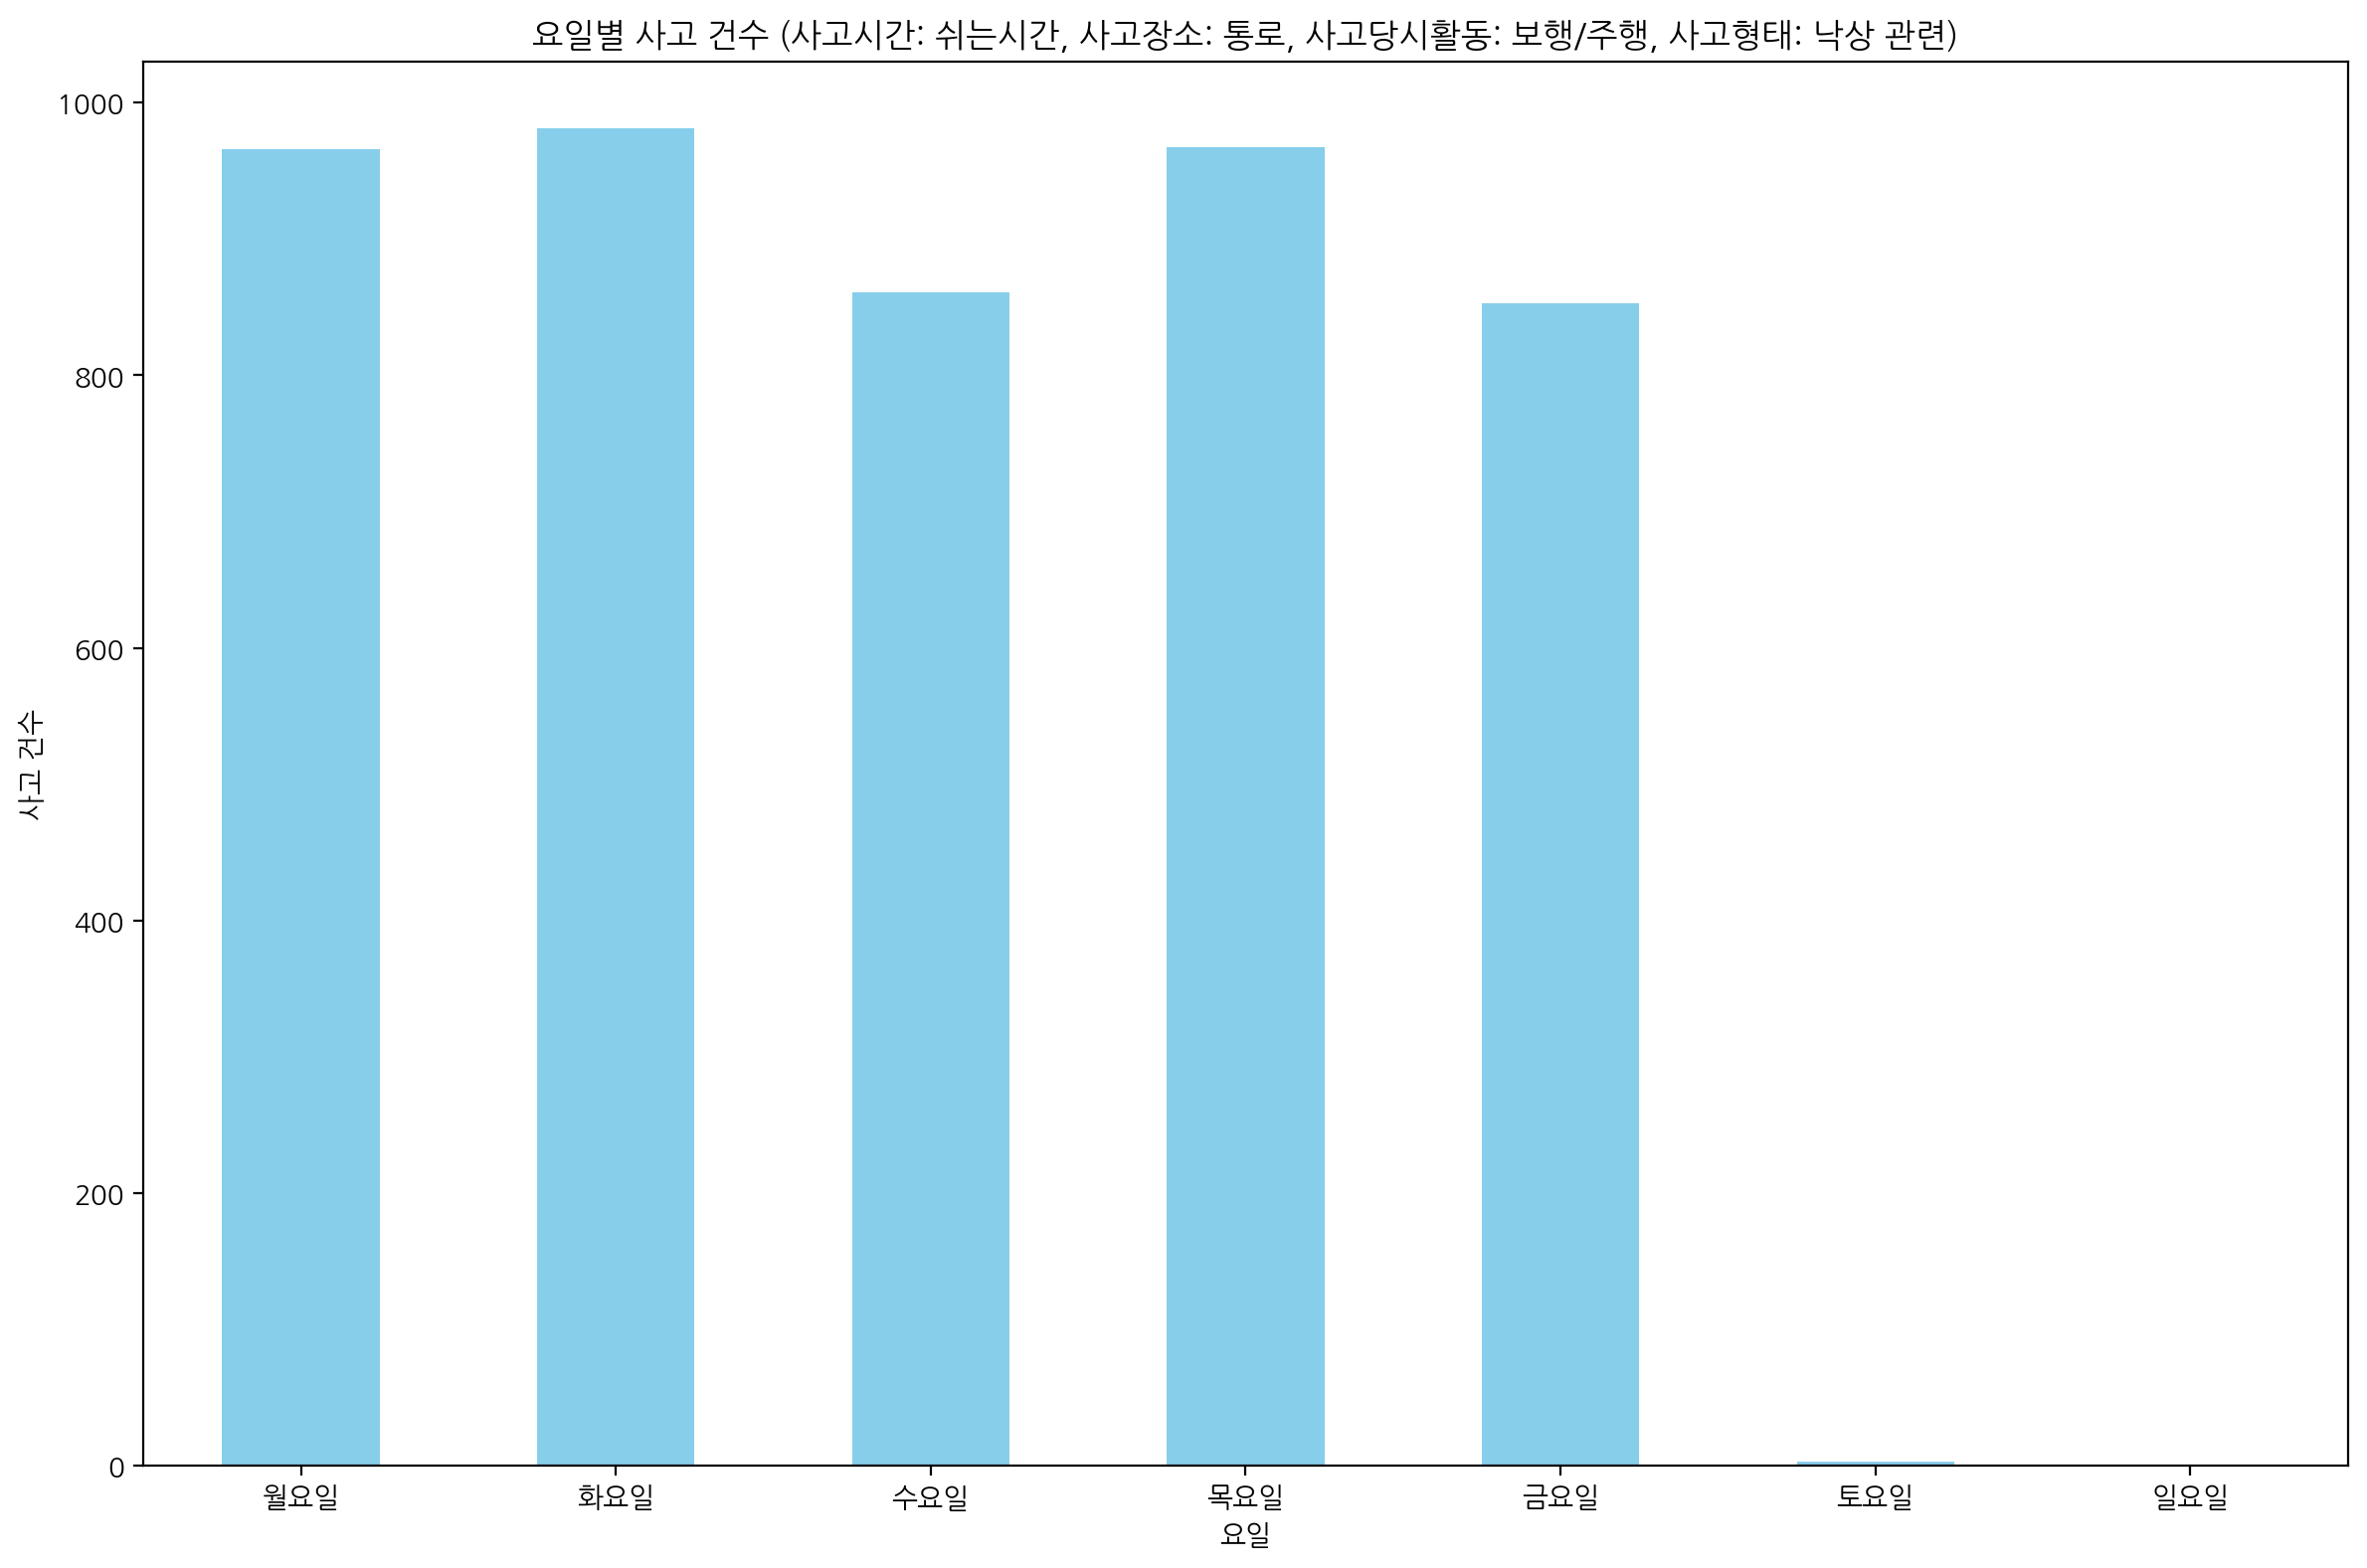

In [56]:
# Count the number of accidents by '사고발생요일'
weekday_counts = filtered_data['사고발생요일'].value_counts().reindex(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

# Display the weekday counts
print(weekday_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('요일별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('요일')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [57]:
# Combine all years into a single DataFrame
data_combined = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Filter data based on '사고시간', '사고장소', '사고당시활동', and '사고형태'
filtered_data = data_combined[
    (data_combined['사고시간'].str.contains('쉬는시간|휴식시간', na=False)) &
    (data_combined['사고장소'] == '통로') &
    (data_combined['사고당시활동'] == '보행/주행') &
    (data_combined['사고형태'].str.contains('낙상|낙상-넘어짐|낙상-떨어짐|낙상-미끄러짐', na=False))
]

# Ensure '사고발생시각' is in datetime format
filtered_data['사고발생시각'] = pd.to_datetime(filtered_data['사고발생시각'], errors='coerce')

# Check for null values in '사고발생시각'
print(f"Null values in '사고발생시각': {filtered_data['사고발생시각'].isnull().sum()}")

# Drop rows where '사고발생시각' is null
filtered_data = filtered_data.dropna(subset=['사고발생시각'])

# Extract hour from '사고발생시각'
filtered_data['사고발생_시간'] = filtered_data['사고발생시각'].dt.hour

# Display the filtered data with '사고발생_시간'
print(filtered_data[['사고발생_시간', '사고형태']].head())

Null values in '사고발생시각': 72
     사고발생_시간     사고형태
1         11  낙상-미끄러짐
57        11  낙상-미끄러짐
83        11  낙상-미끄러짐
124       11   낙상-떨어짐
128        9  낙상-미끄러짐


<ipython-input-57-bac1f41d0d19>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data['사고발생시각'] = pd.to_datetime(filtered_data['사고발생시각'], errors='coerce')
<ipython-input-57-bac1f41d0d19>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['사고발생시각'] = pd.to_datetime(filtered_data['사고발생시각'], errors='coerce')


사고발생_시간
0       11
1        4
3        1
4        1
7       14
8      487
9     1482
10    2916
11    2380
12    1005
13    1012
14    1332
15     951
16     403
17      41
18      16
19       9
20      11
21       8
23       1
Name: count, dtype: int64


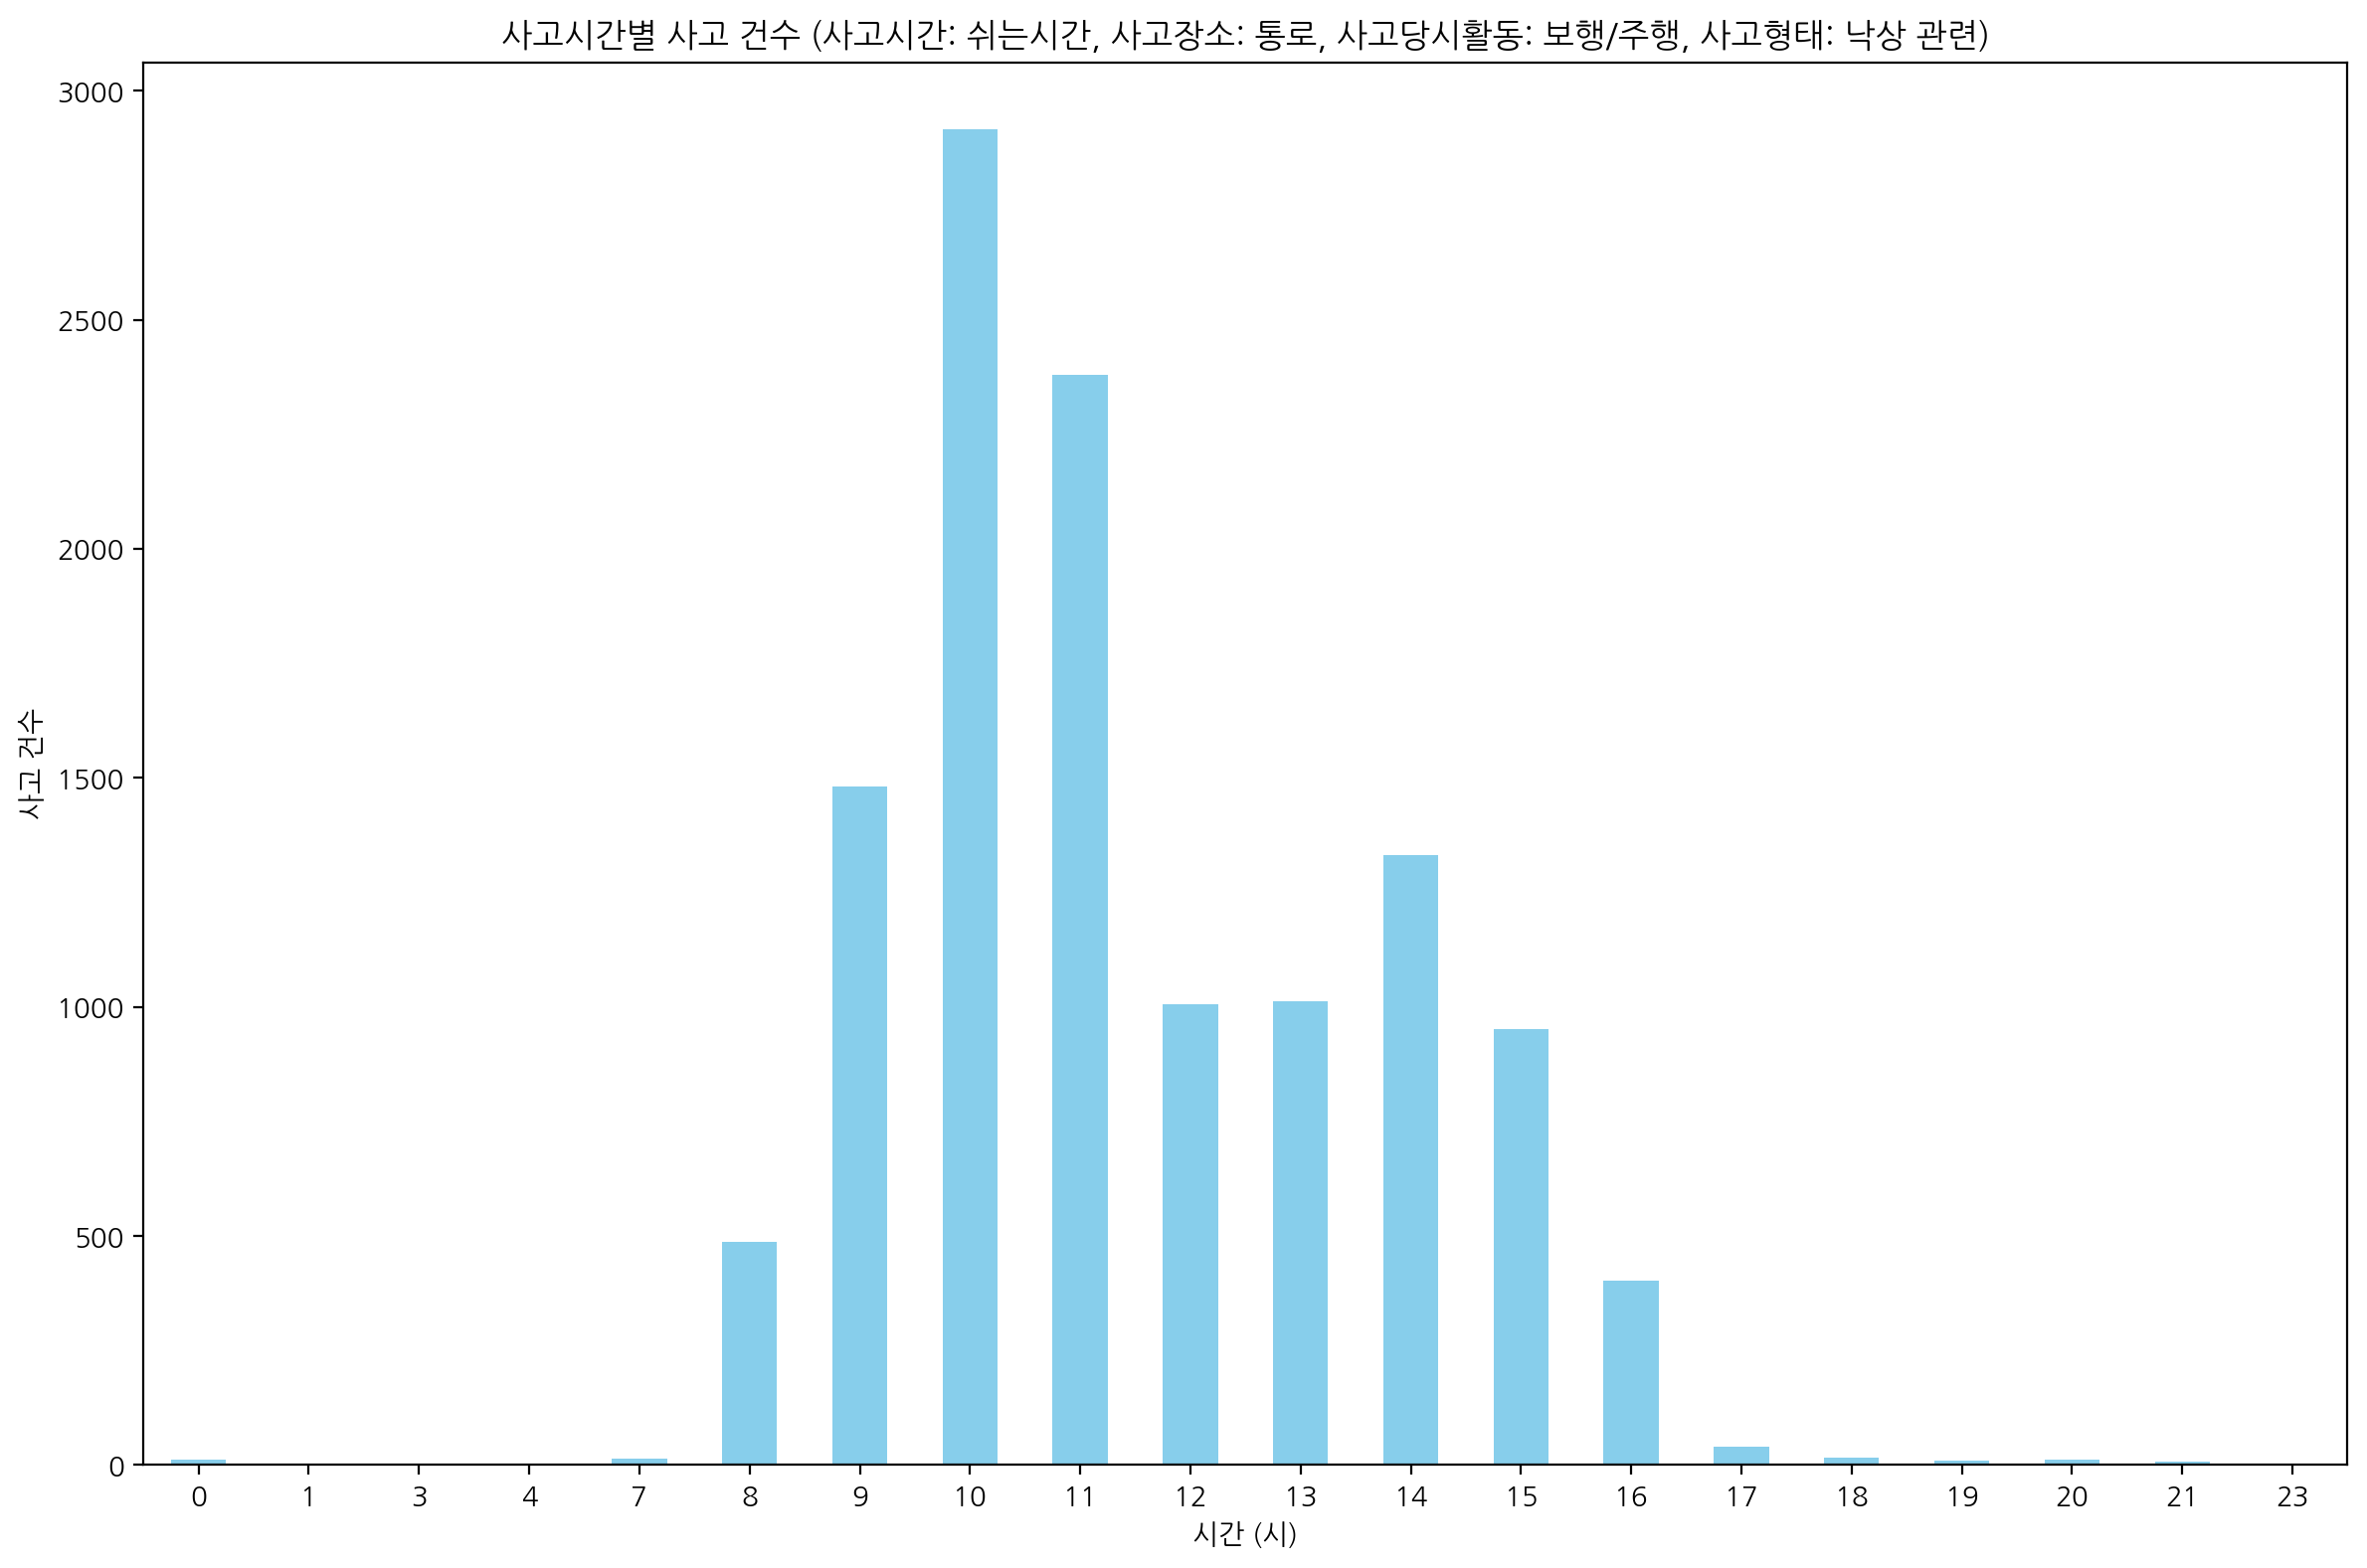

In [58]:
# Count the number of accidents by '사고발생_시간'
hourly_counts = filtered_data['사고발생_시간'].value_counts().sort_index()

# Display the hourly counts
print(hourly_counts)

# Plot the bar graph
plt.figure(figsize=(12, 8))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('사고시간별 사고 건수 (사고시간: 쉬는시간, 사고장소: 통로, 사고당시활동: 보행/주행, 사고형태: 낙상 관련)')
plt.xlabel('시간 (시)')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()